In [1]:
!pip install --upgrade upsetplot

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for upsetplot: filename=UpSetPlot-0.8.0-py3-none-any.whl size=23533 sha256=f8c8ff24cac00c0bdf9a902eb0882653470ab11bcd026575a83df00e2d61445b
  Stored in directory: /home/carlo.dedonno/.cache/pip/wheels/ab/1c/20/a07c46f87040c01039dfaf8728b281ae4053c1d3d89d61930c
Successfully built upsetplot
You should consider upgrading via the '/app/python3/bin/python3.8 -m pip install --upgrade pip' command.


In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib as mpl
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd

In [2]:
plt.rcParams['axes.labelsize'] = 5
plt.rcParams['xtick.labelsize'] = 5
plt.rcParams['ytick.labelsize'] = 5
plt.rcParams['legend.fontsize'] = 5
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['figure.dpi'] = 600
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']
plt.rcParams['axes.facecolor'] = (1,1,1,0)

In [3]:
adata = sc.read('./../../data/processed/adata_reannotated_final.h5ad')

In [4]:
import pickle
with open('./../../results/DE/de_stress_new/pickle/new_function.pickle', 'rb') as f:
    de_post_df = pickle.load(f)
    
de_genes = pd.read_pickle('./../../results/DE/de_stress_new/pickle/genes.pickle')
de_genes_sign = de_genes[de_genes['qval']<0.05]
de_genes_sign_mean = de_genes_sign[(de_genes_sign['mean_pert']>0.1) | (de_genes_sign['mean_ctrl']>0.1)]
de_genes_sign_mean = de_genes_sign_mean[np.abs(de_genes_sign_mean['log2fc'])>0.1]

<ipython-input-5-ab0e44e563cc>:29: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_list.append(upset_data_sub.loc[idx])
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


CA1 Glut 2
CA3 Glut 2
DG Glut 2
Oligodendrocytes
Astro 1
Endothelial


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


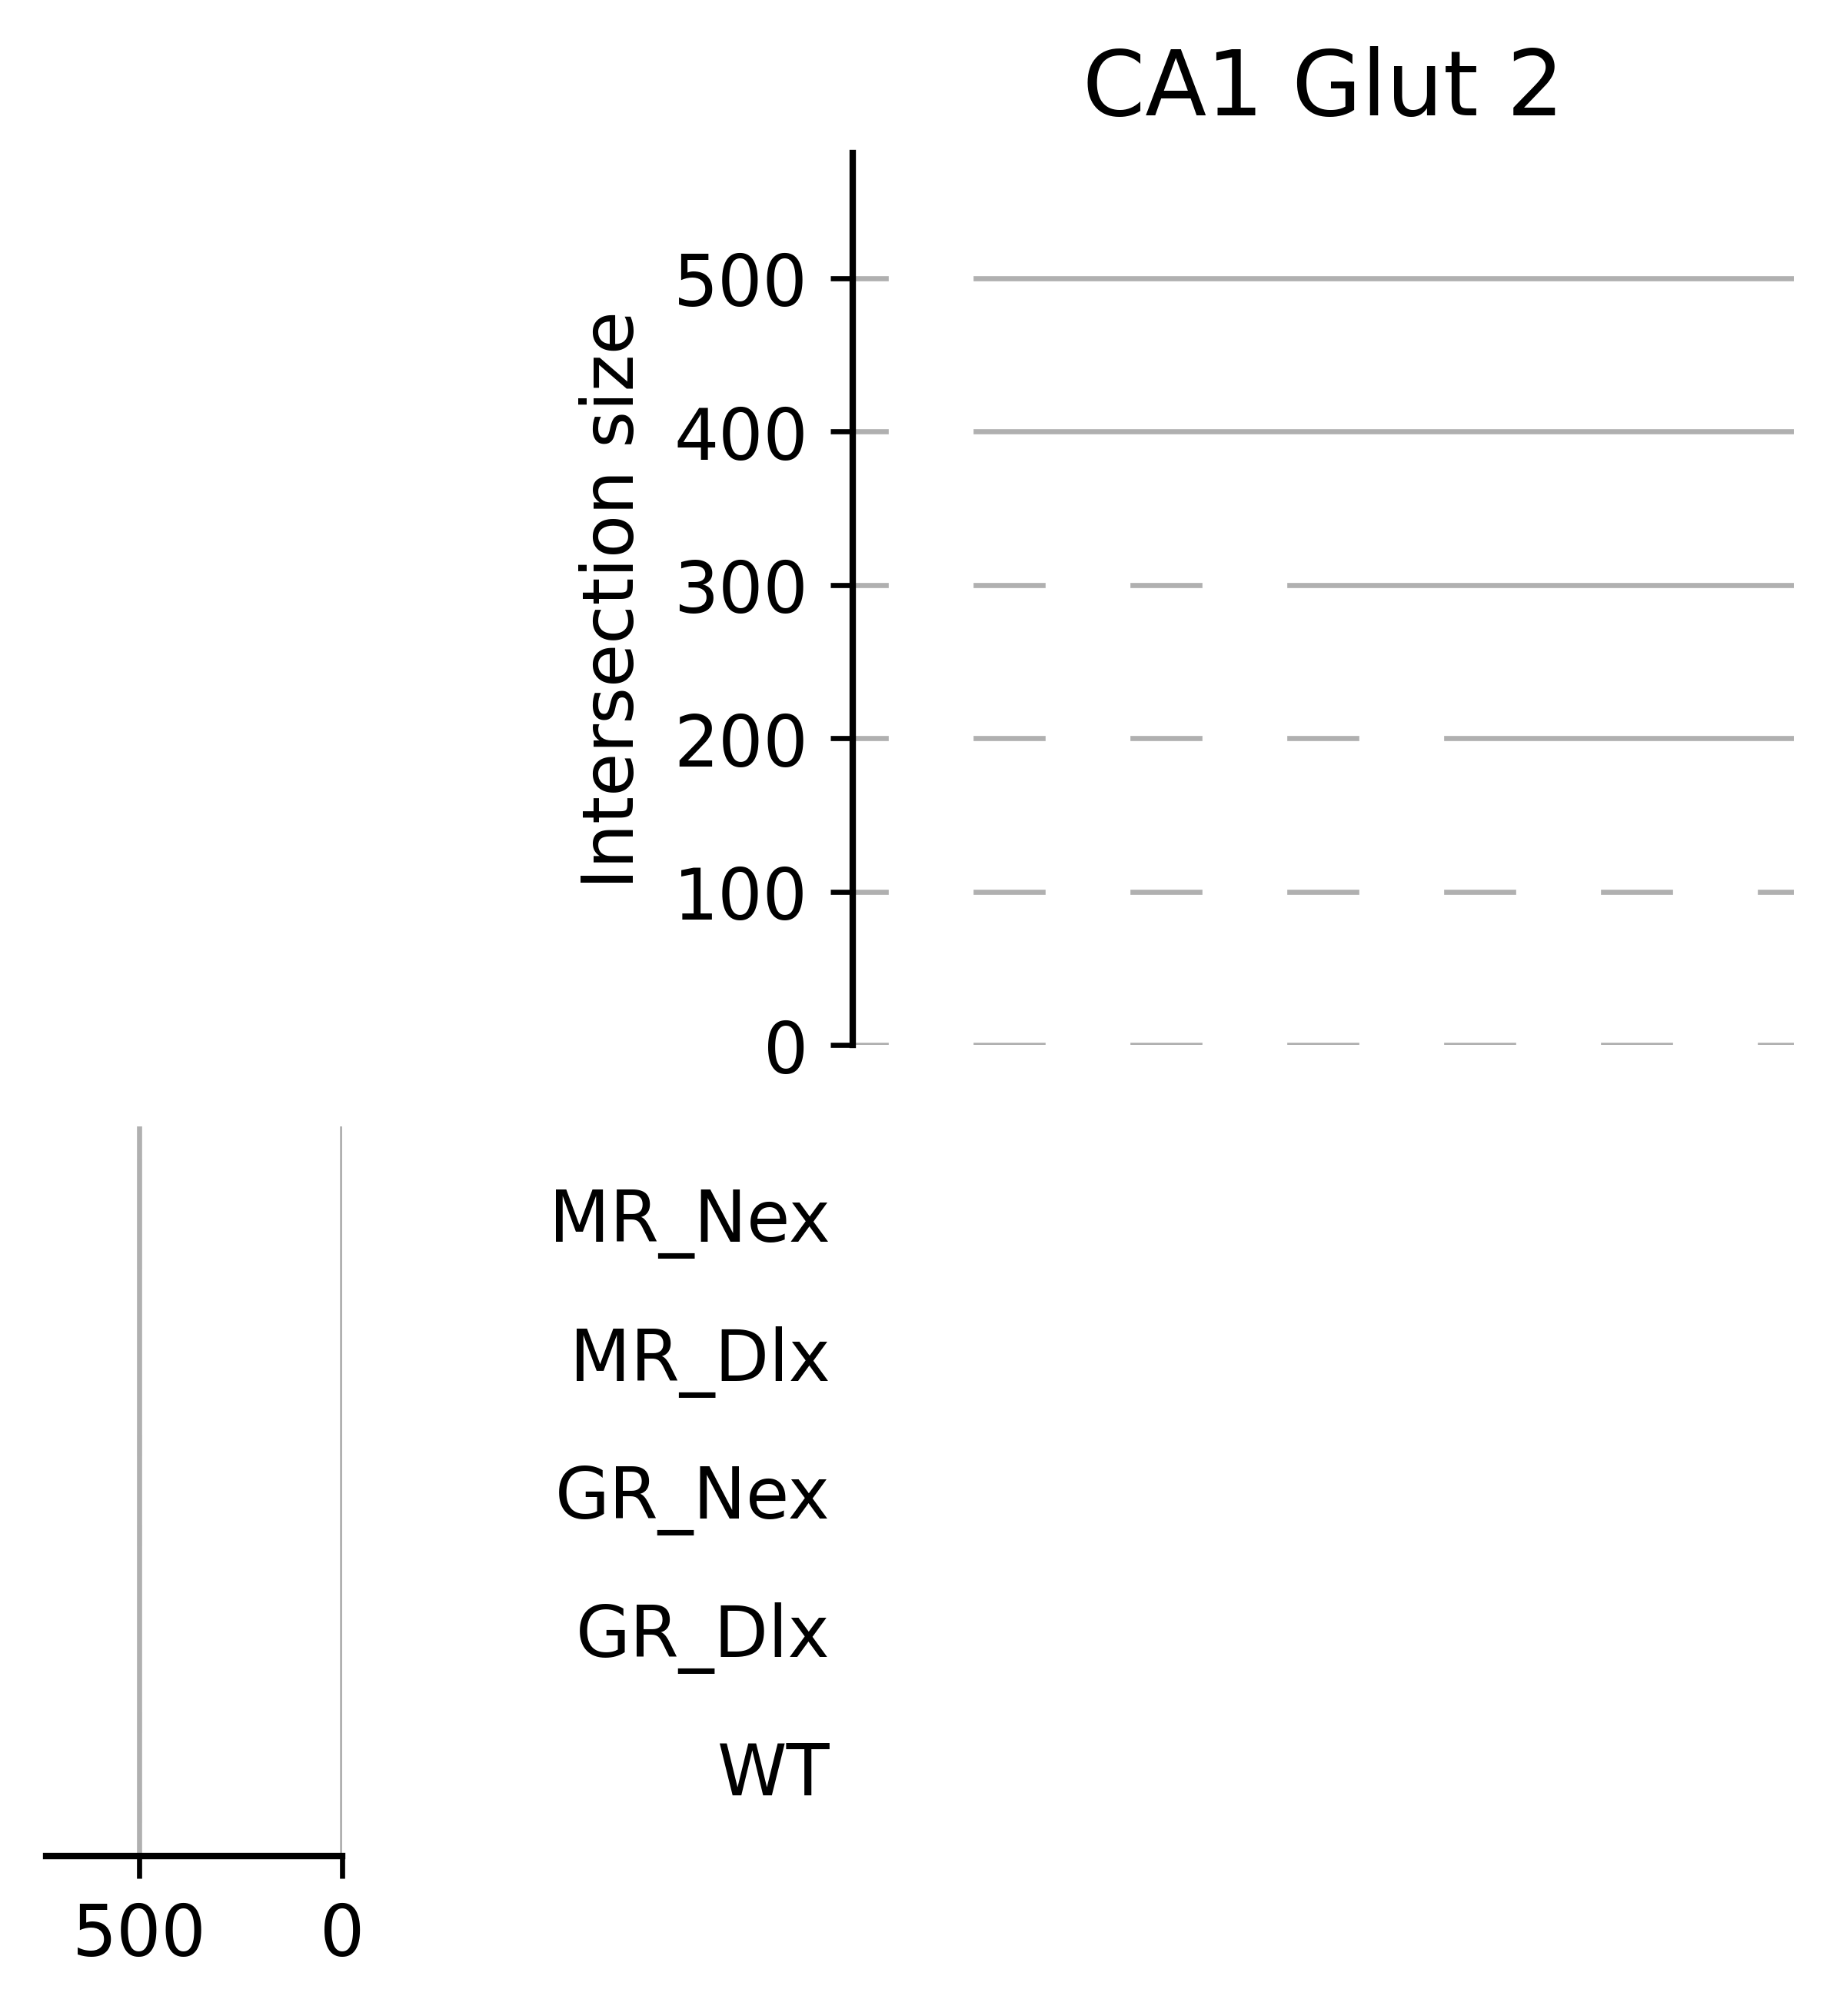

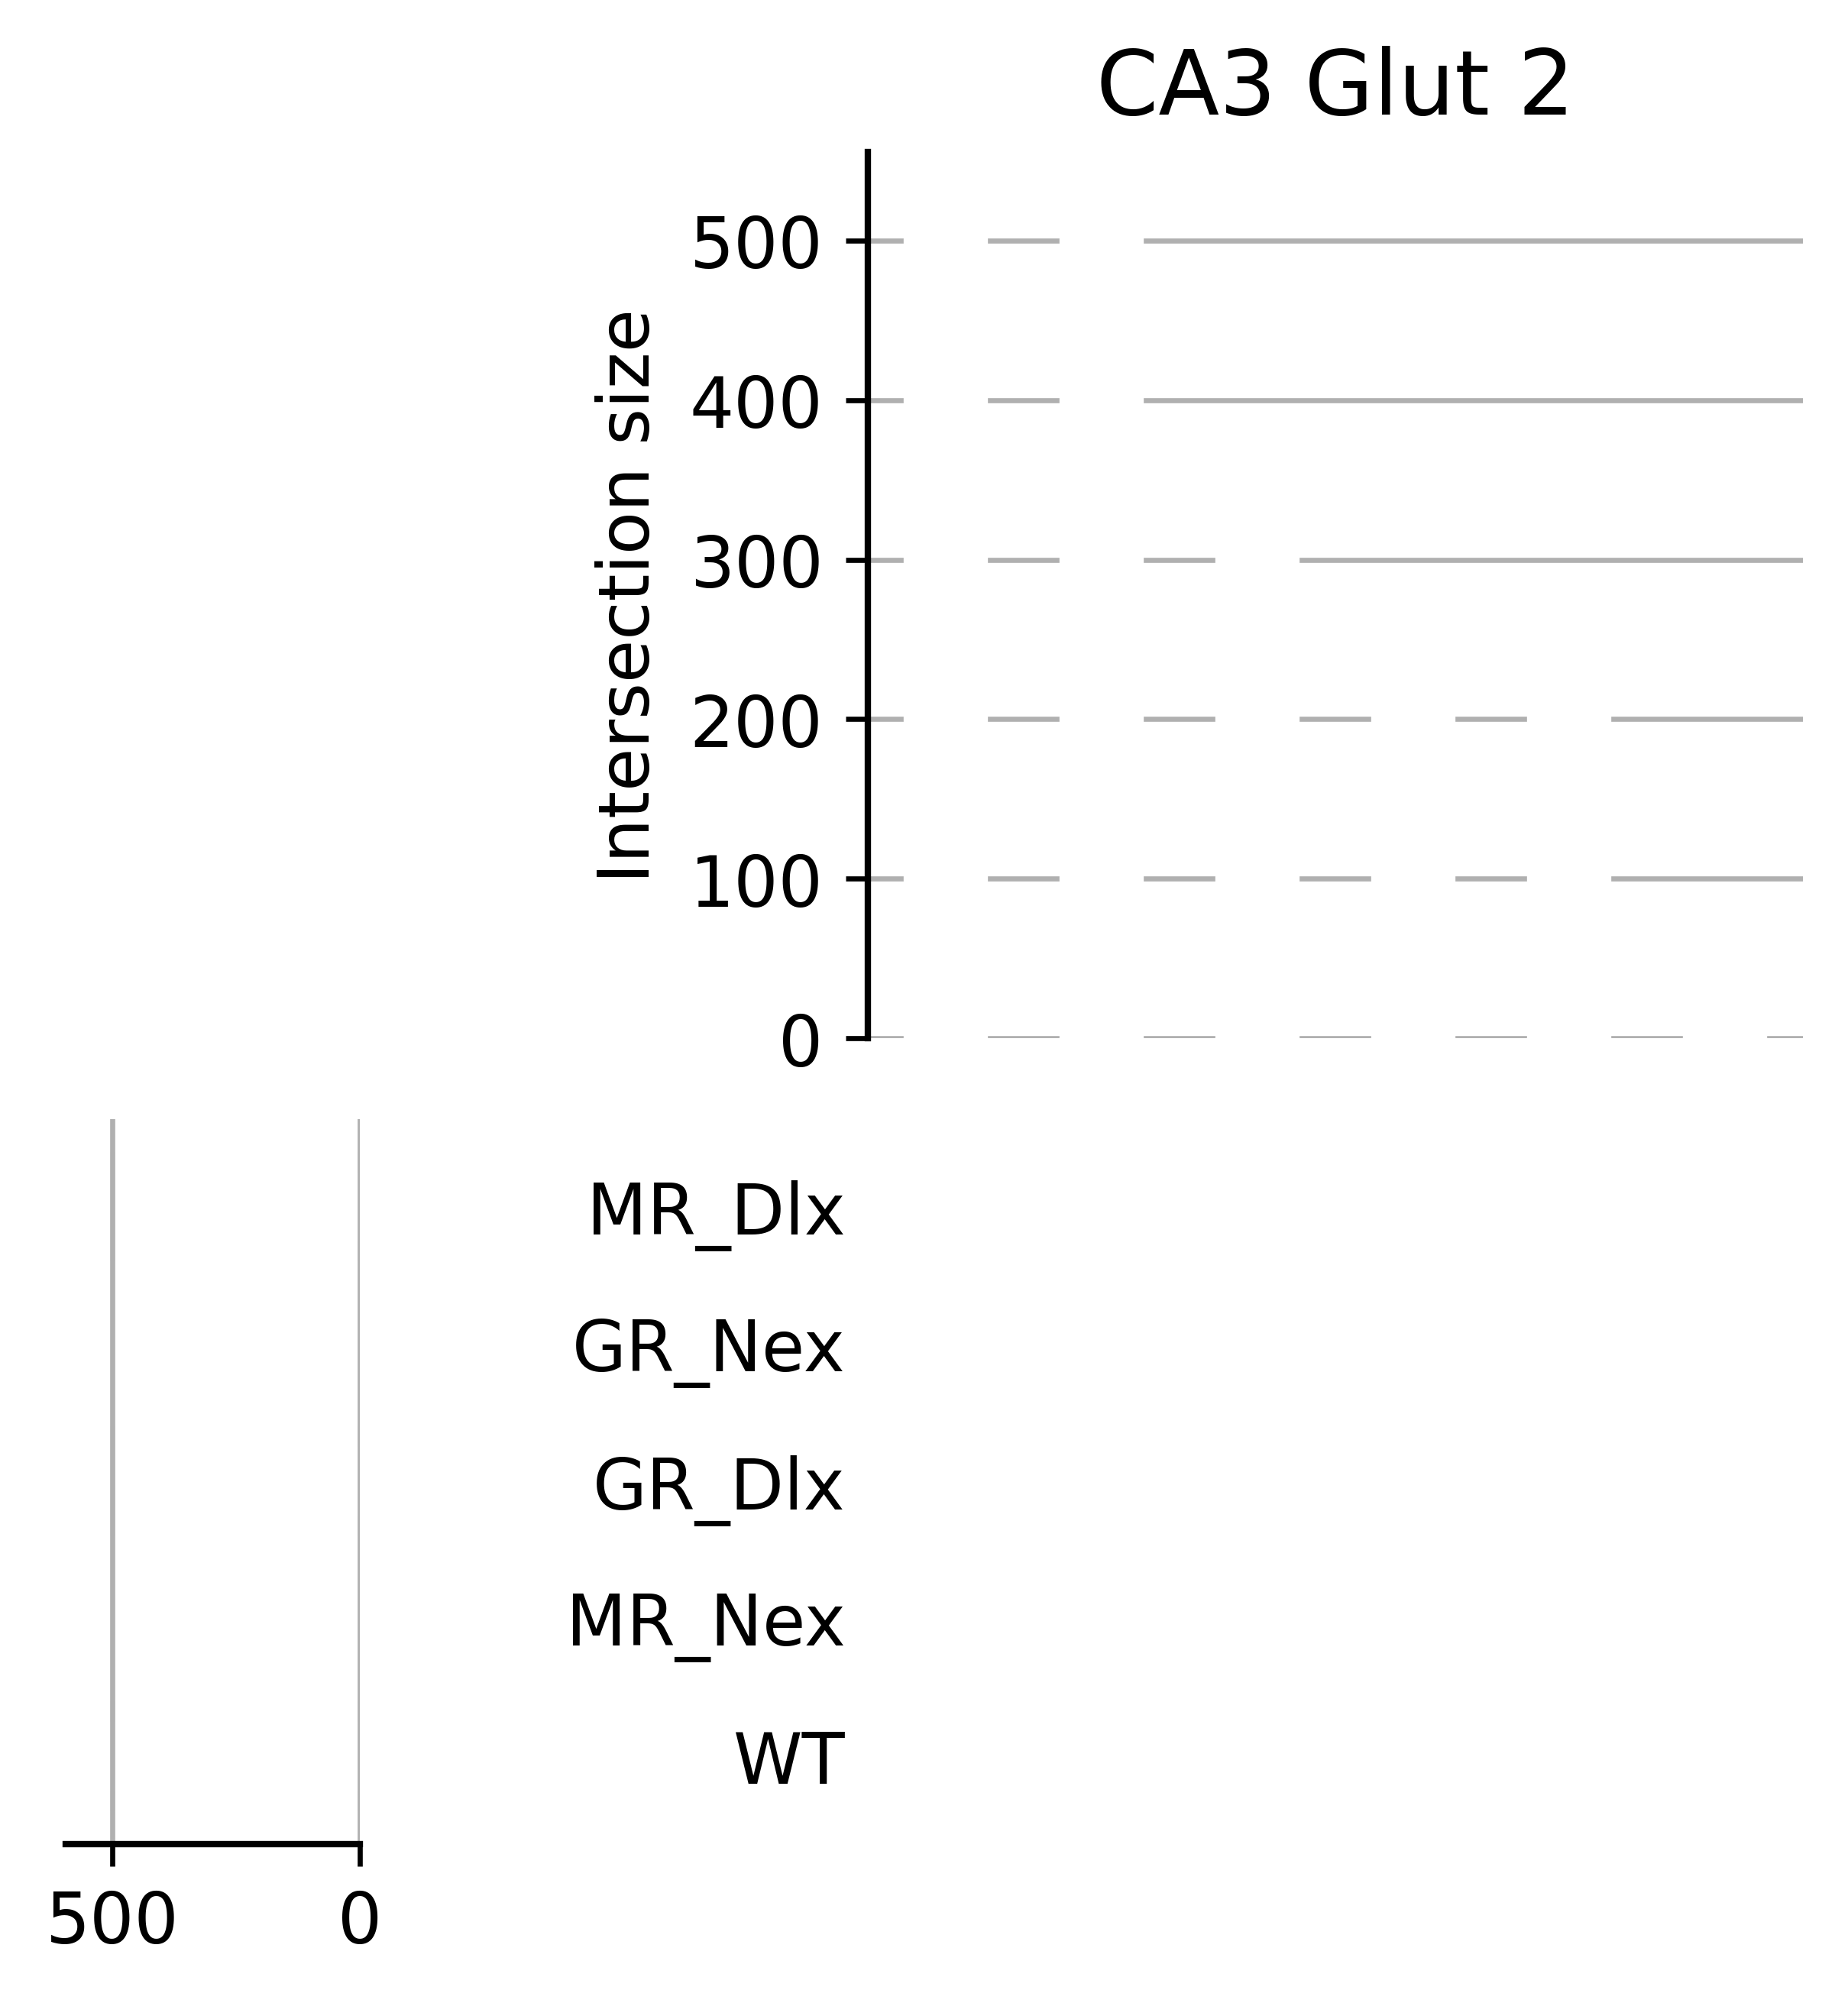

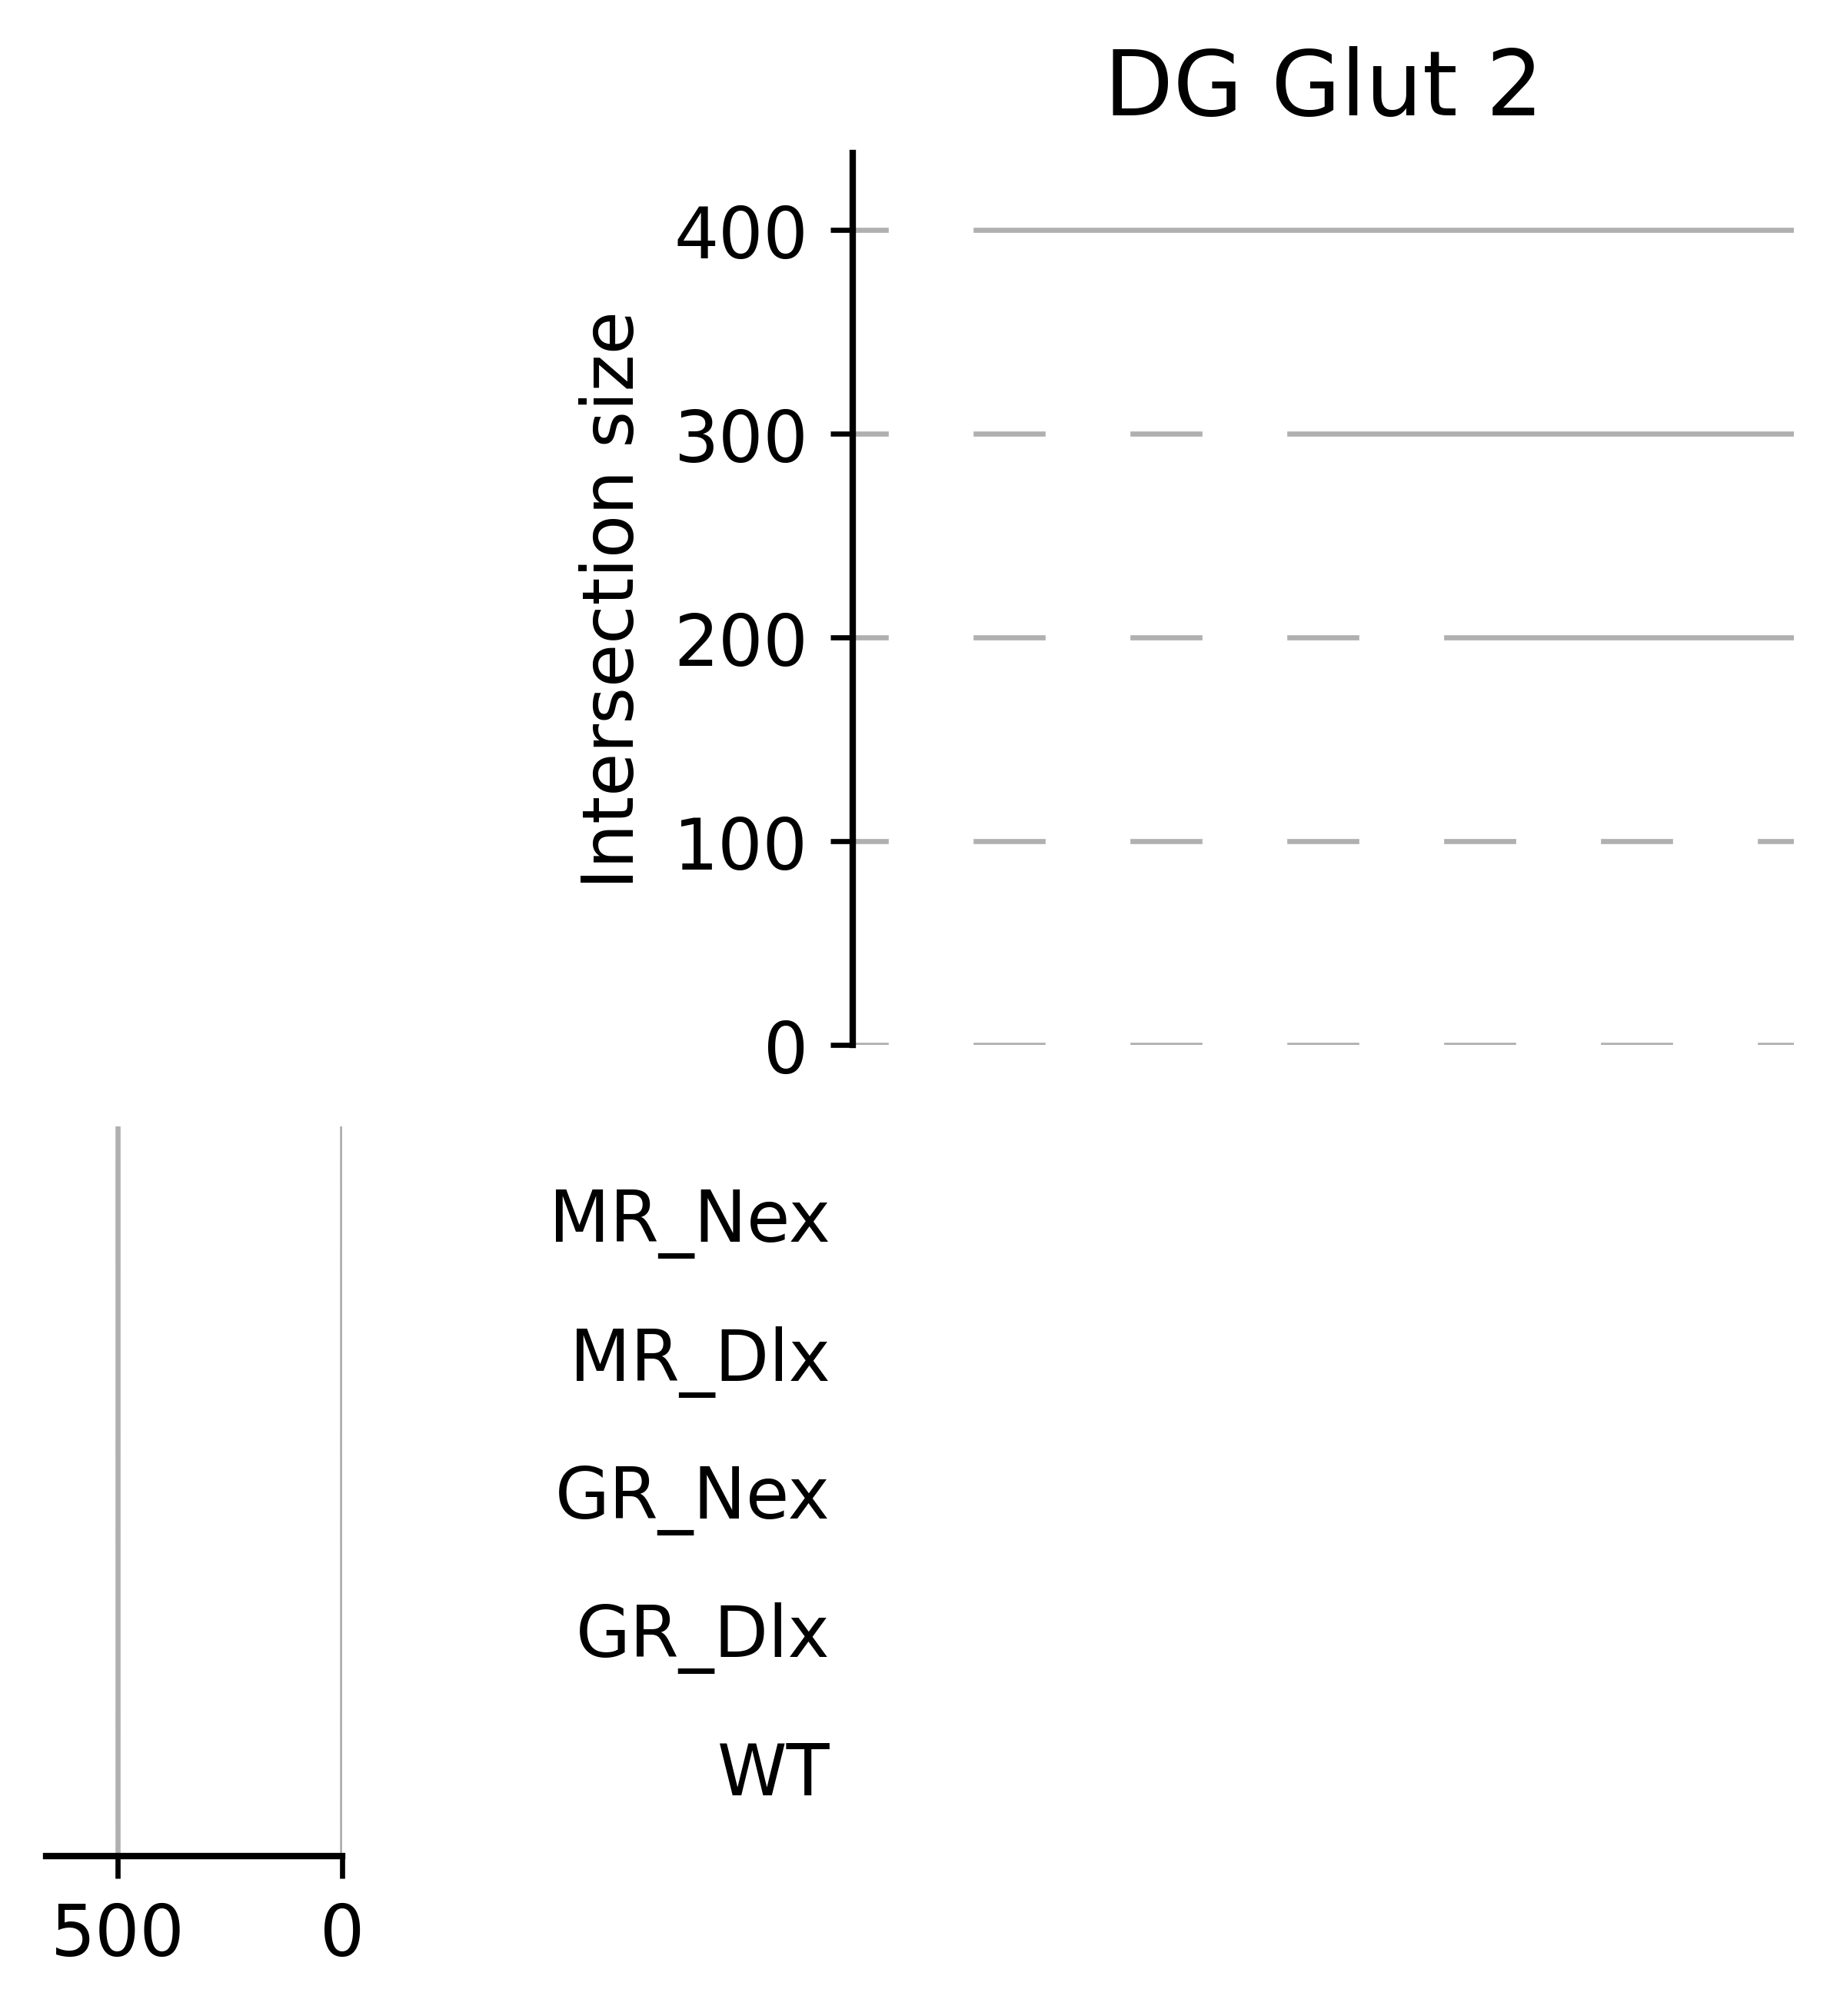

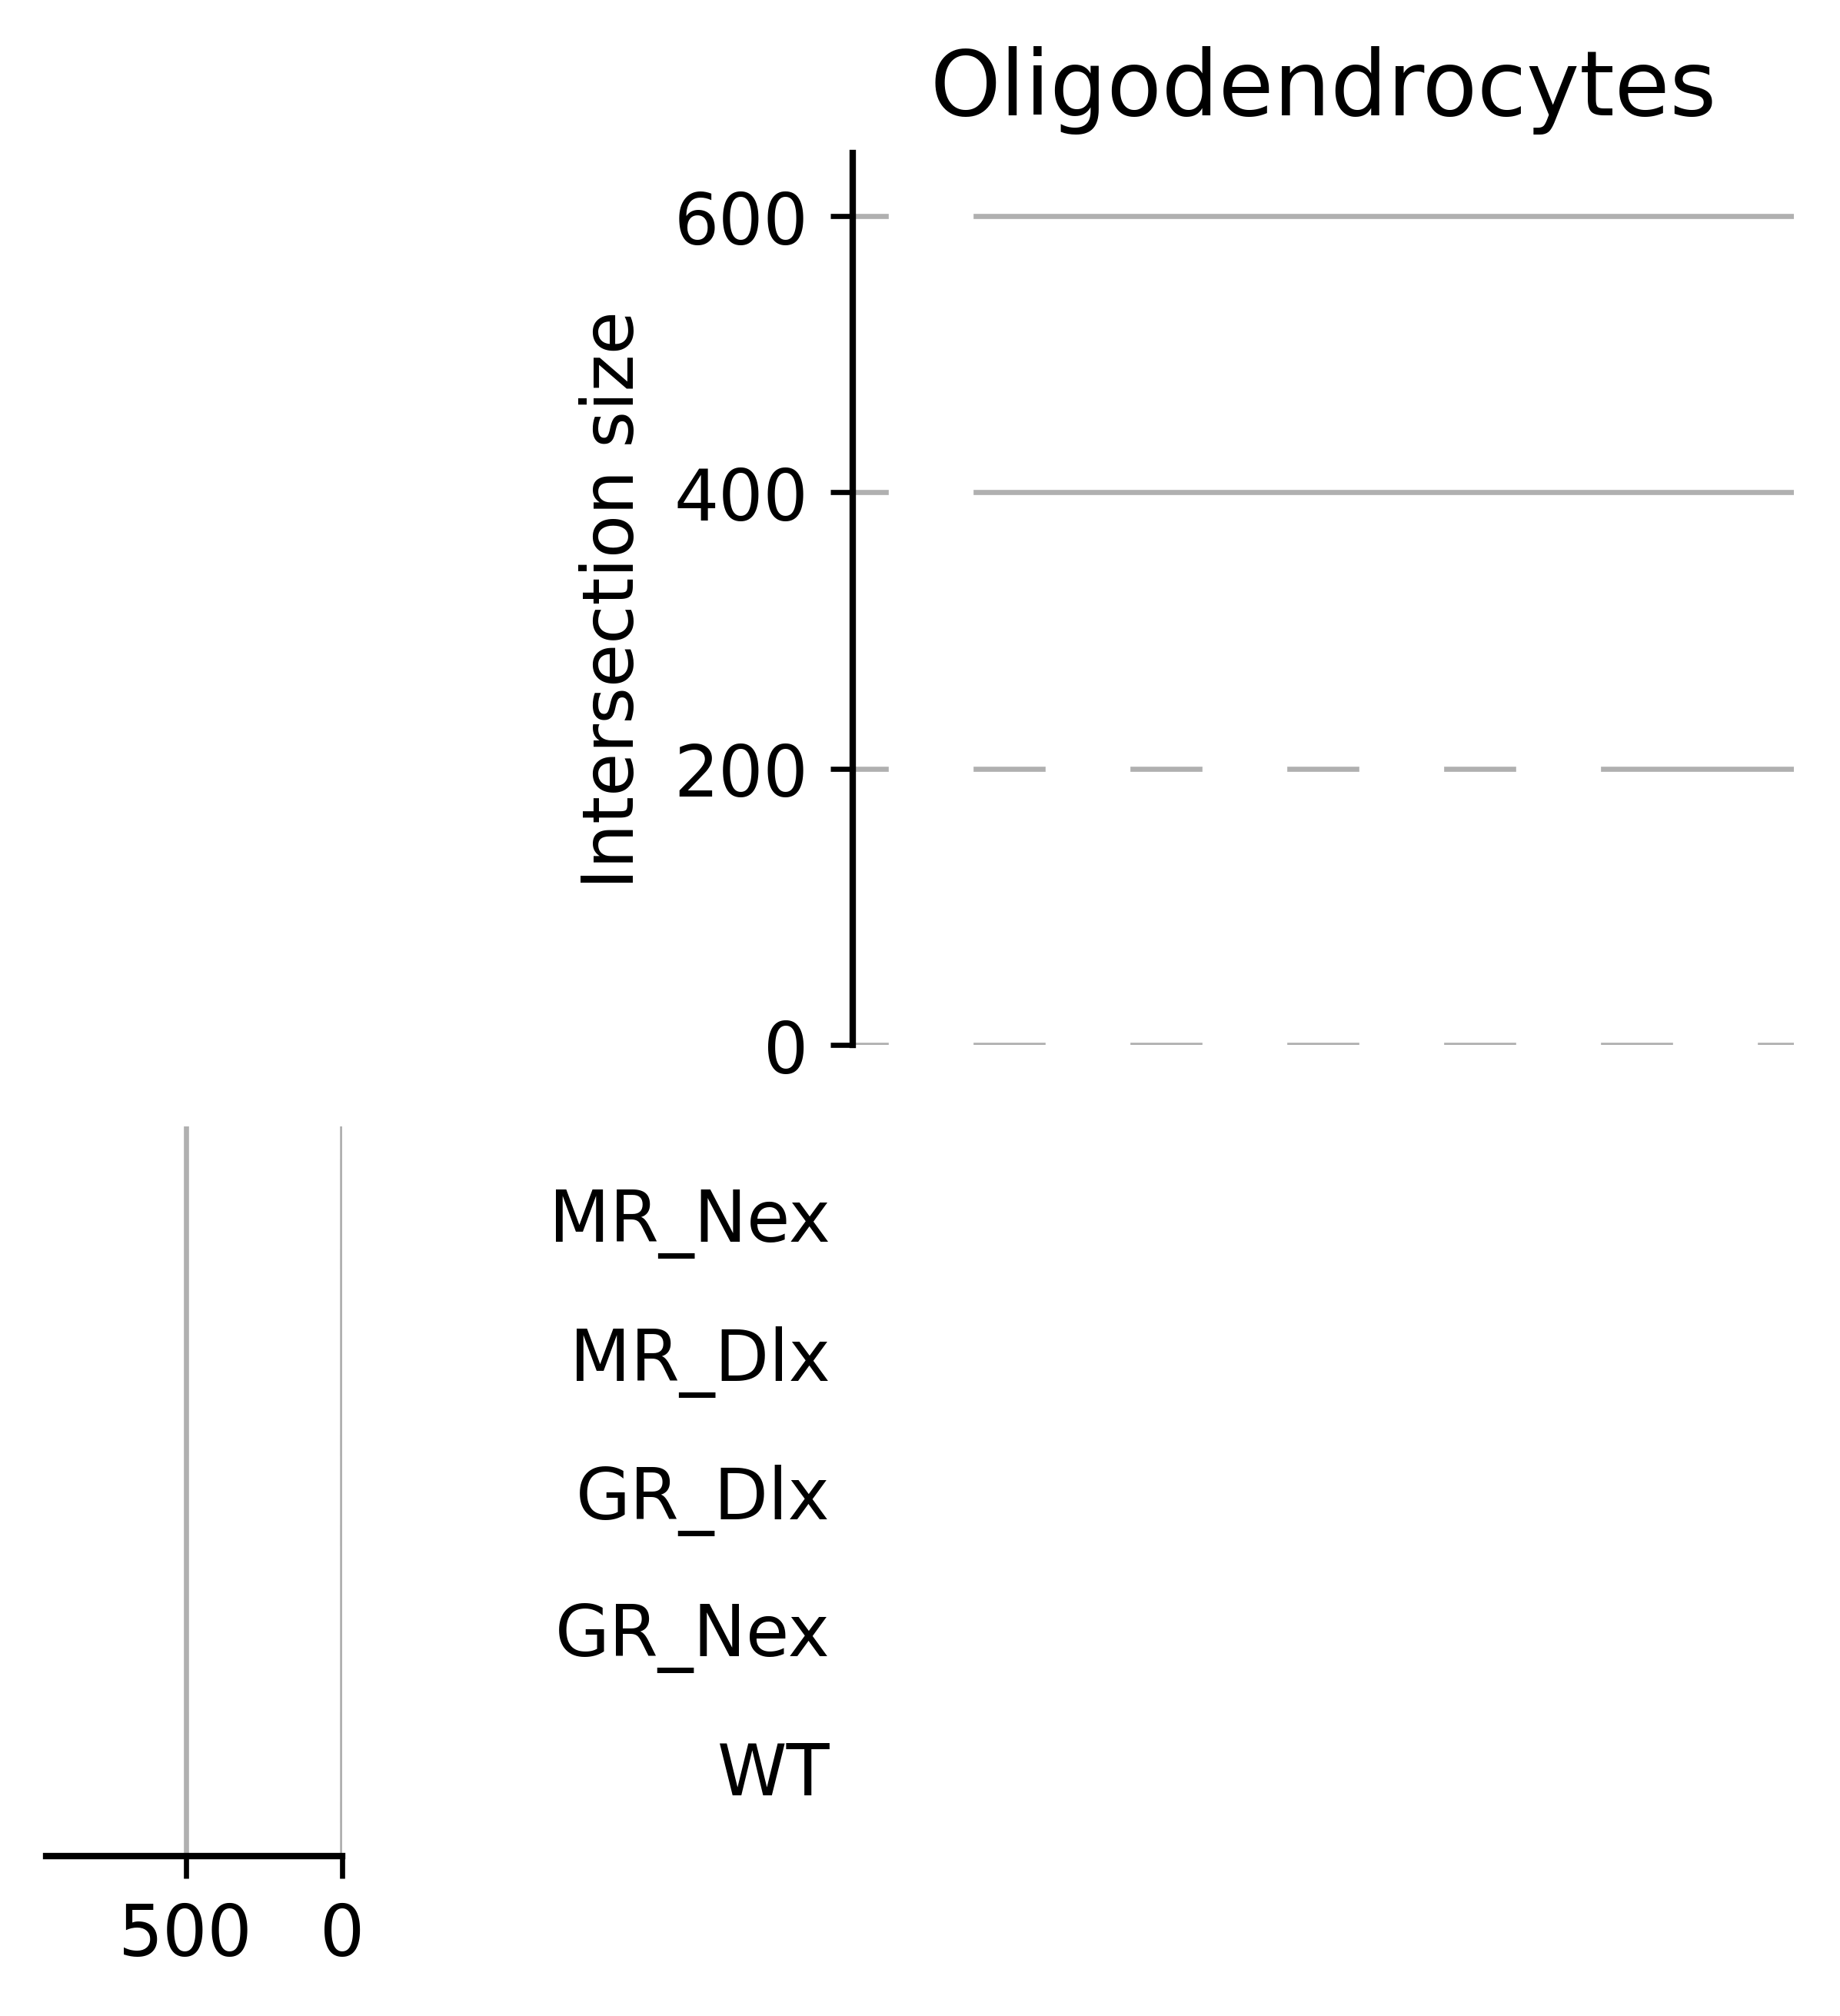

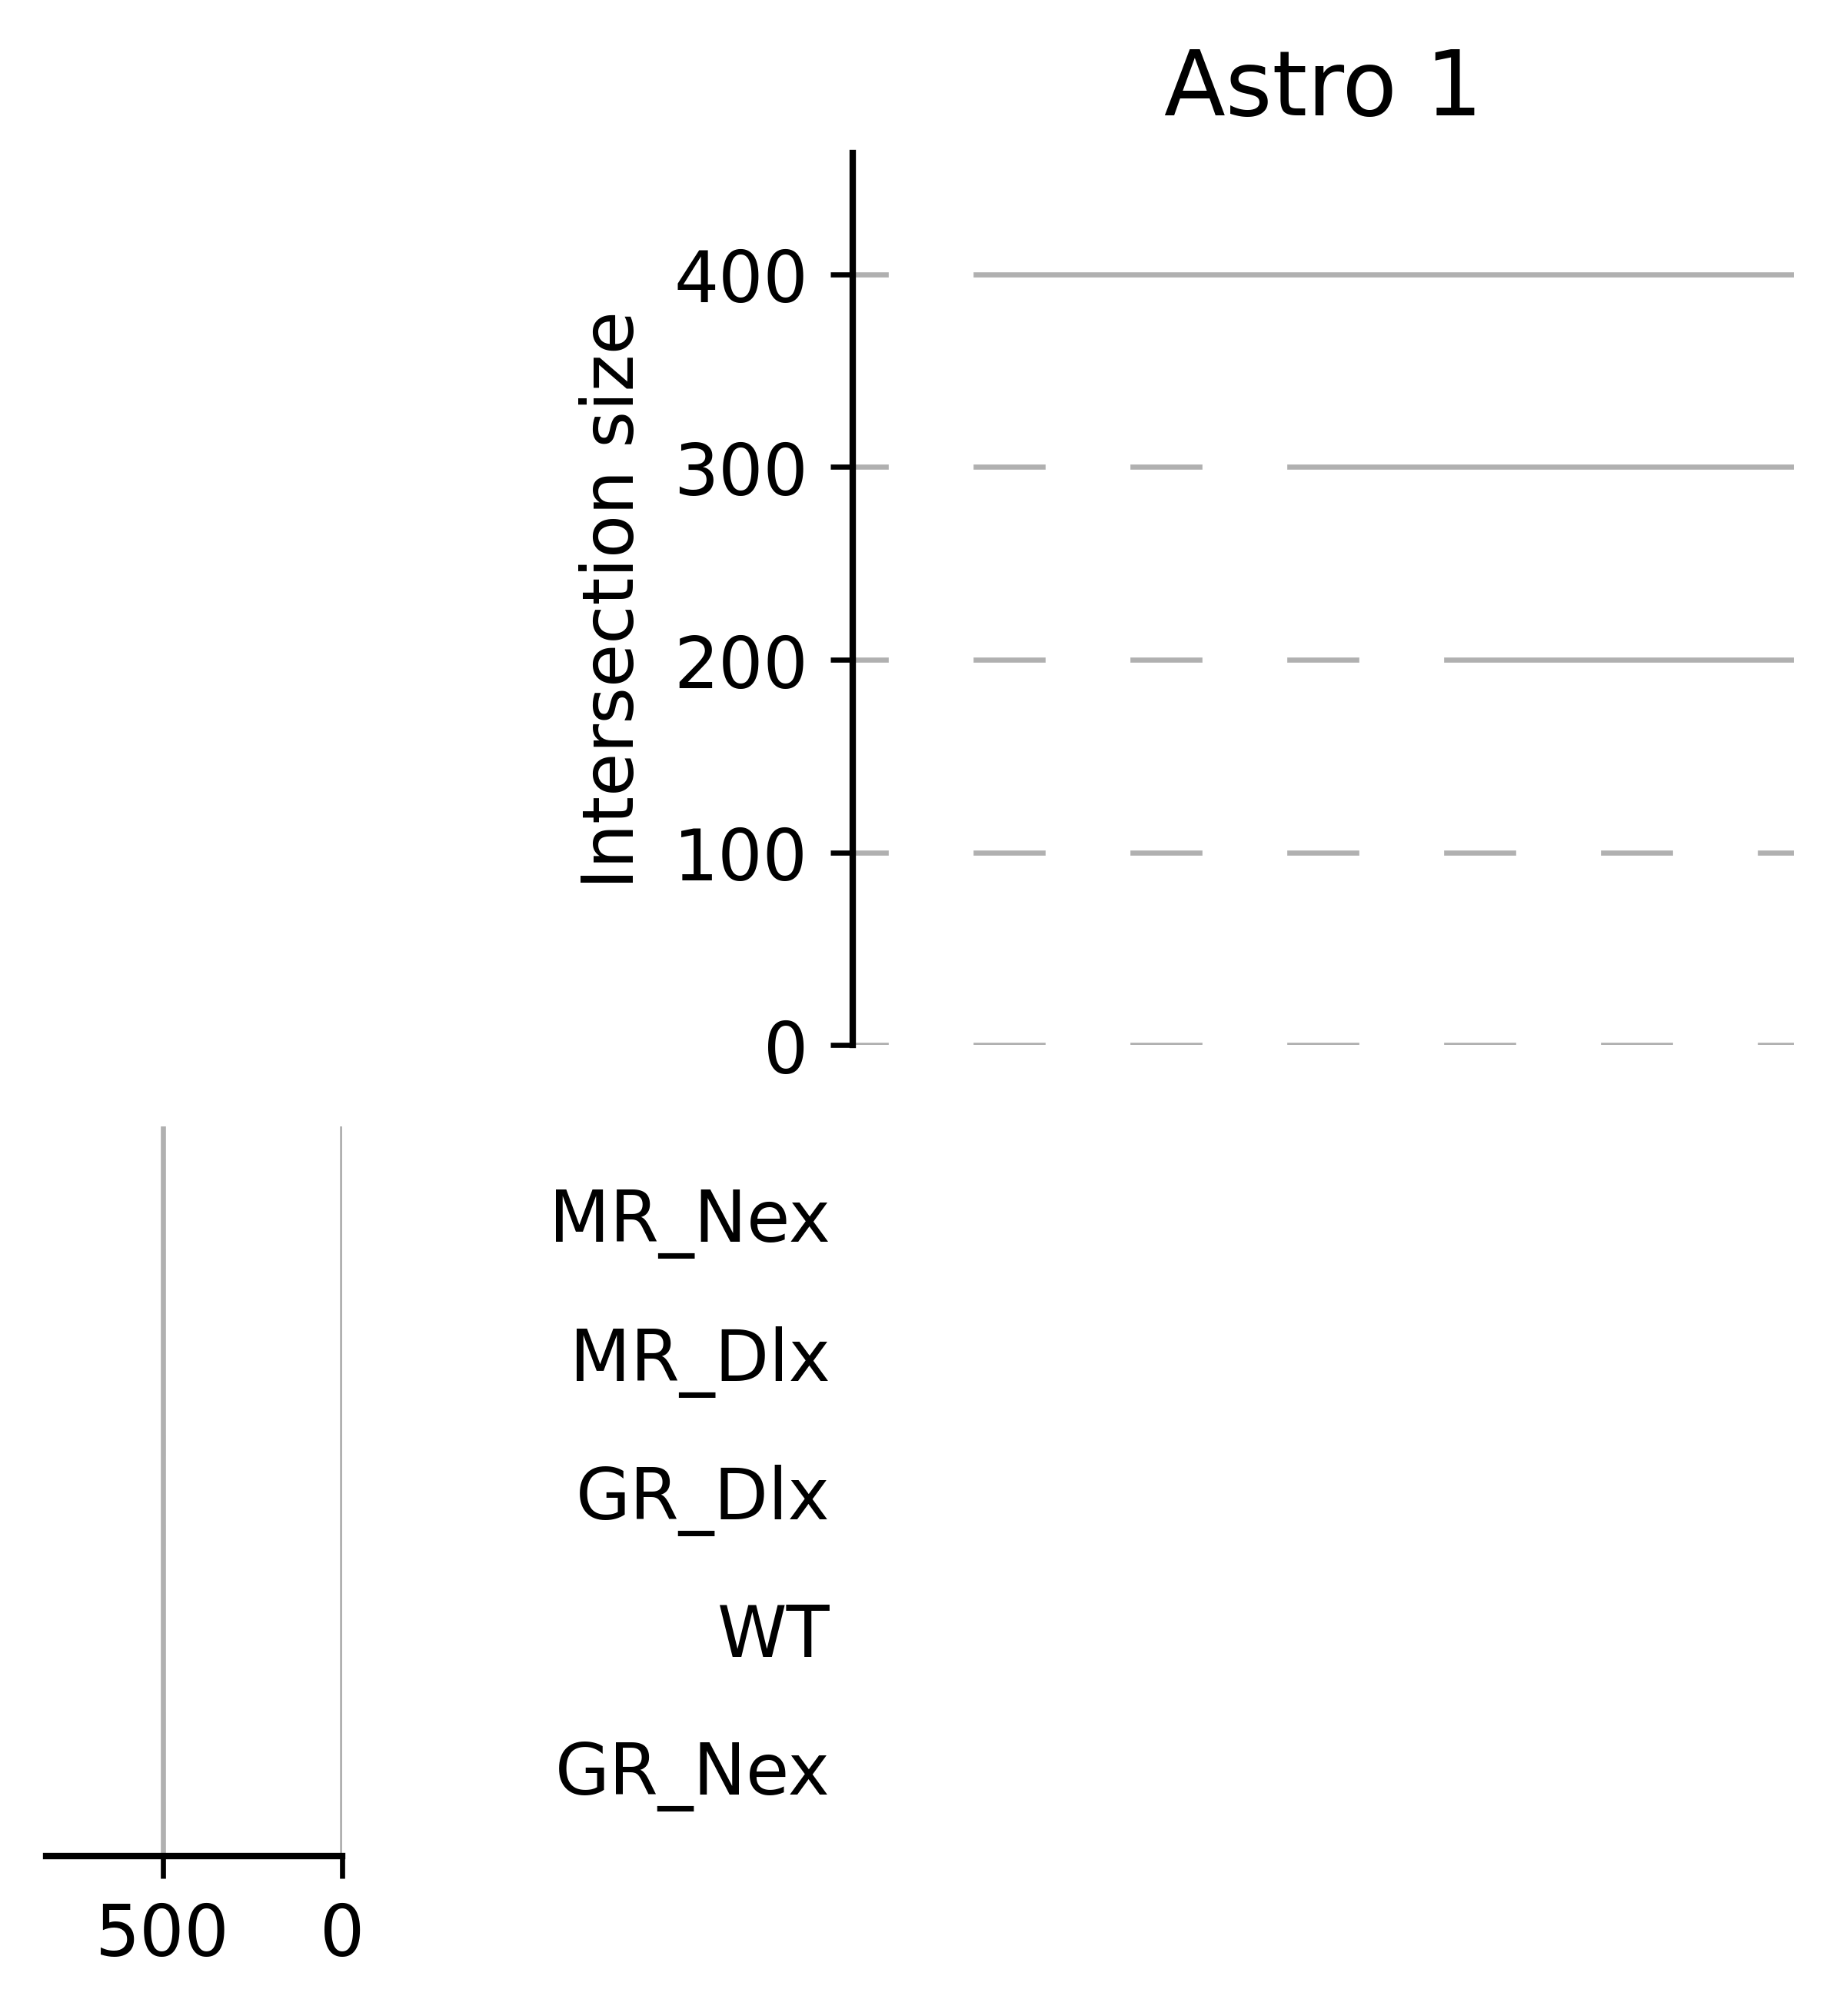

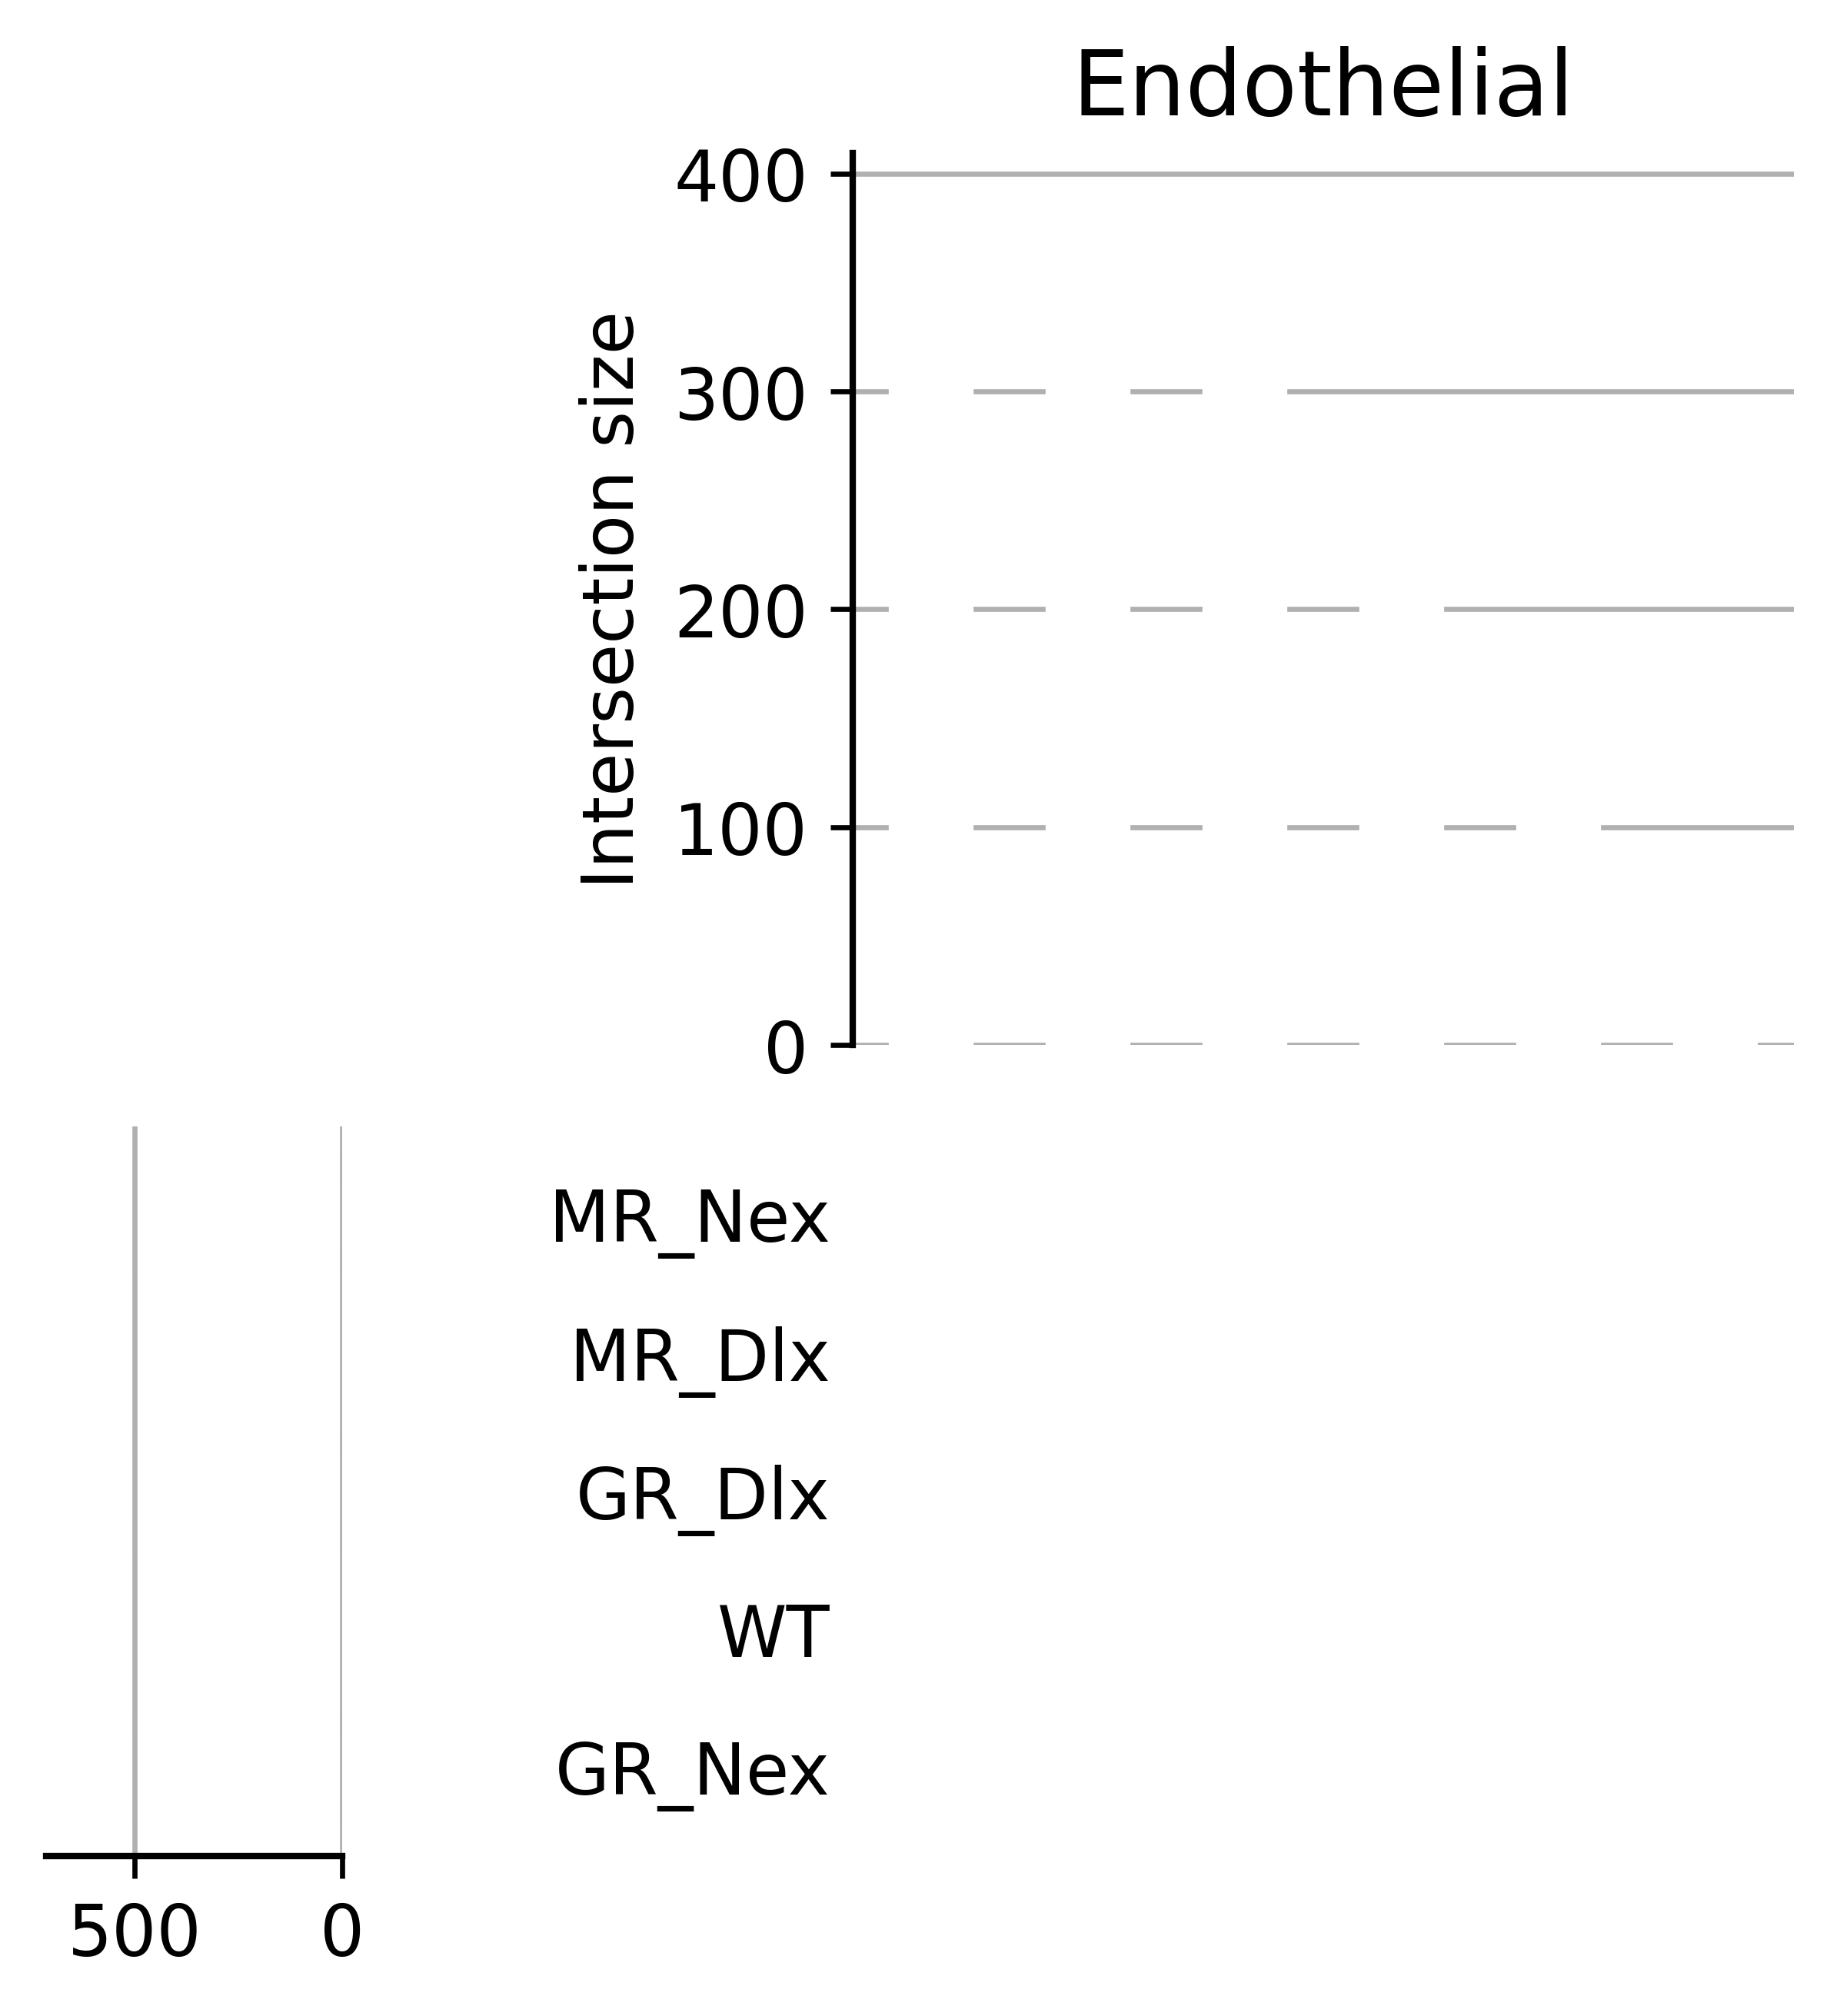

In [5]:
import upsetplot
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['figure.dpi'] = 600
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']
gene_sets = {}
tmp_df = de_genes_sign_mean[~de_genes_sign_mean['test'].isin(['WT_MR', 'WT_GR'])]
min_sizes = [180, 120, 150, 150]
for i, clust in enumerate(['CA1 Glut 2', 'CA3 Glut 2', 'DG Glut 2', 'Oligodendrocytes', "Astro 1", 'Endothelial']):
    print(clust)
    loop_df = tmp_df[tmp_df['clust']==clust]
    for test in loop_df.test.unique():
        gene_sets[test] = set(loop_df[loop_df.test==test].gene.tolist())
    upset_data_sub = upsetplot.from_contents(gene_sets)
    indices = [(True, False, False, False, False),
           (False, True, False, False, False),
           (False, False, True, False, False), 
           (False, False, False, True, False), 
           (False, False, False, False, True),
           (True, True, True, True, True)
          ]
    df_list = []
    for idx in indices:
        df_list.append(upset_data_sub.loc[idx])
    upset_data_sub = pd.concat(df_list)
    axs = upsetplot.plot(upset_data_sub, sort_by='cardinality')#, min_subset_size=min_sizes[i])
    axs['intersections'].set_title(clust)
    #plt.savefig(base_dir + 'figures/upset_' + clust + '_up.png', dpi=600)

CA1 Glut 2


<ipython-input-17-e33933e40d14>:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_list.append(upset_data_sub.loc[idx])


CA3 Glut 2
DG Glut 2
Oligodendrocytes
Astro 1
Endothelial
GABA


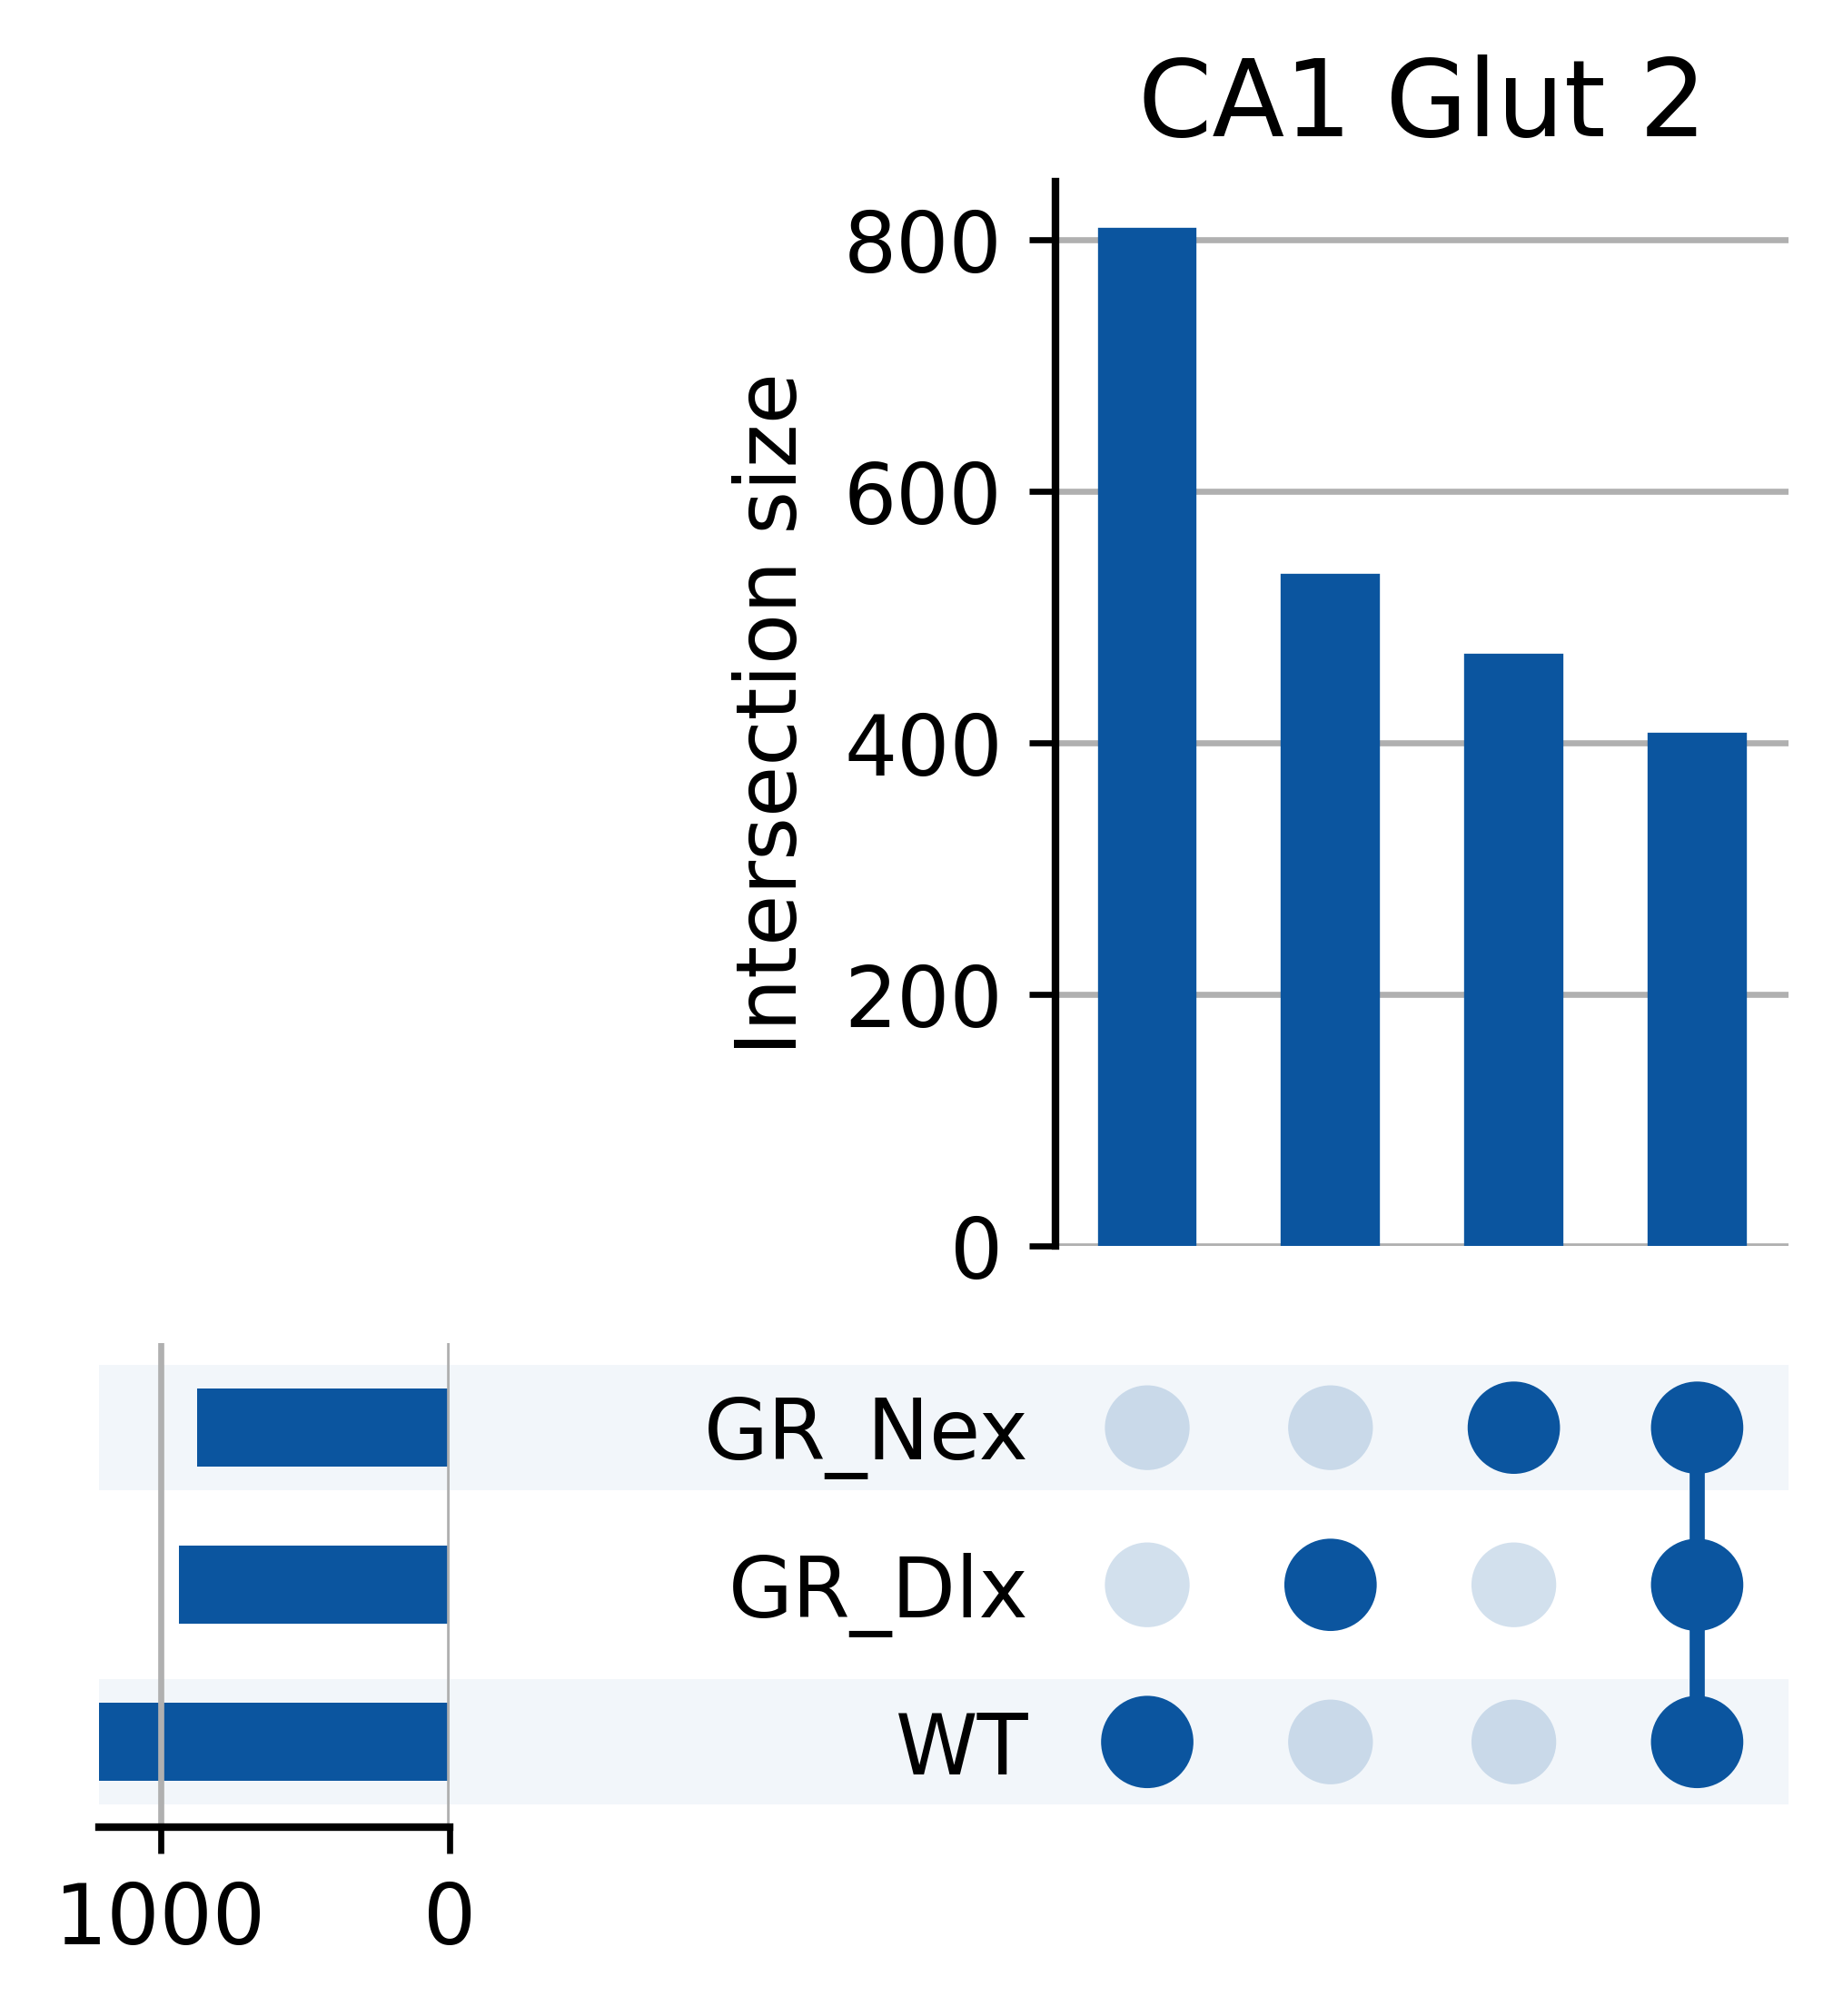

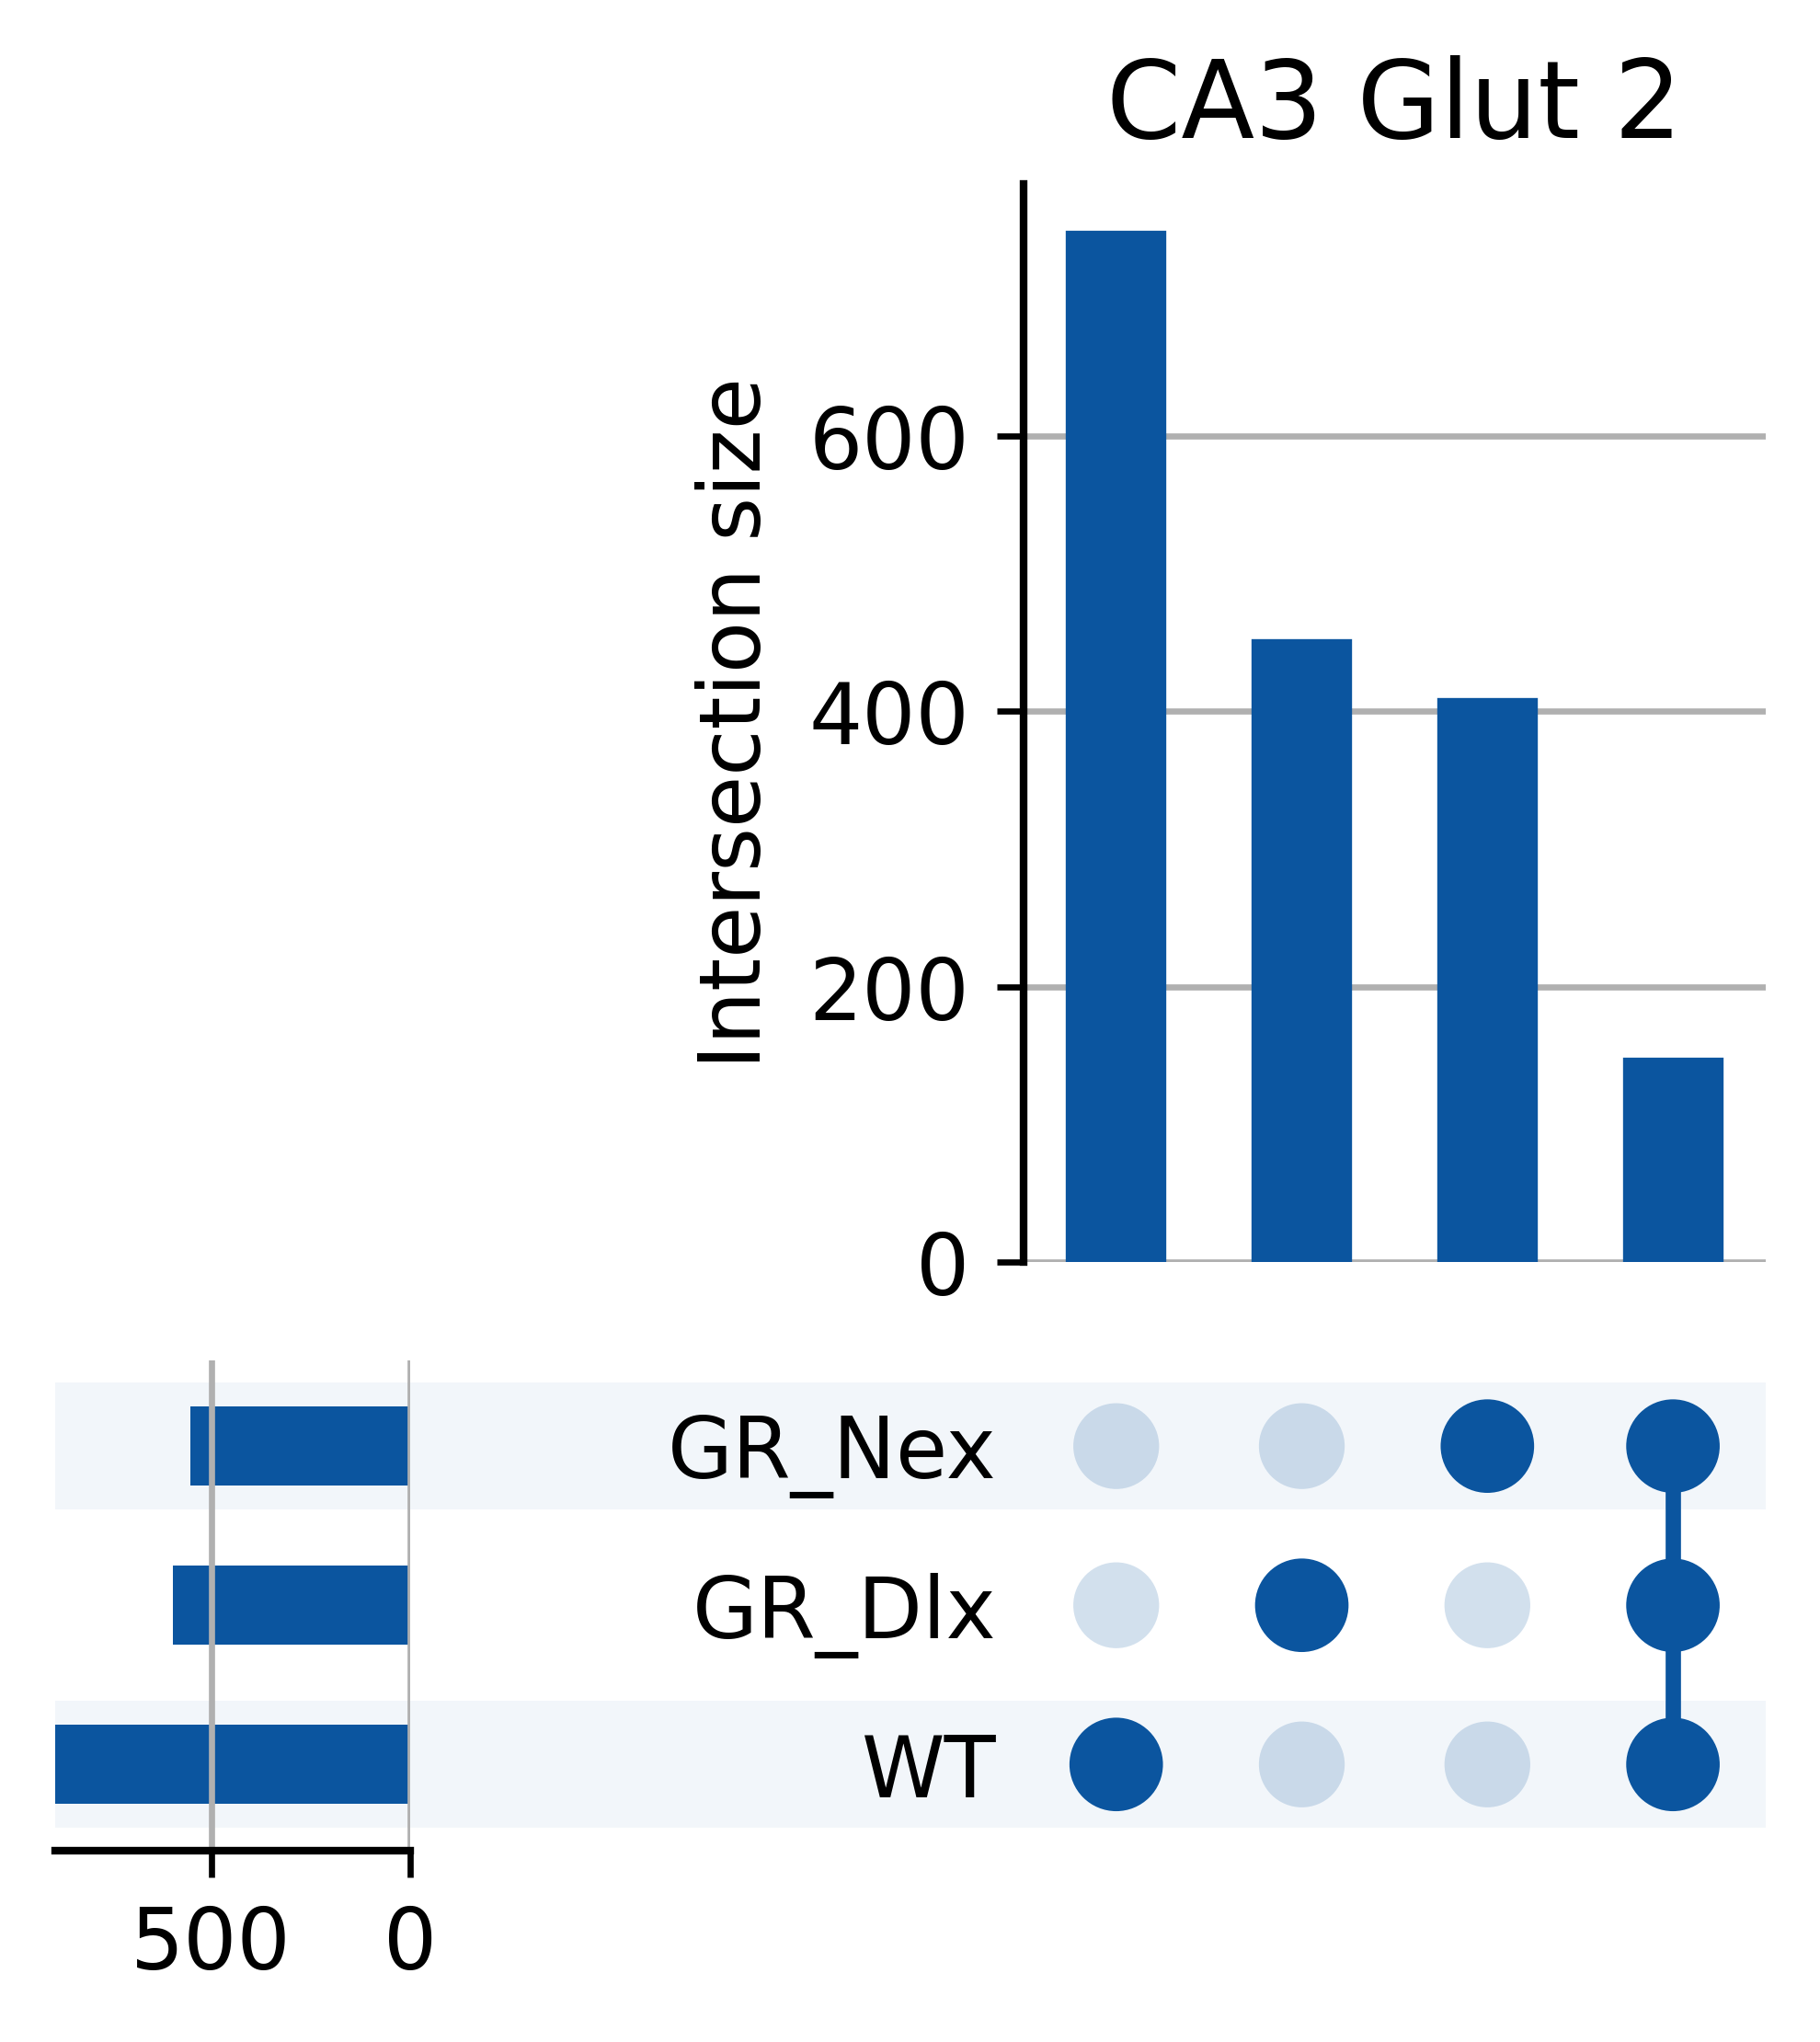

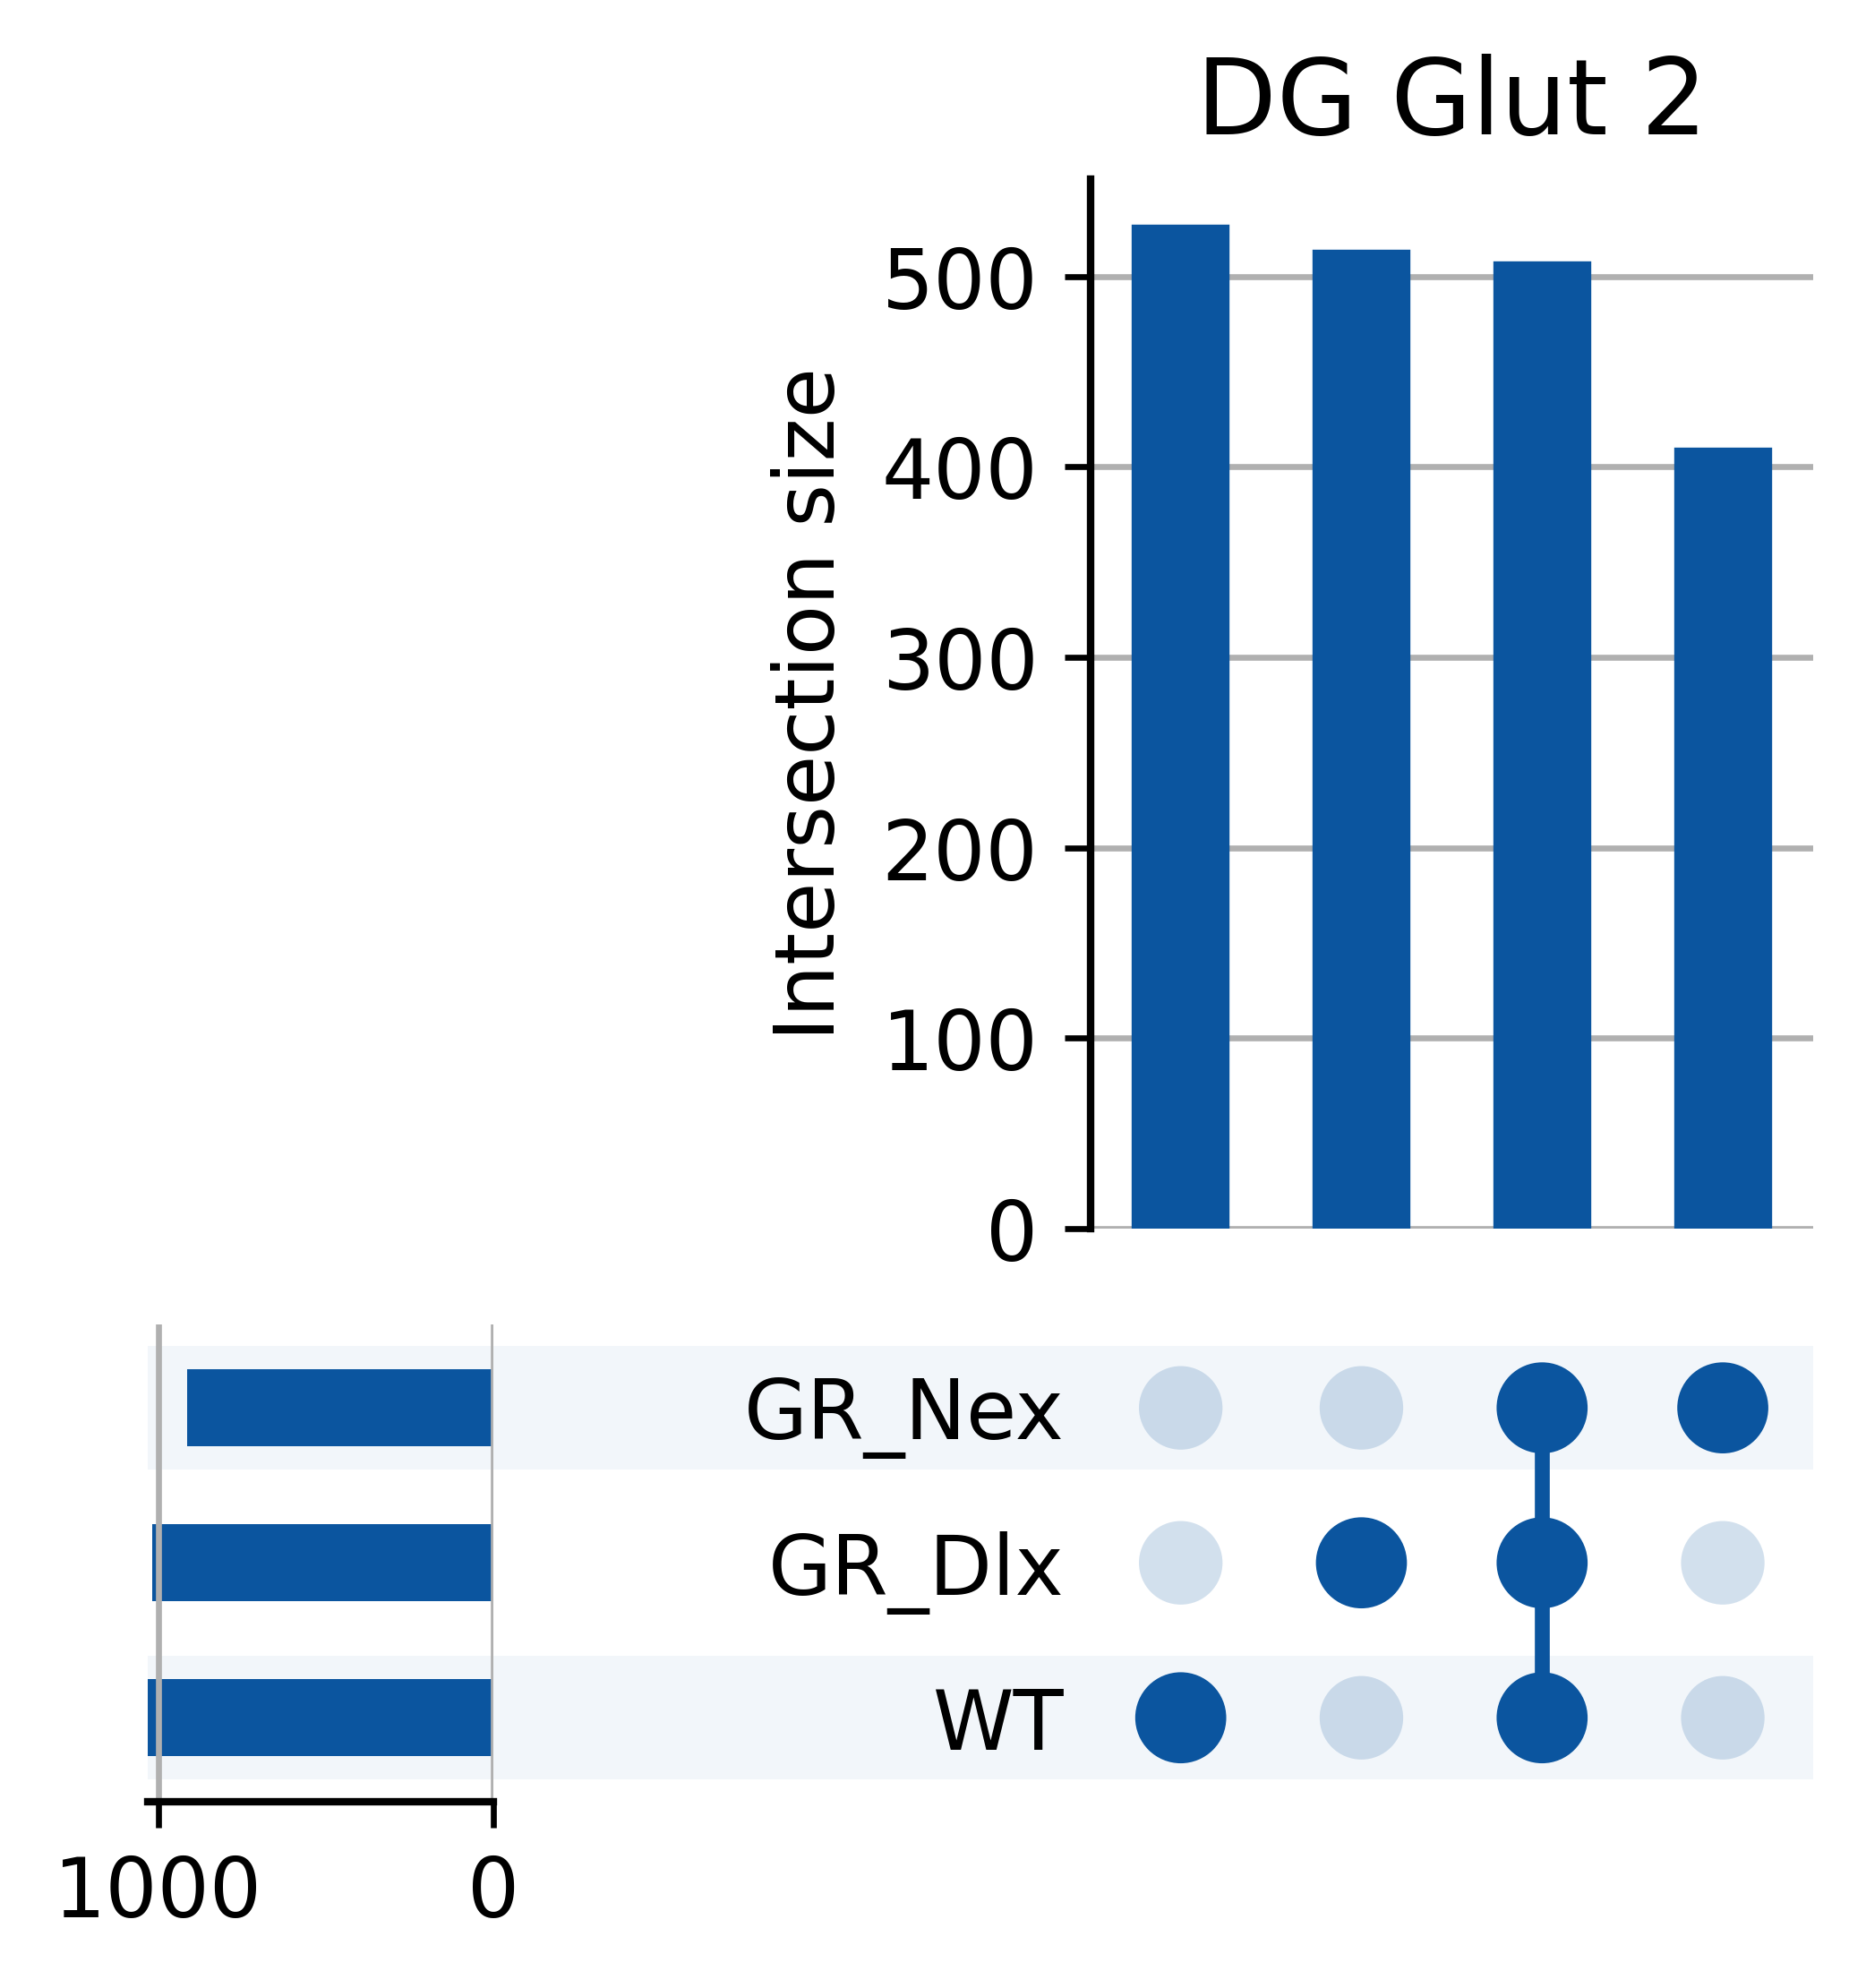

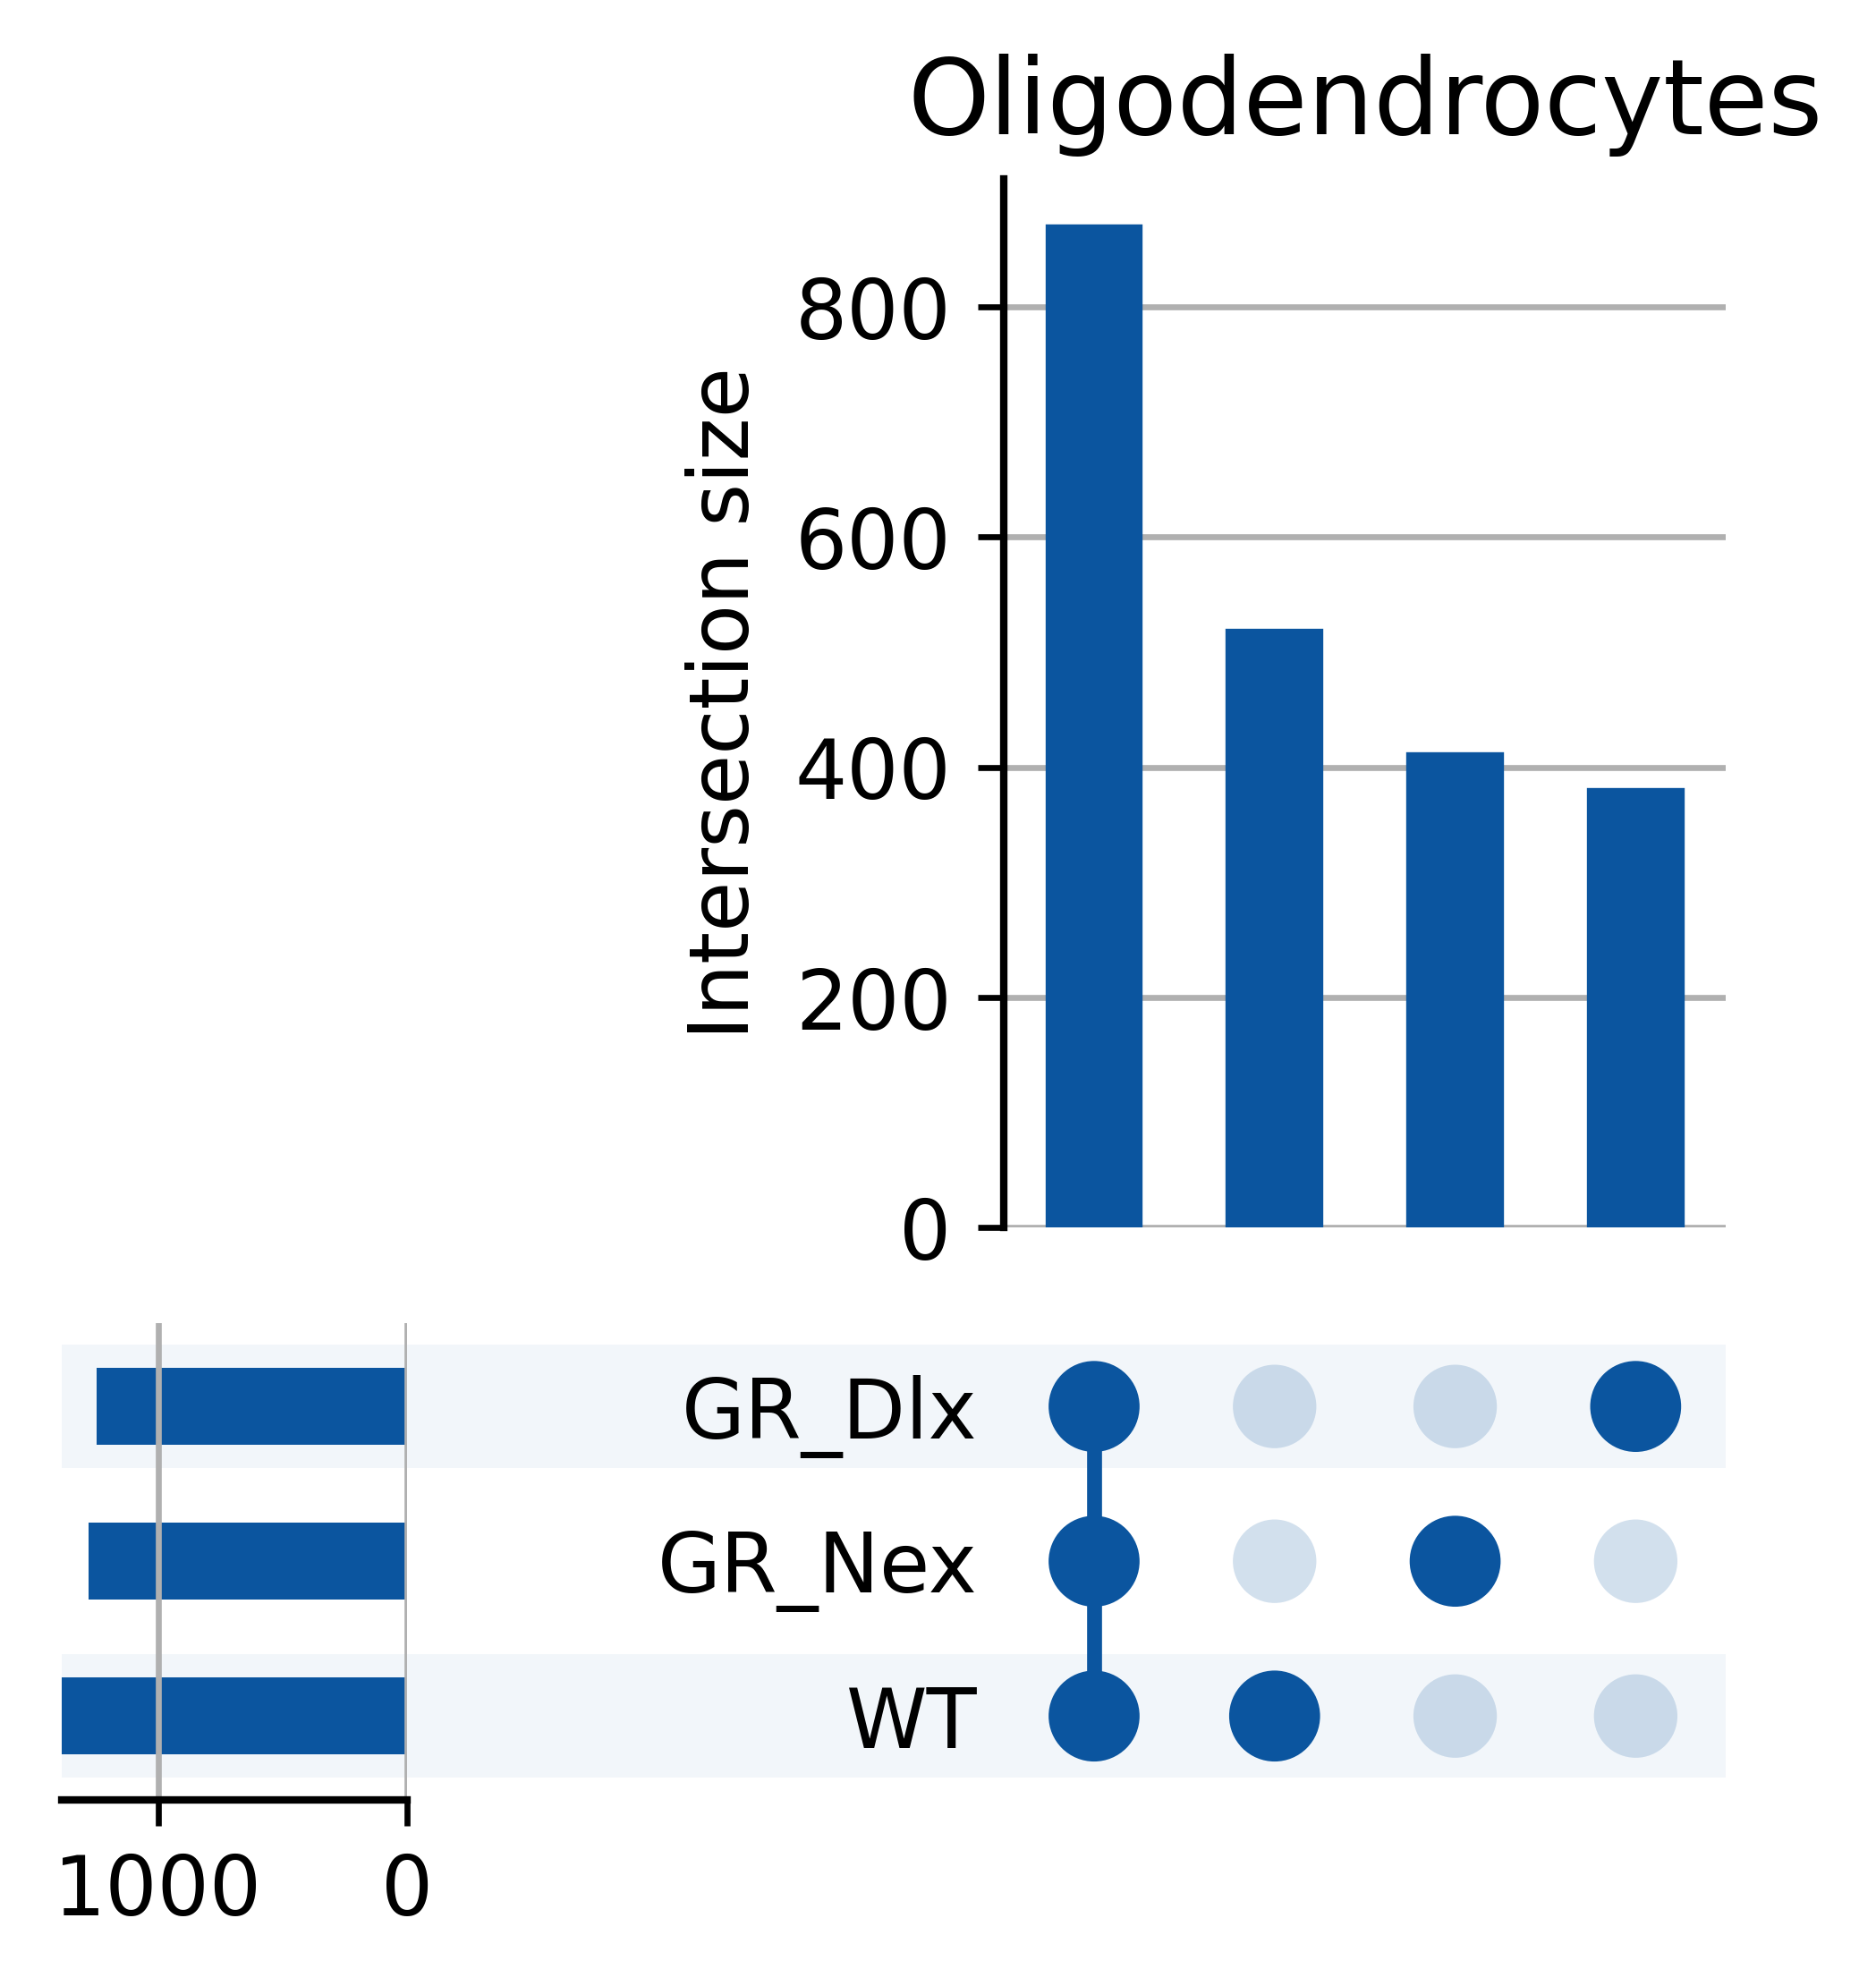

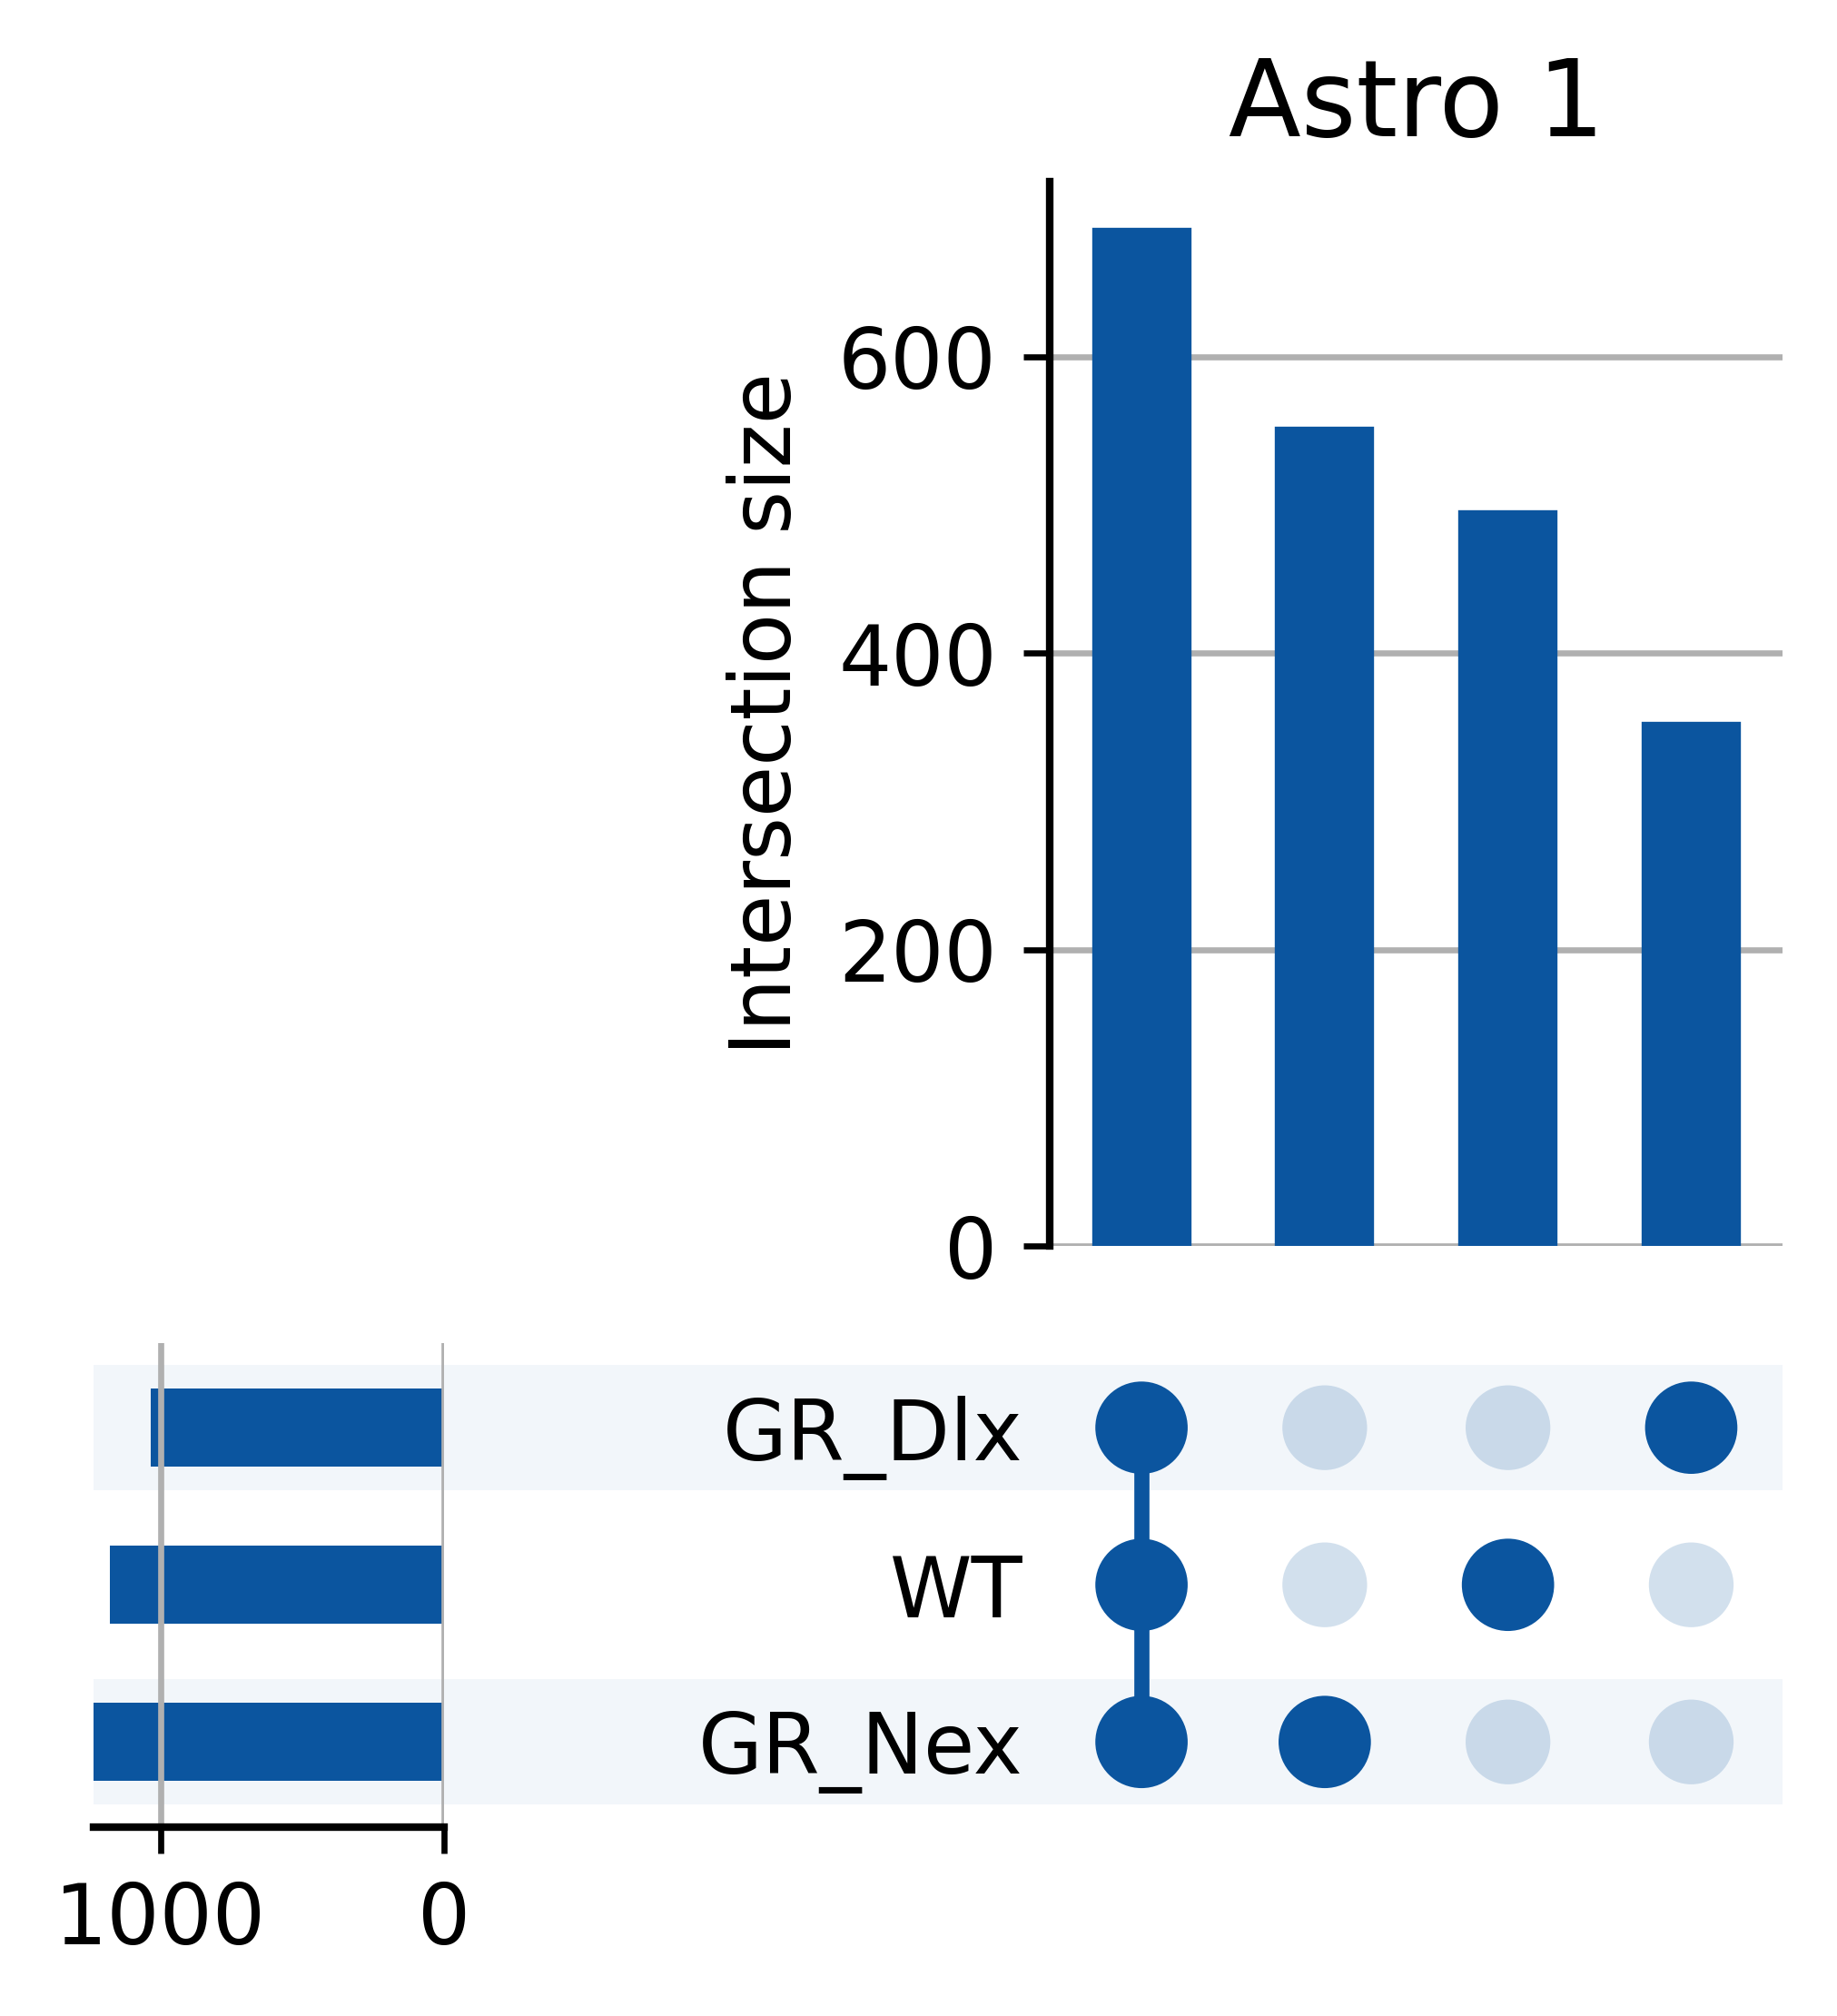

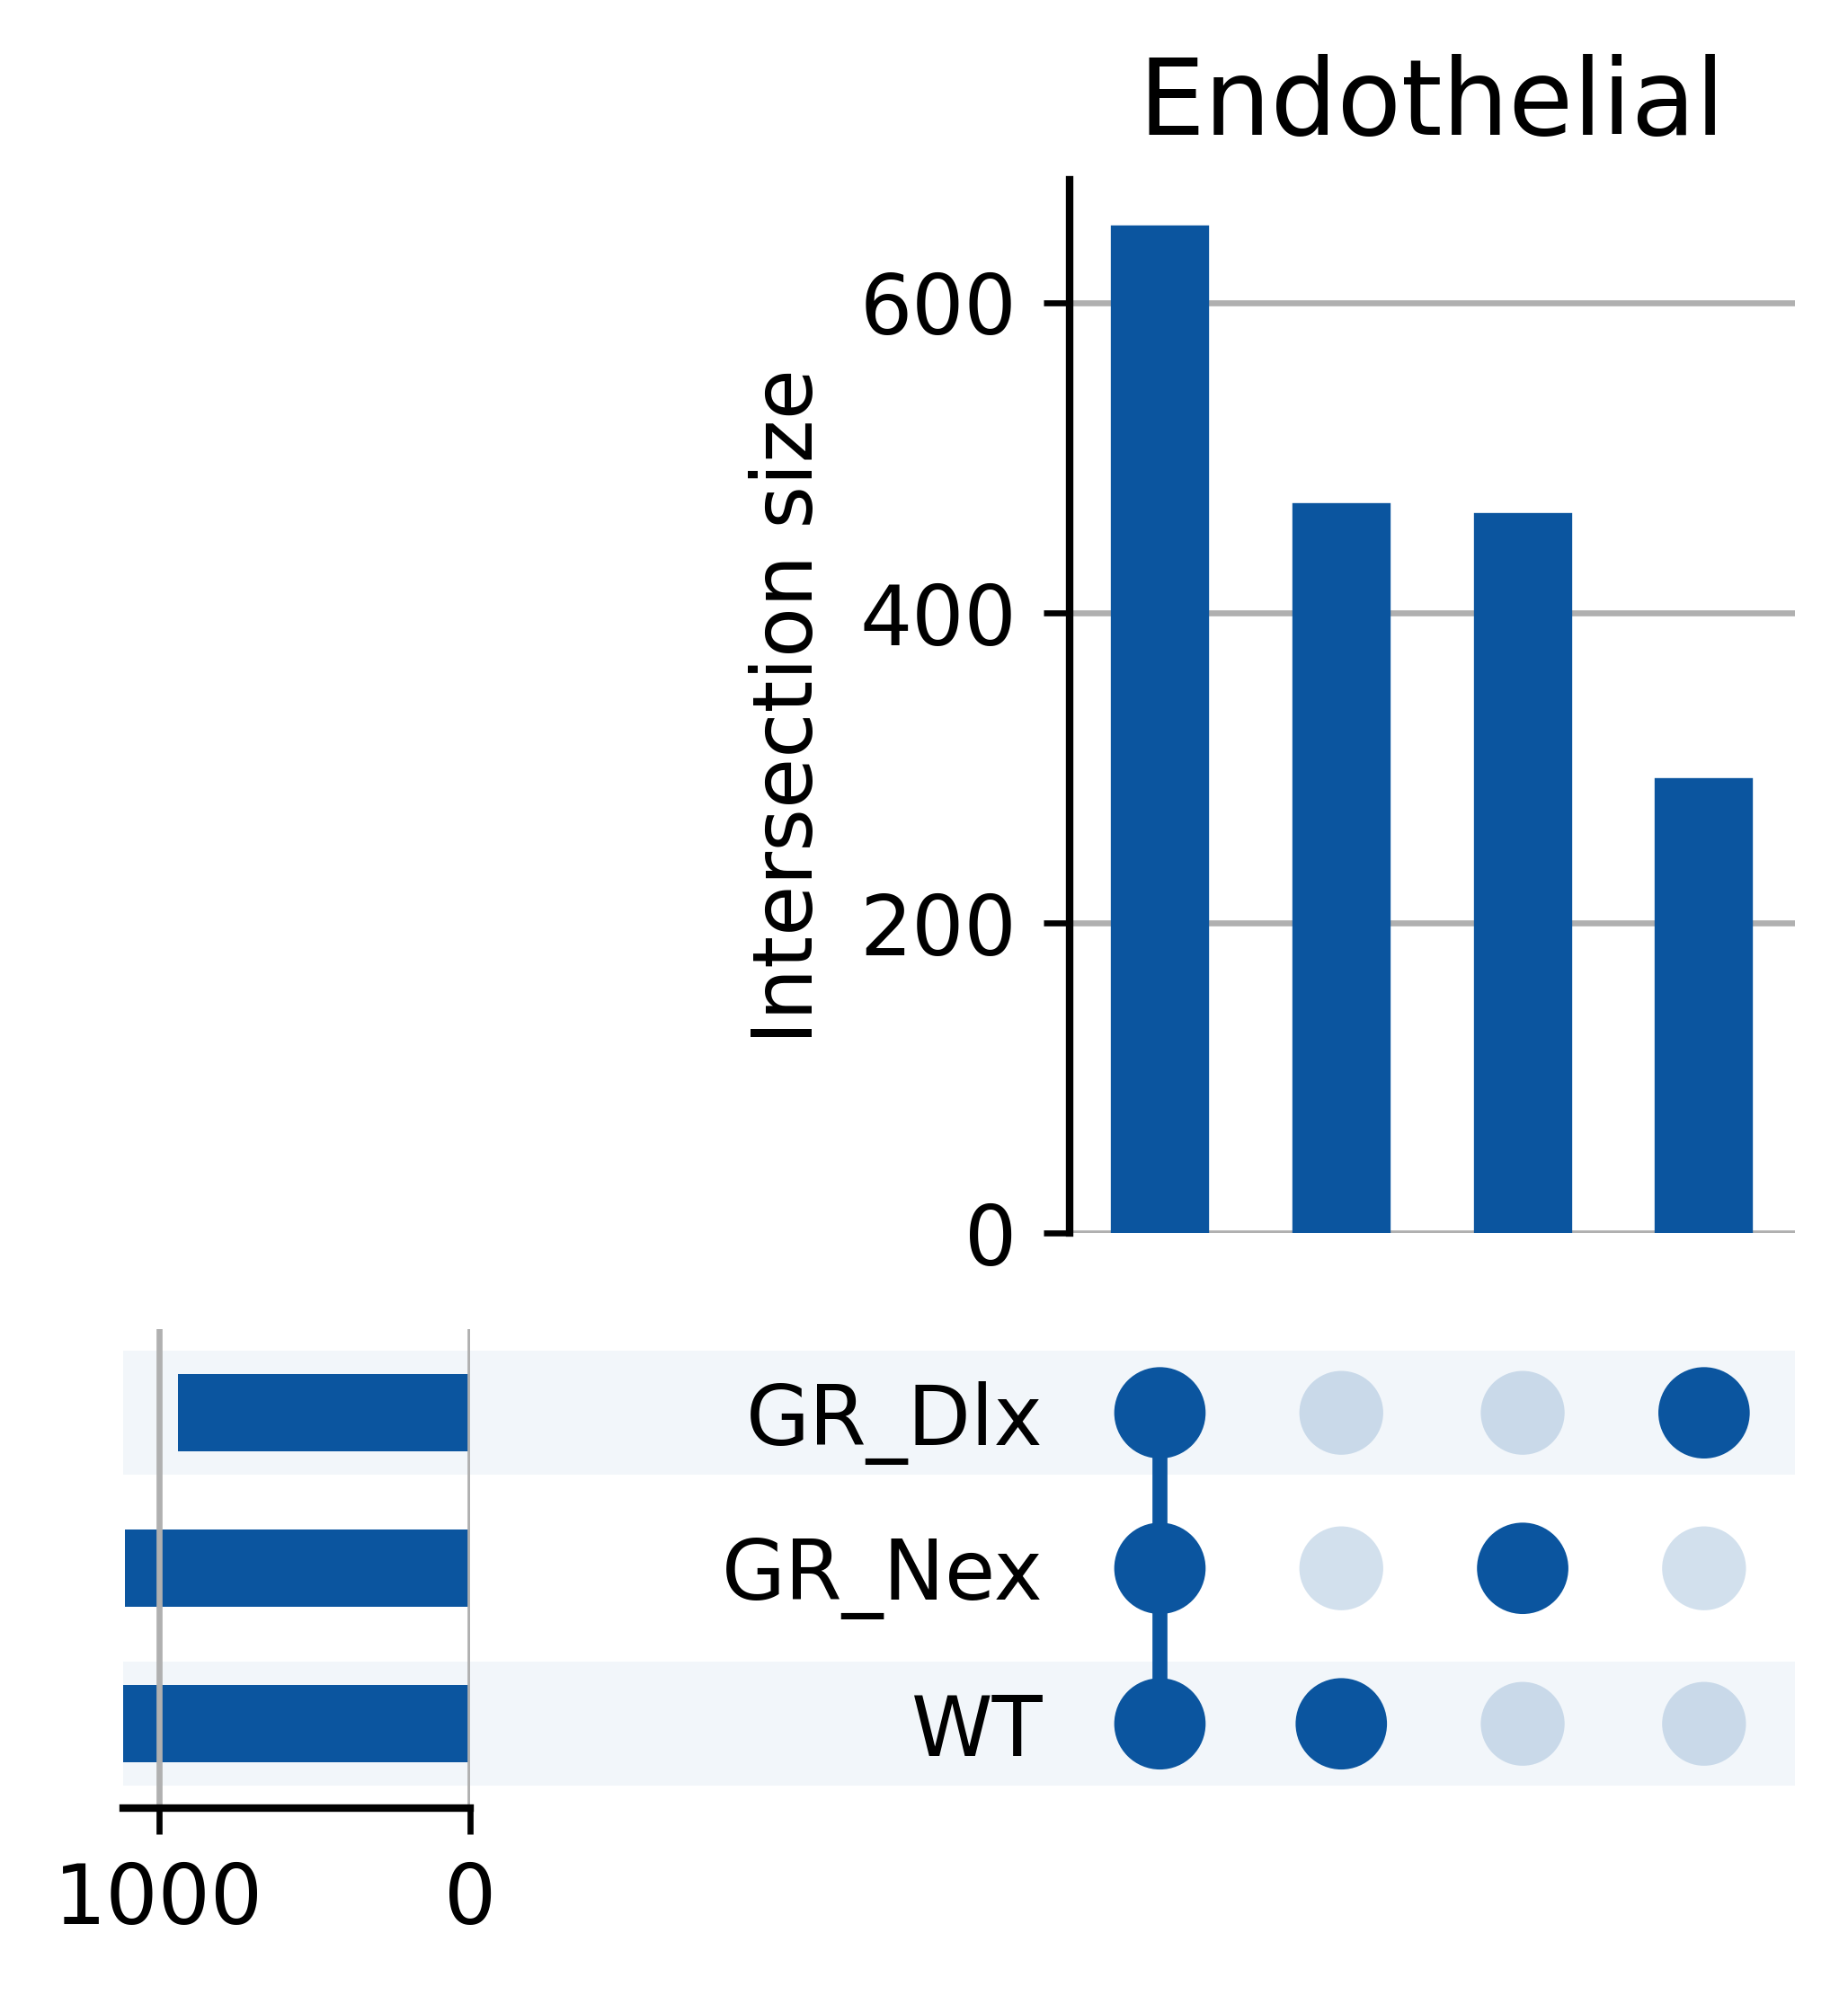

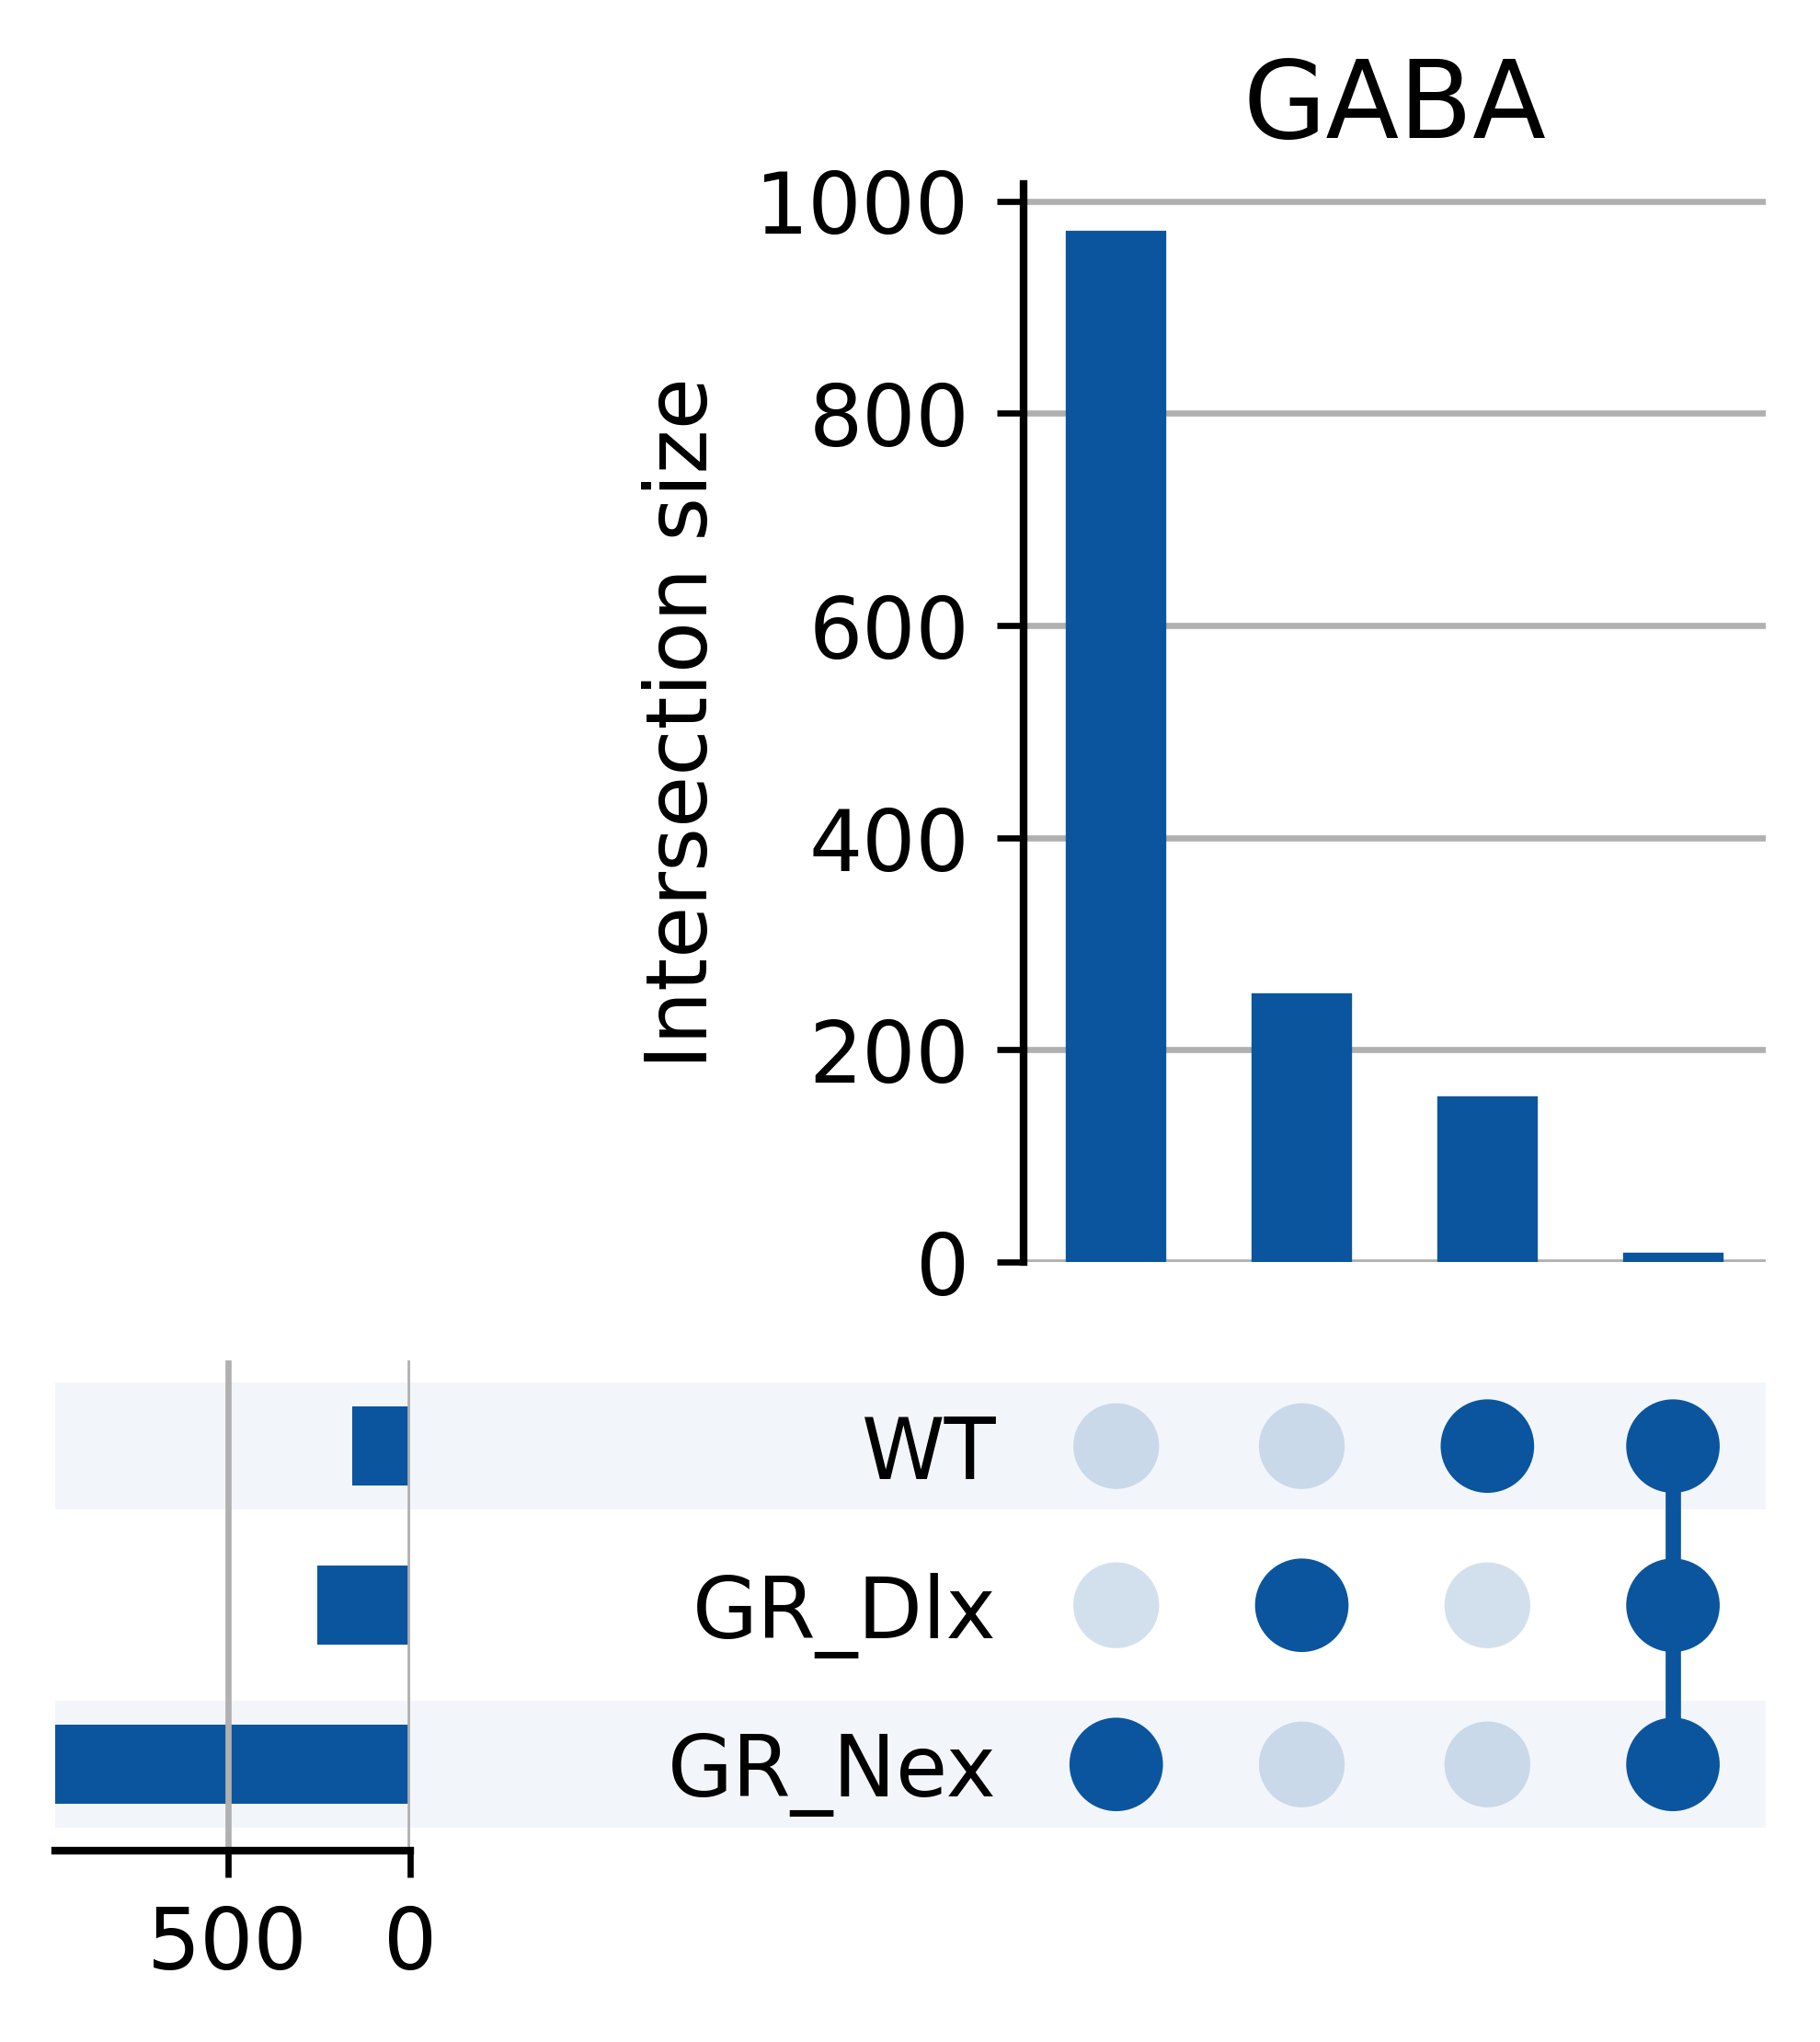

In [17]:
import upsetplot
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['figure.dpi'] = 600
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']
gene_sets = {}
tmp_df = de_genes_sign_mean[de_genes_sign_mean['test'].isin(['WT', 'GR_Nex', 'GR_Dlx'])]
min_sizes = [180, 120, 150, 150]
writer = pd.ExcelWriter('GR_upset.xlsx', engine = 'openpyxl')
for i, clust in enumerate(['CA1 Glut 2', 'CA3 Glut 2', 'DG Glut 2', 'Oligodendrocytes', "Astro 1", 'Endothelial', 'GABA']):
    print(clust)
    loop_df = tmp_df[tmp_df['clust']==clust]
    for test in loop_df.test.unique():
        gene_sets[test] = set(loop_df[loop_df.test==test].gene.tolist())
    upset_data_sub = upsetplot.from_contents(gene_sets)
    indices = [(True, False, False),
           (False, True, False),
           (False, False, True), 
           (True, True, True), 
          ]
    df_list = []
    for idx in indices:
        df_list.append(upset_data_sub.loc[idx])
    upset_data_sub = pd.concat(df_list)
    upset_data_sub.reset_index().to_excel(writer, sheet_name=clust)
    axs = upsetplot.plot(upset_data_sub, sort_by='cardinality', facecolor='#0b559f')#, min_subset_size=min_sizes[i])
    axs['intersections'].set_title(clust)
writer.close()
    #plt.savefig(base_dir + 'figures/upset_' + clust + '_up.png', dpi=600)

CA1 Glut 2


<ipython-input-18-1e8286647ff9>:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_list.append(upset_data_sub.loc[idx])


CA3 Glut 2
DG Glut 2
Oligodendrocytes
Astro 1
Endothelial
GABA


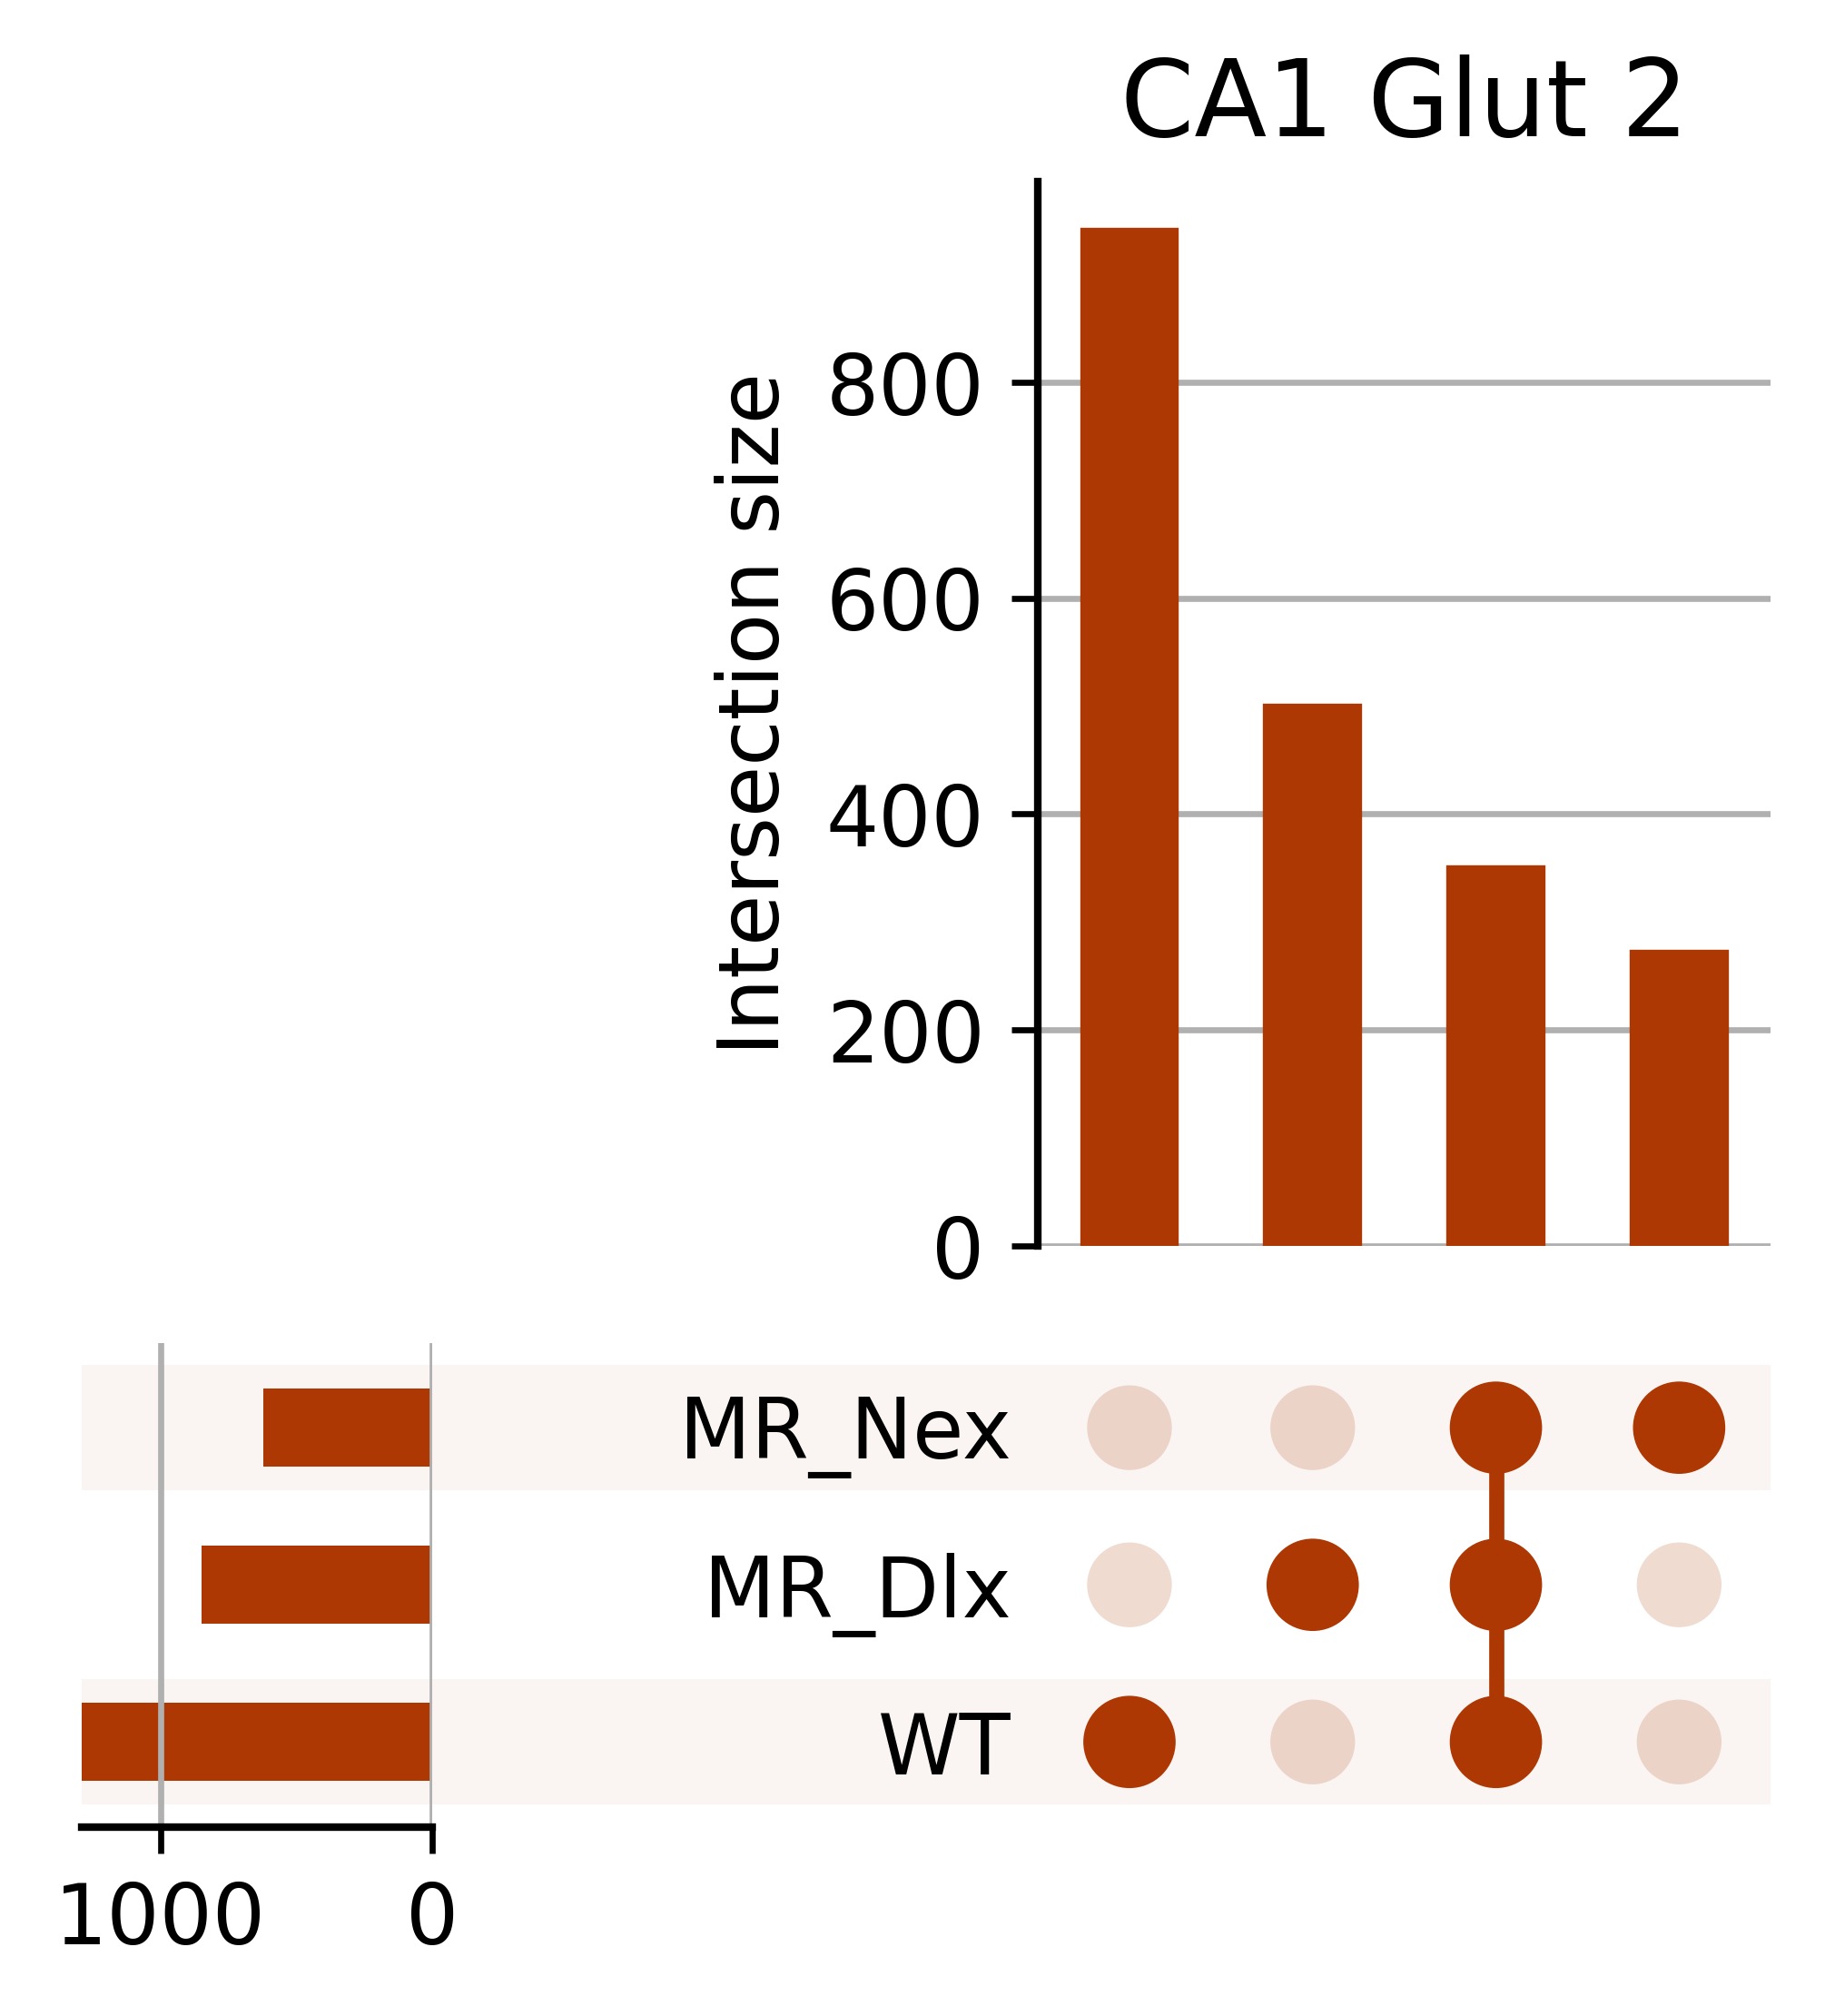

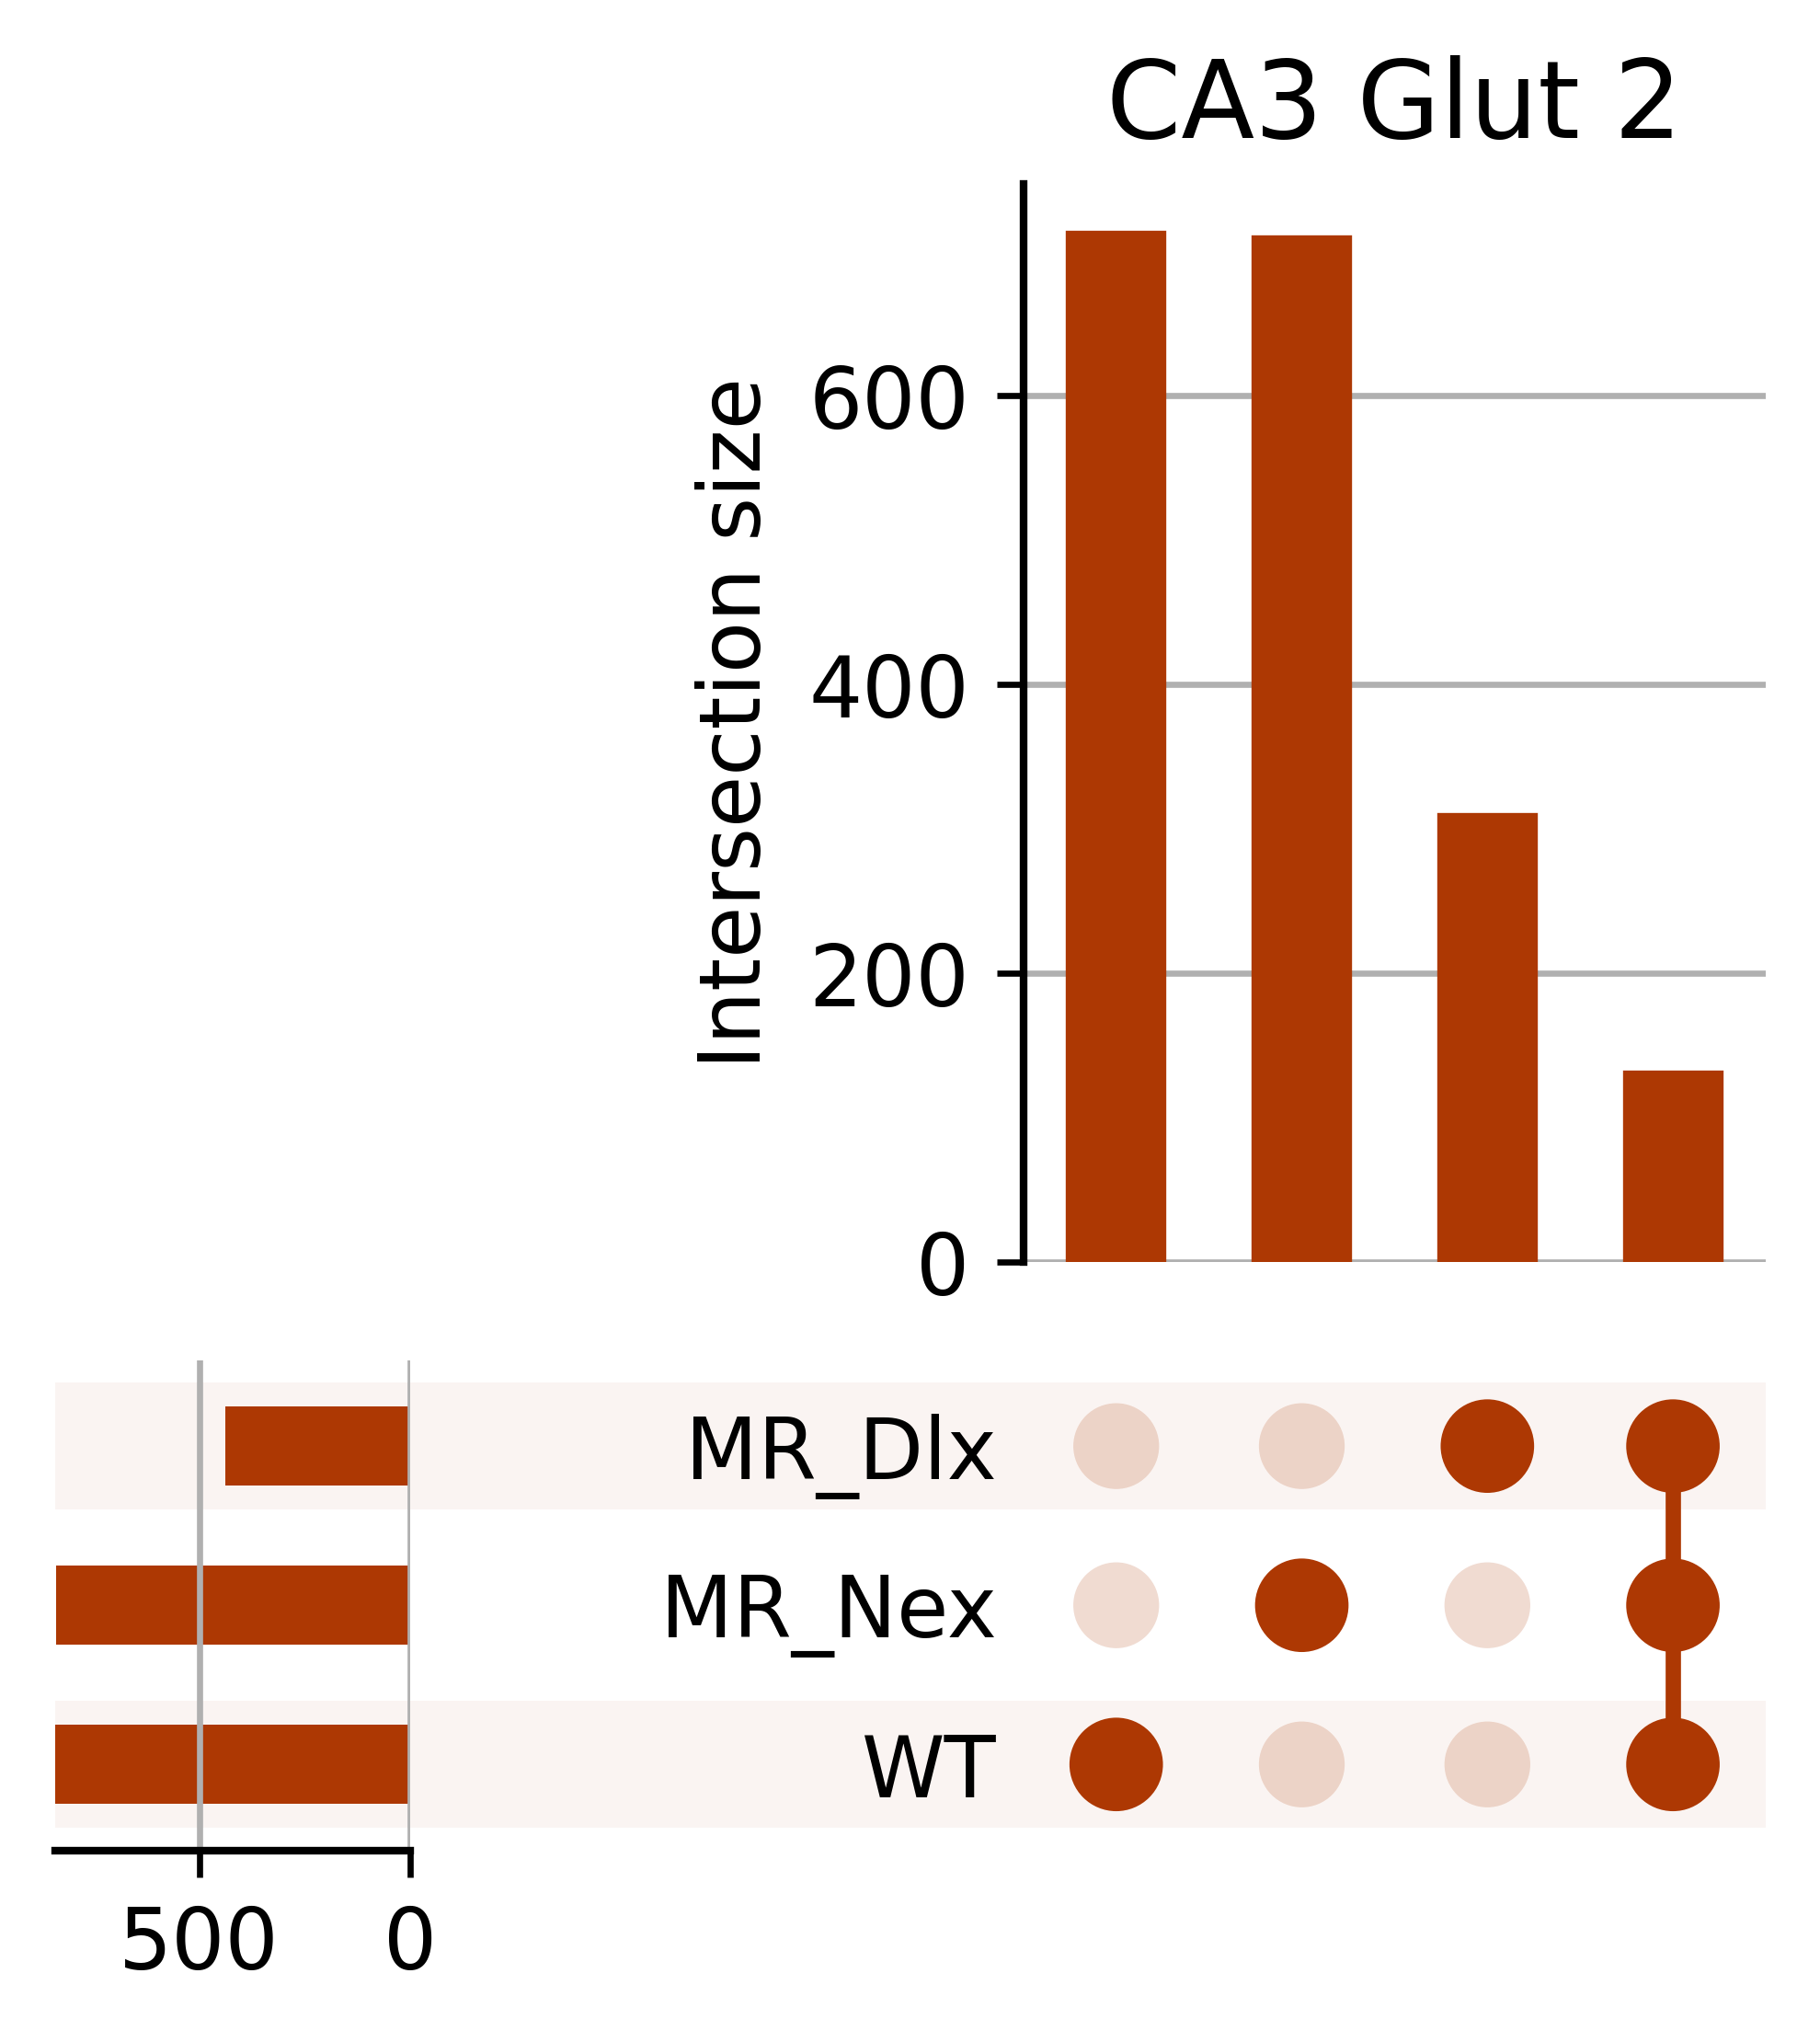

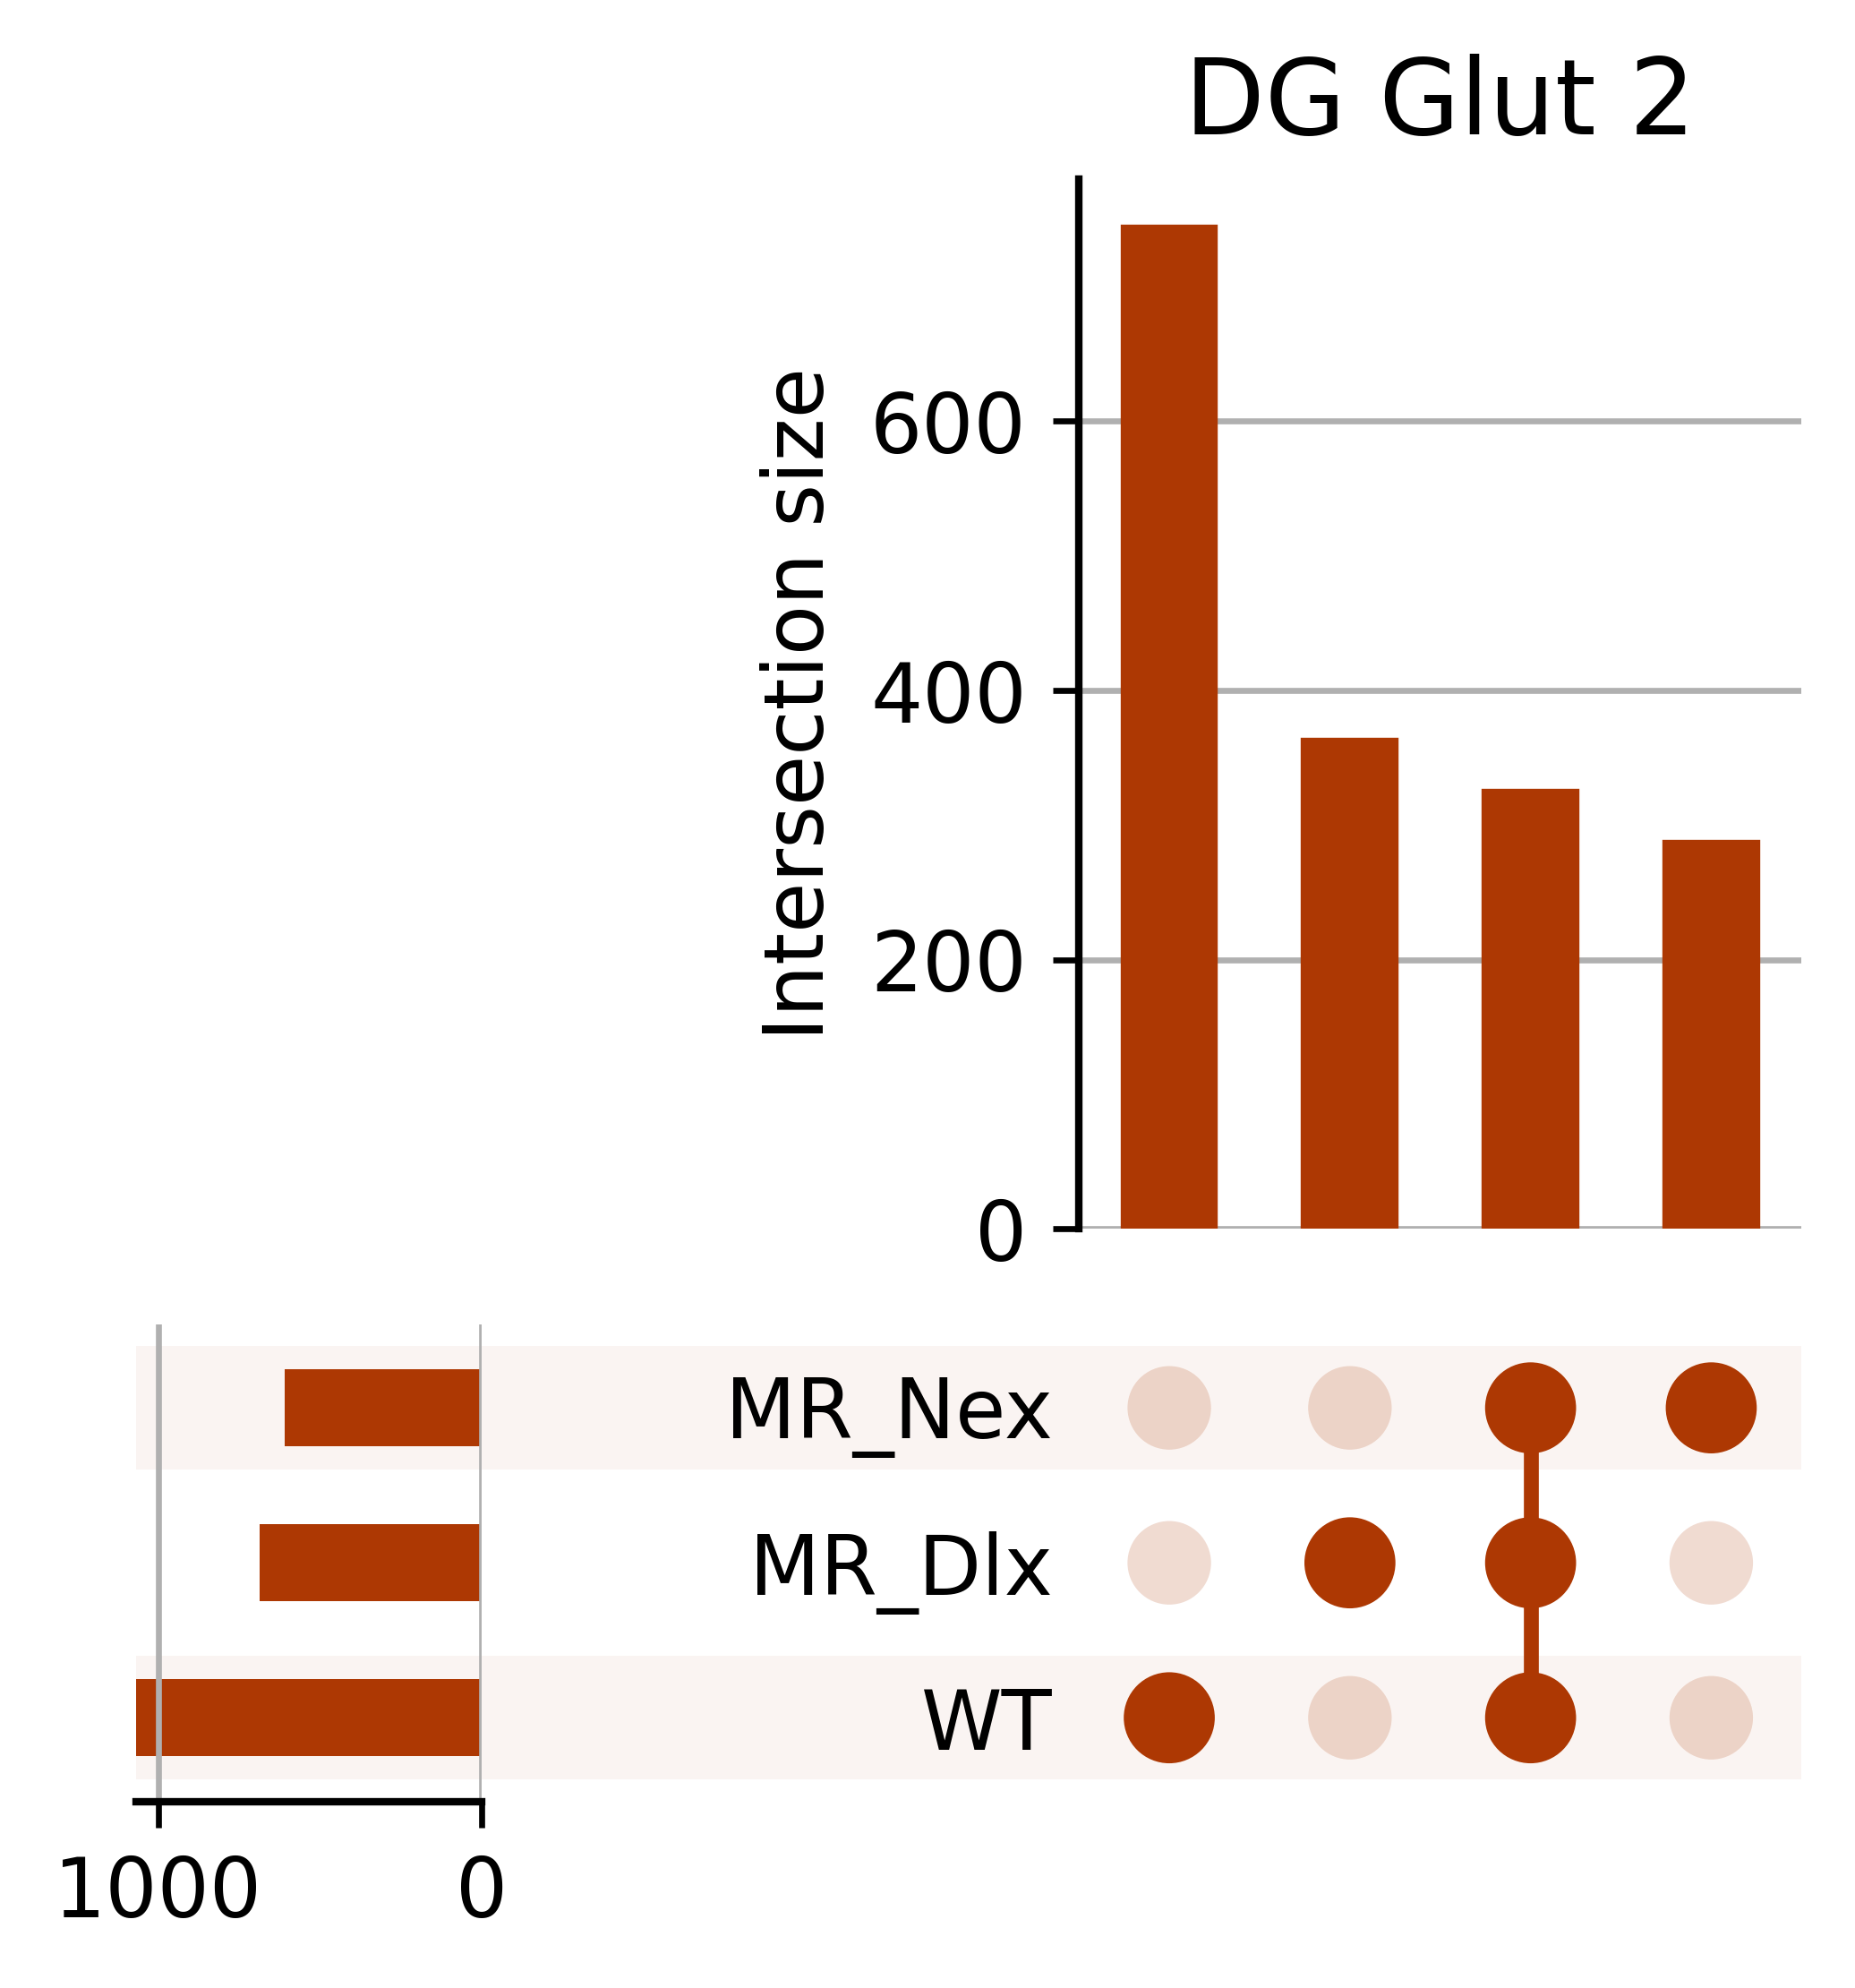

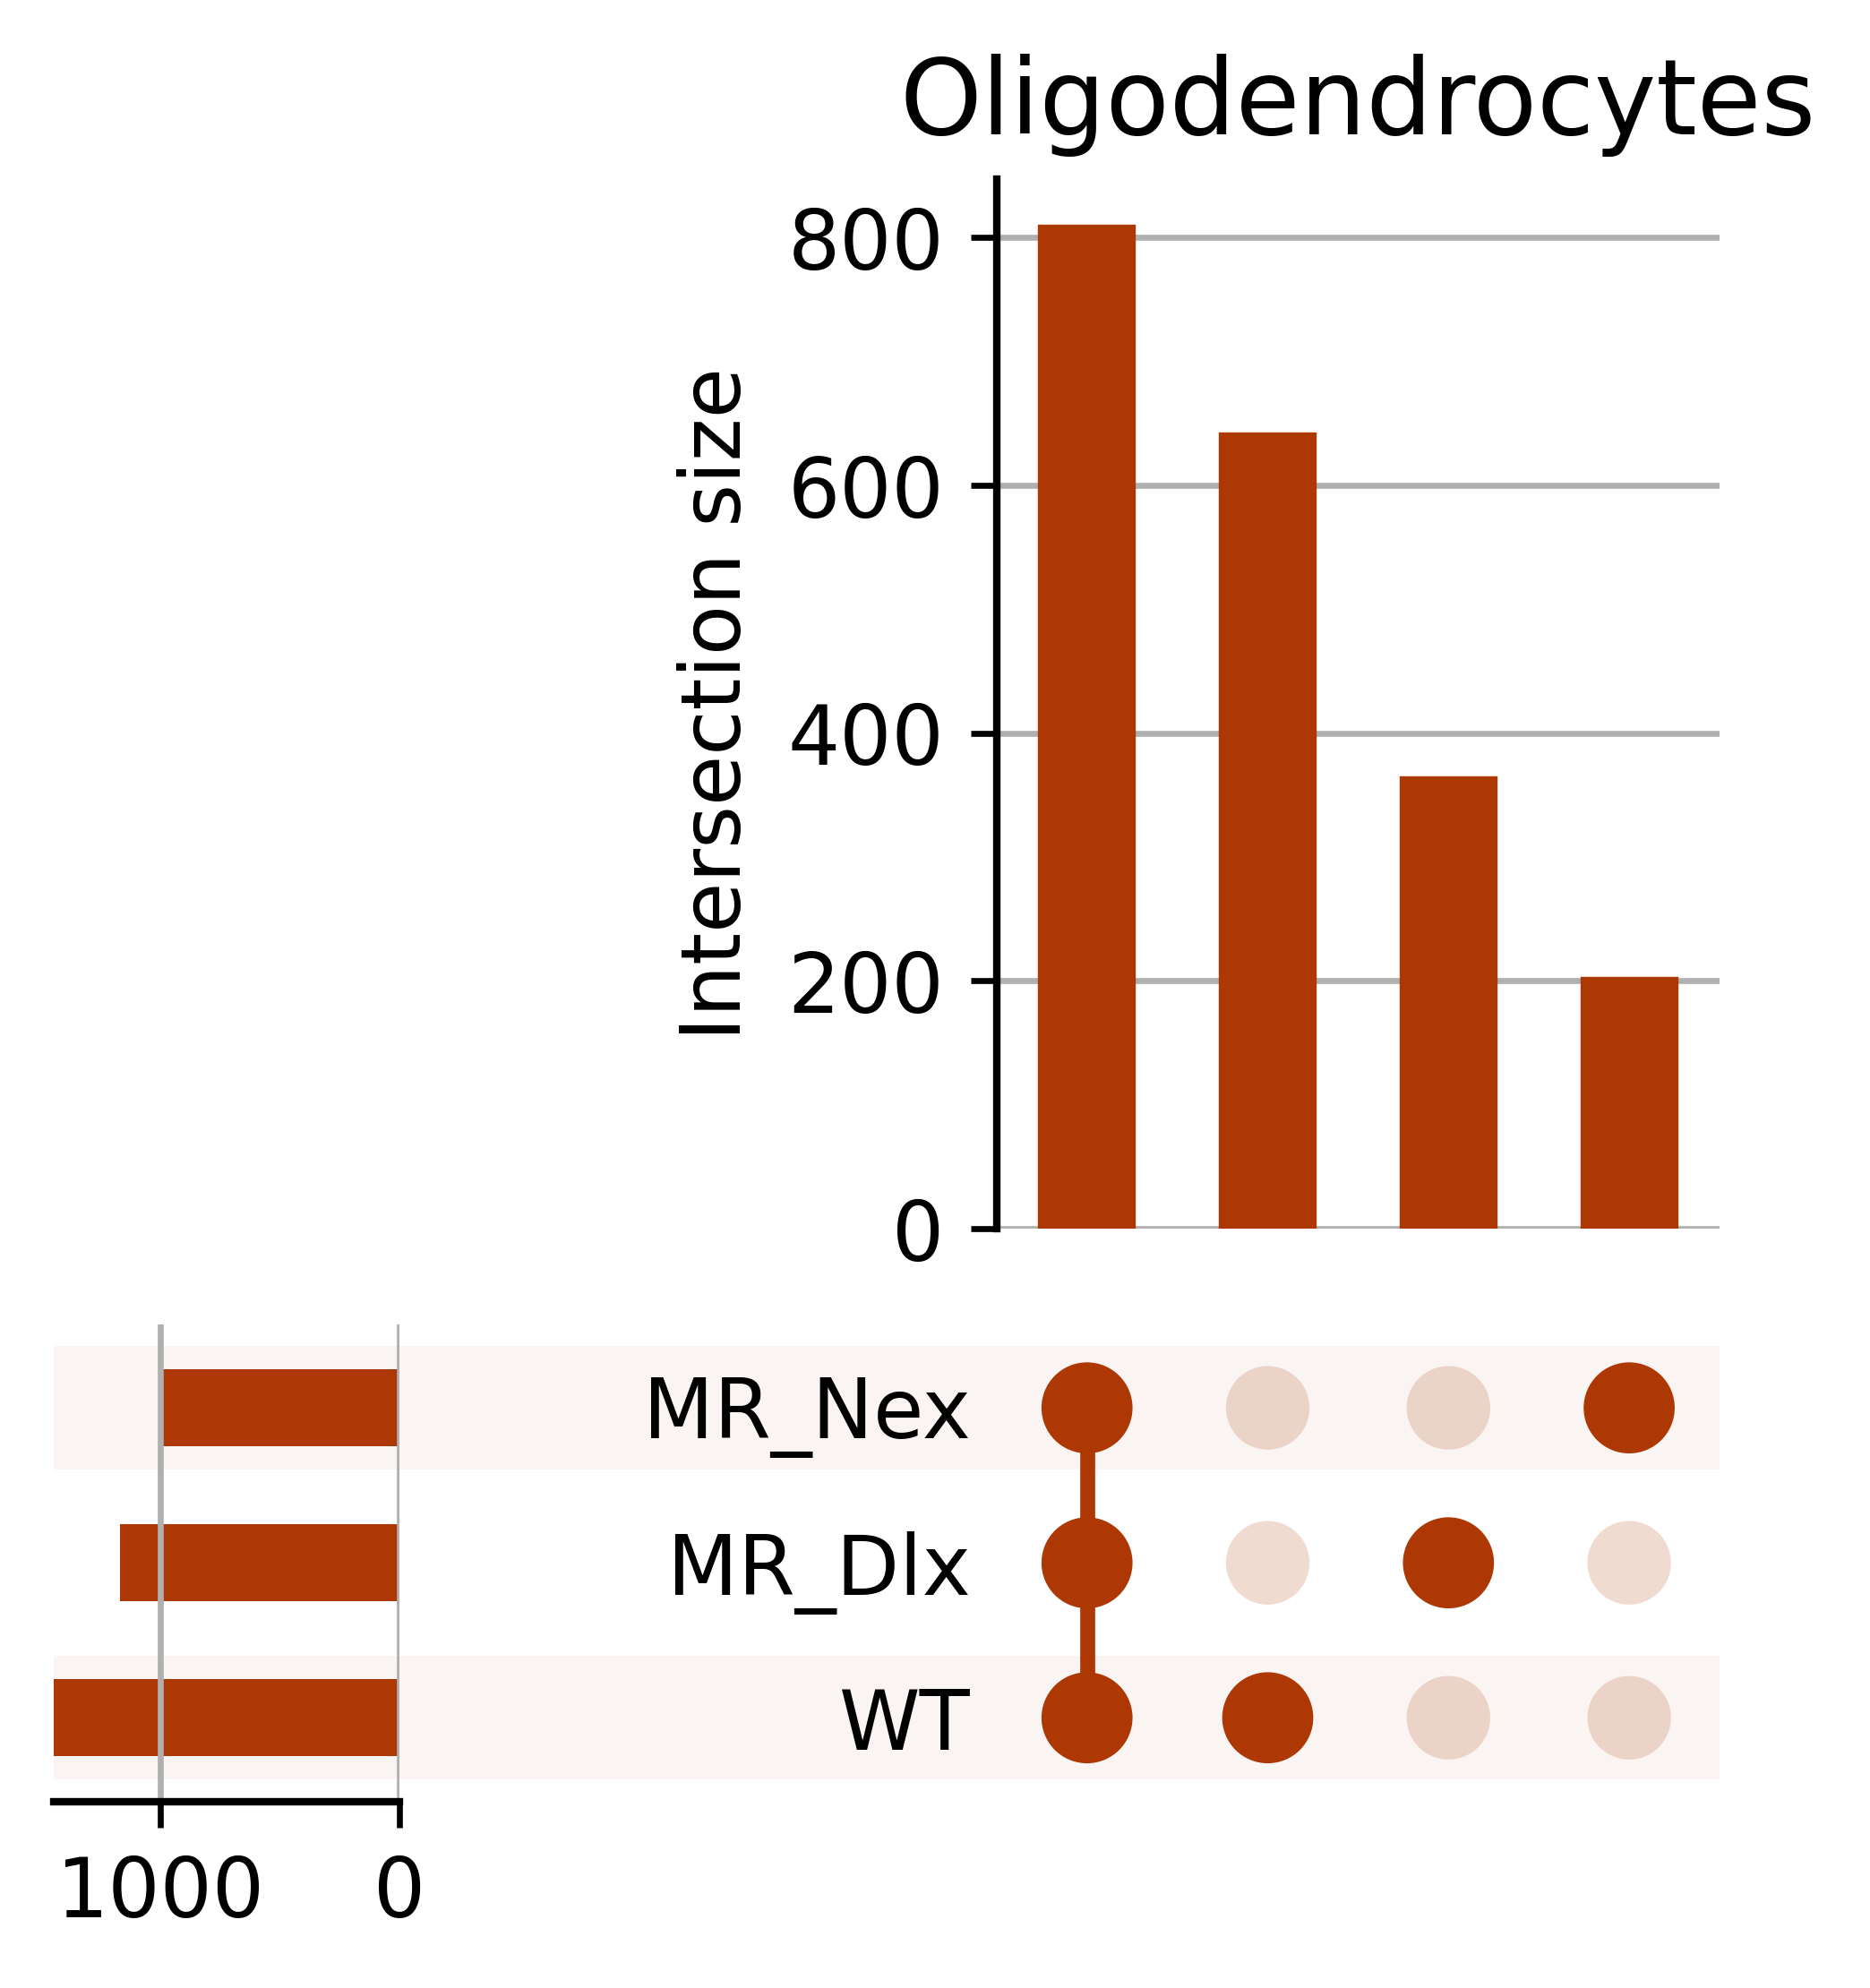

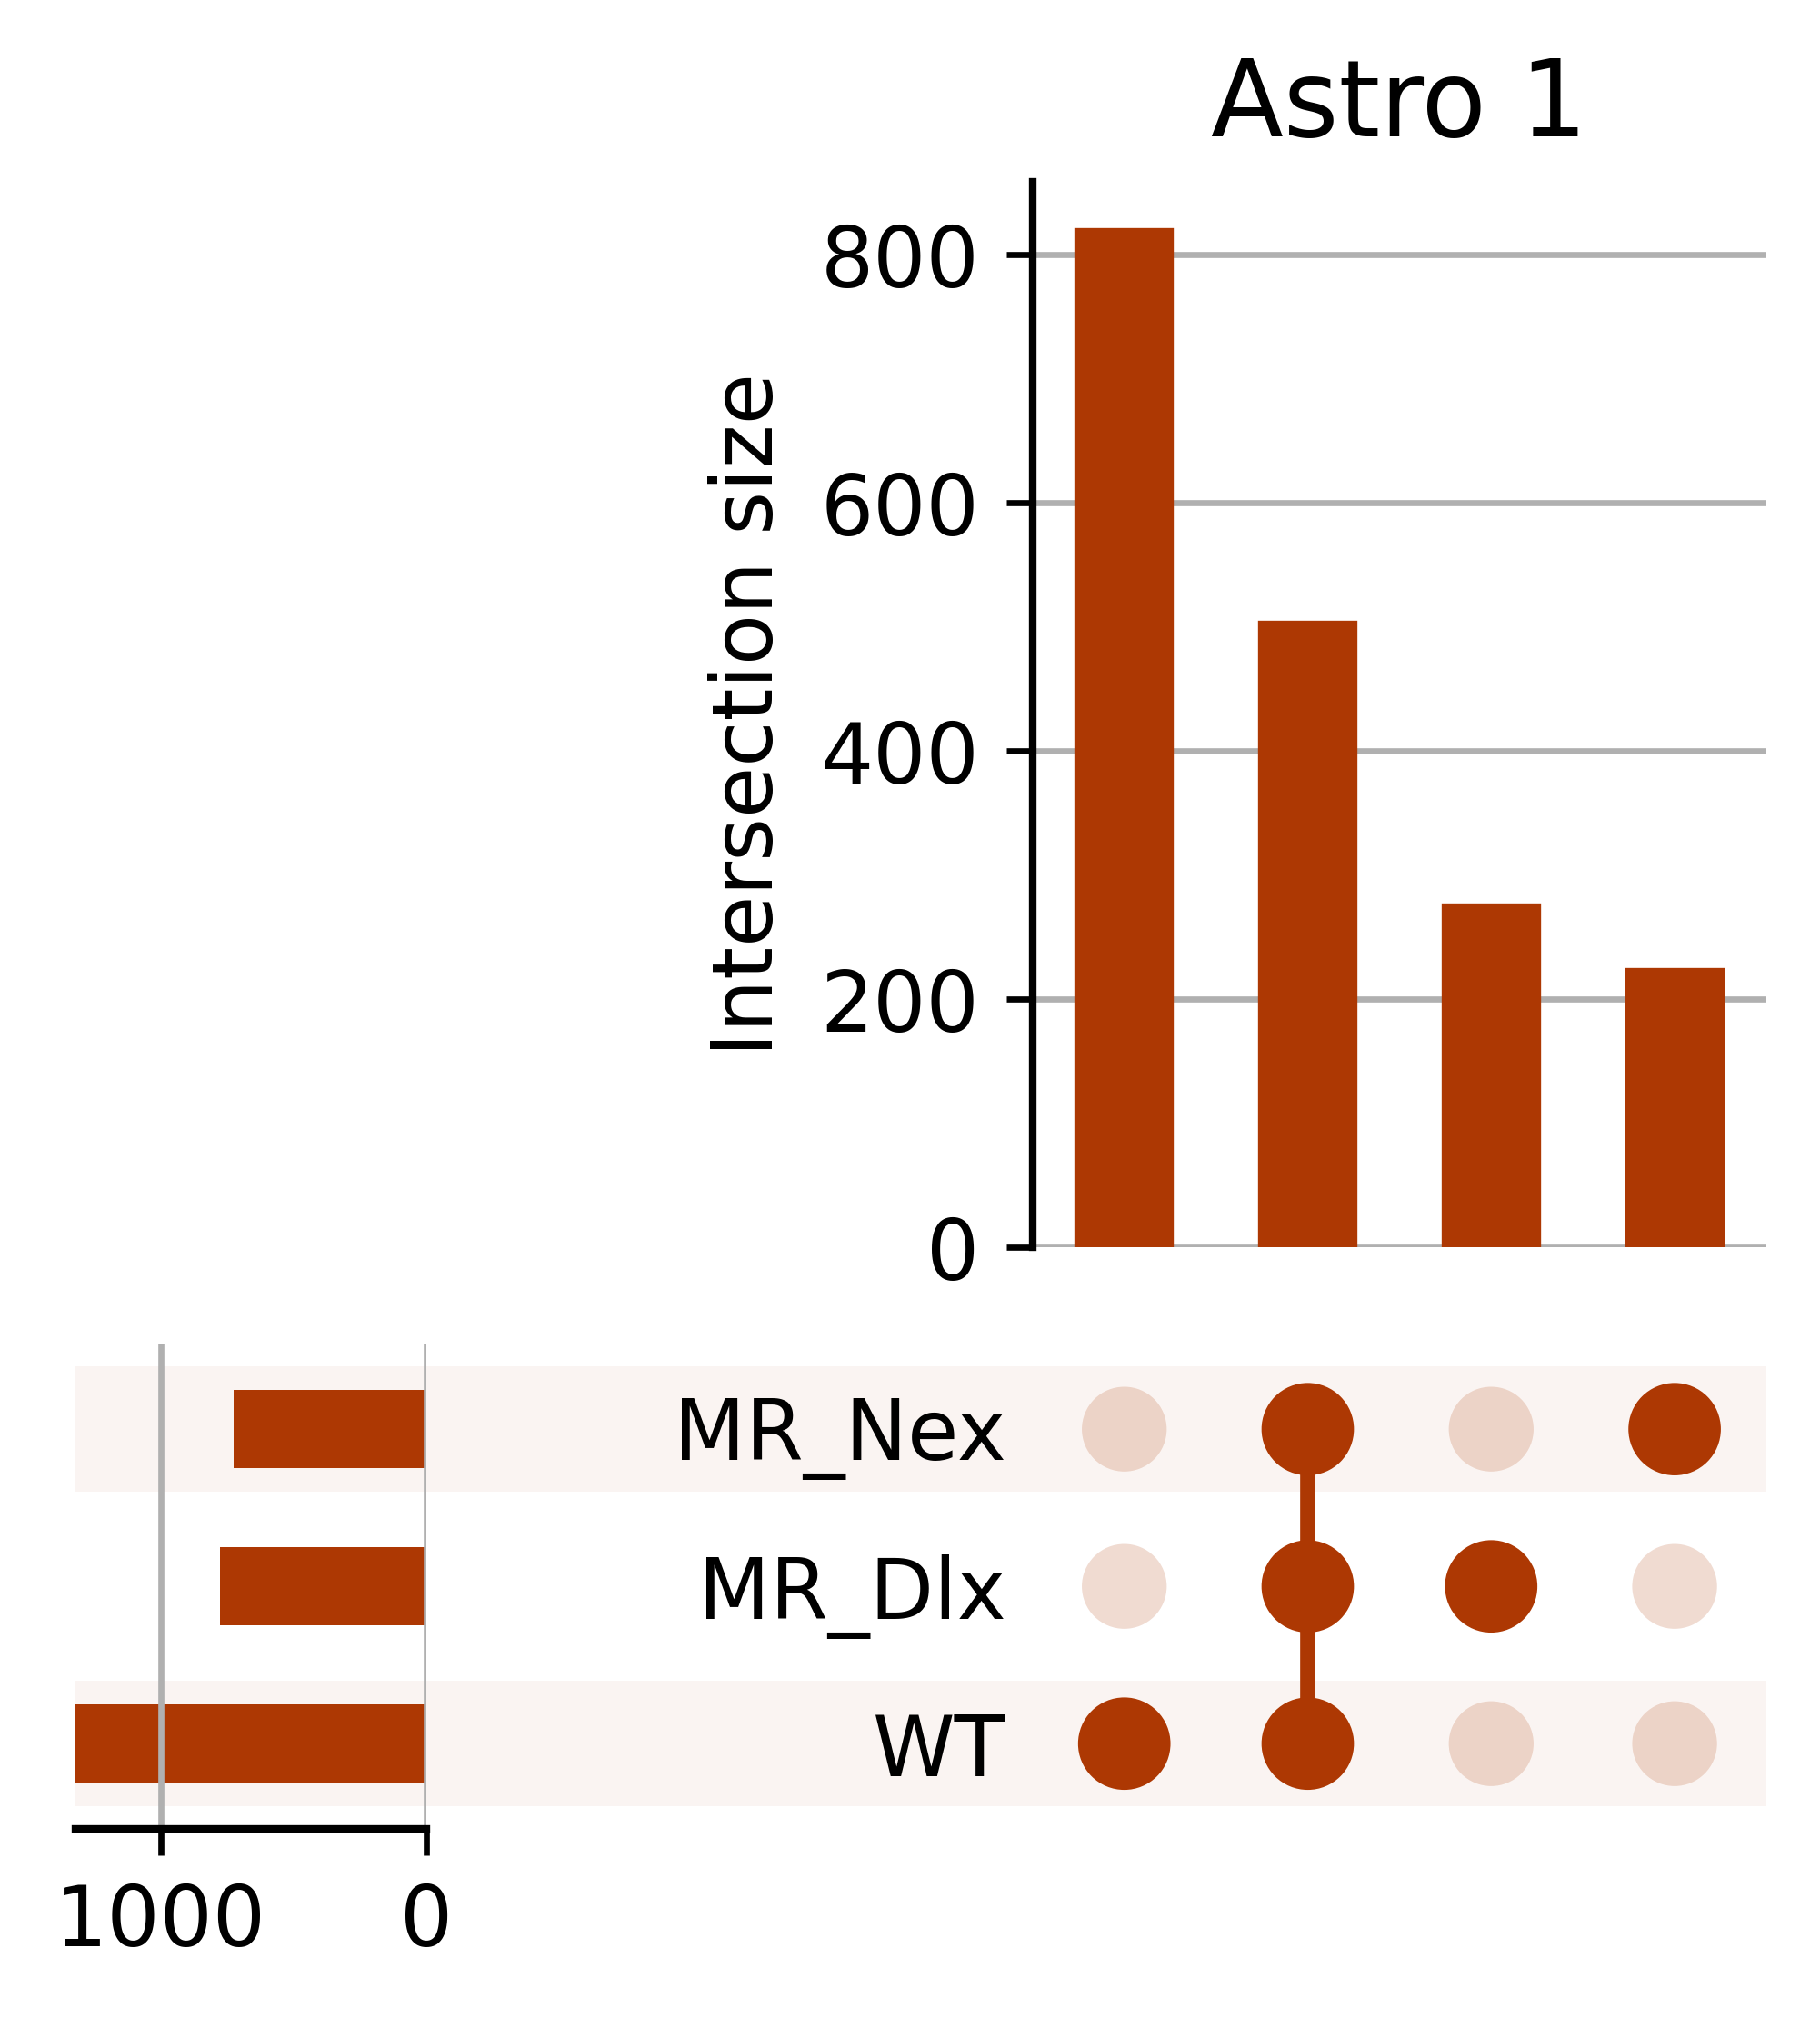

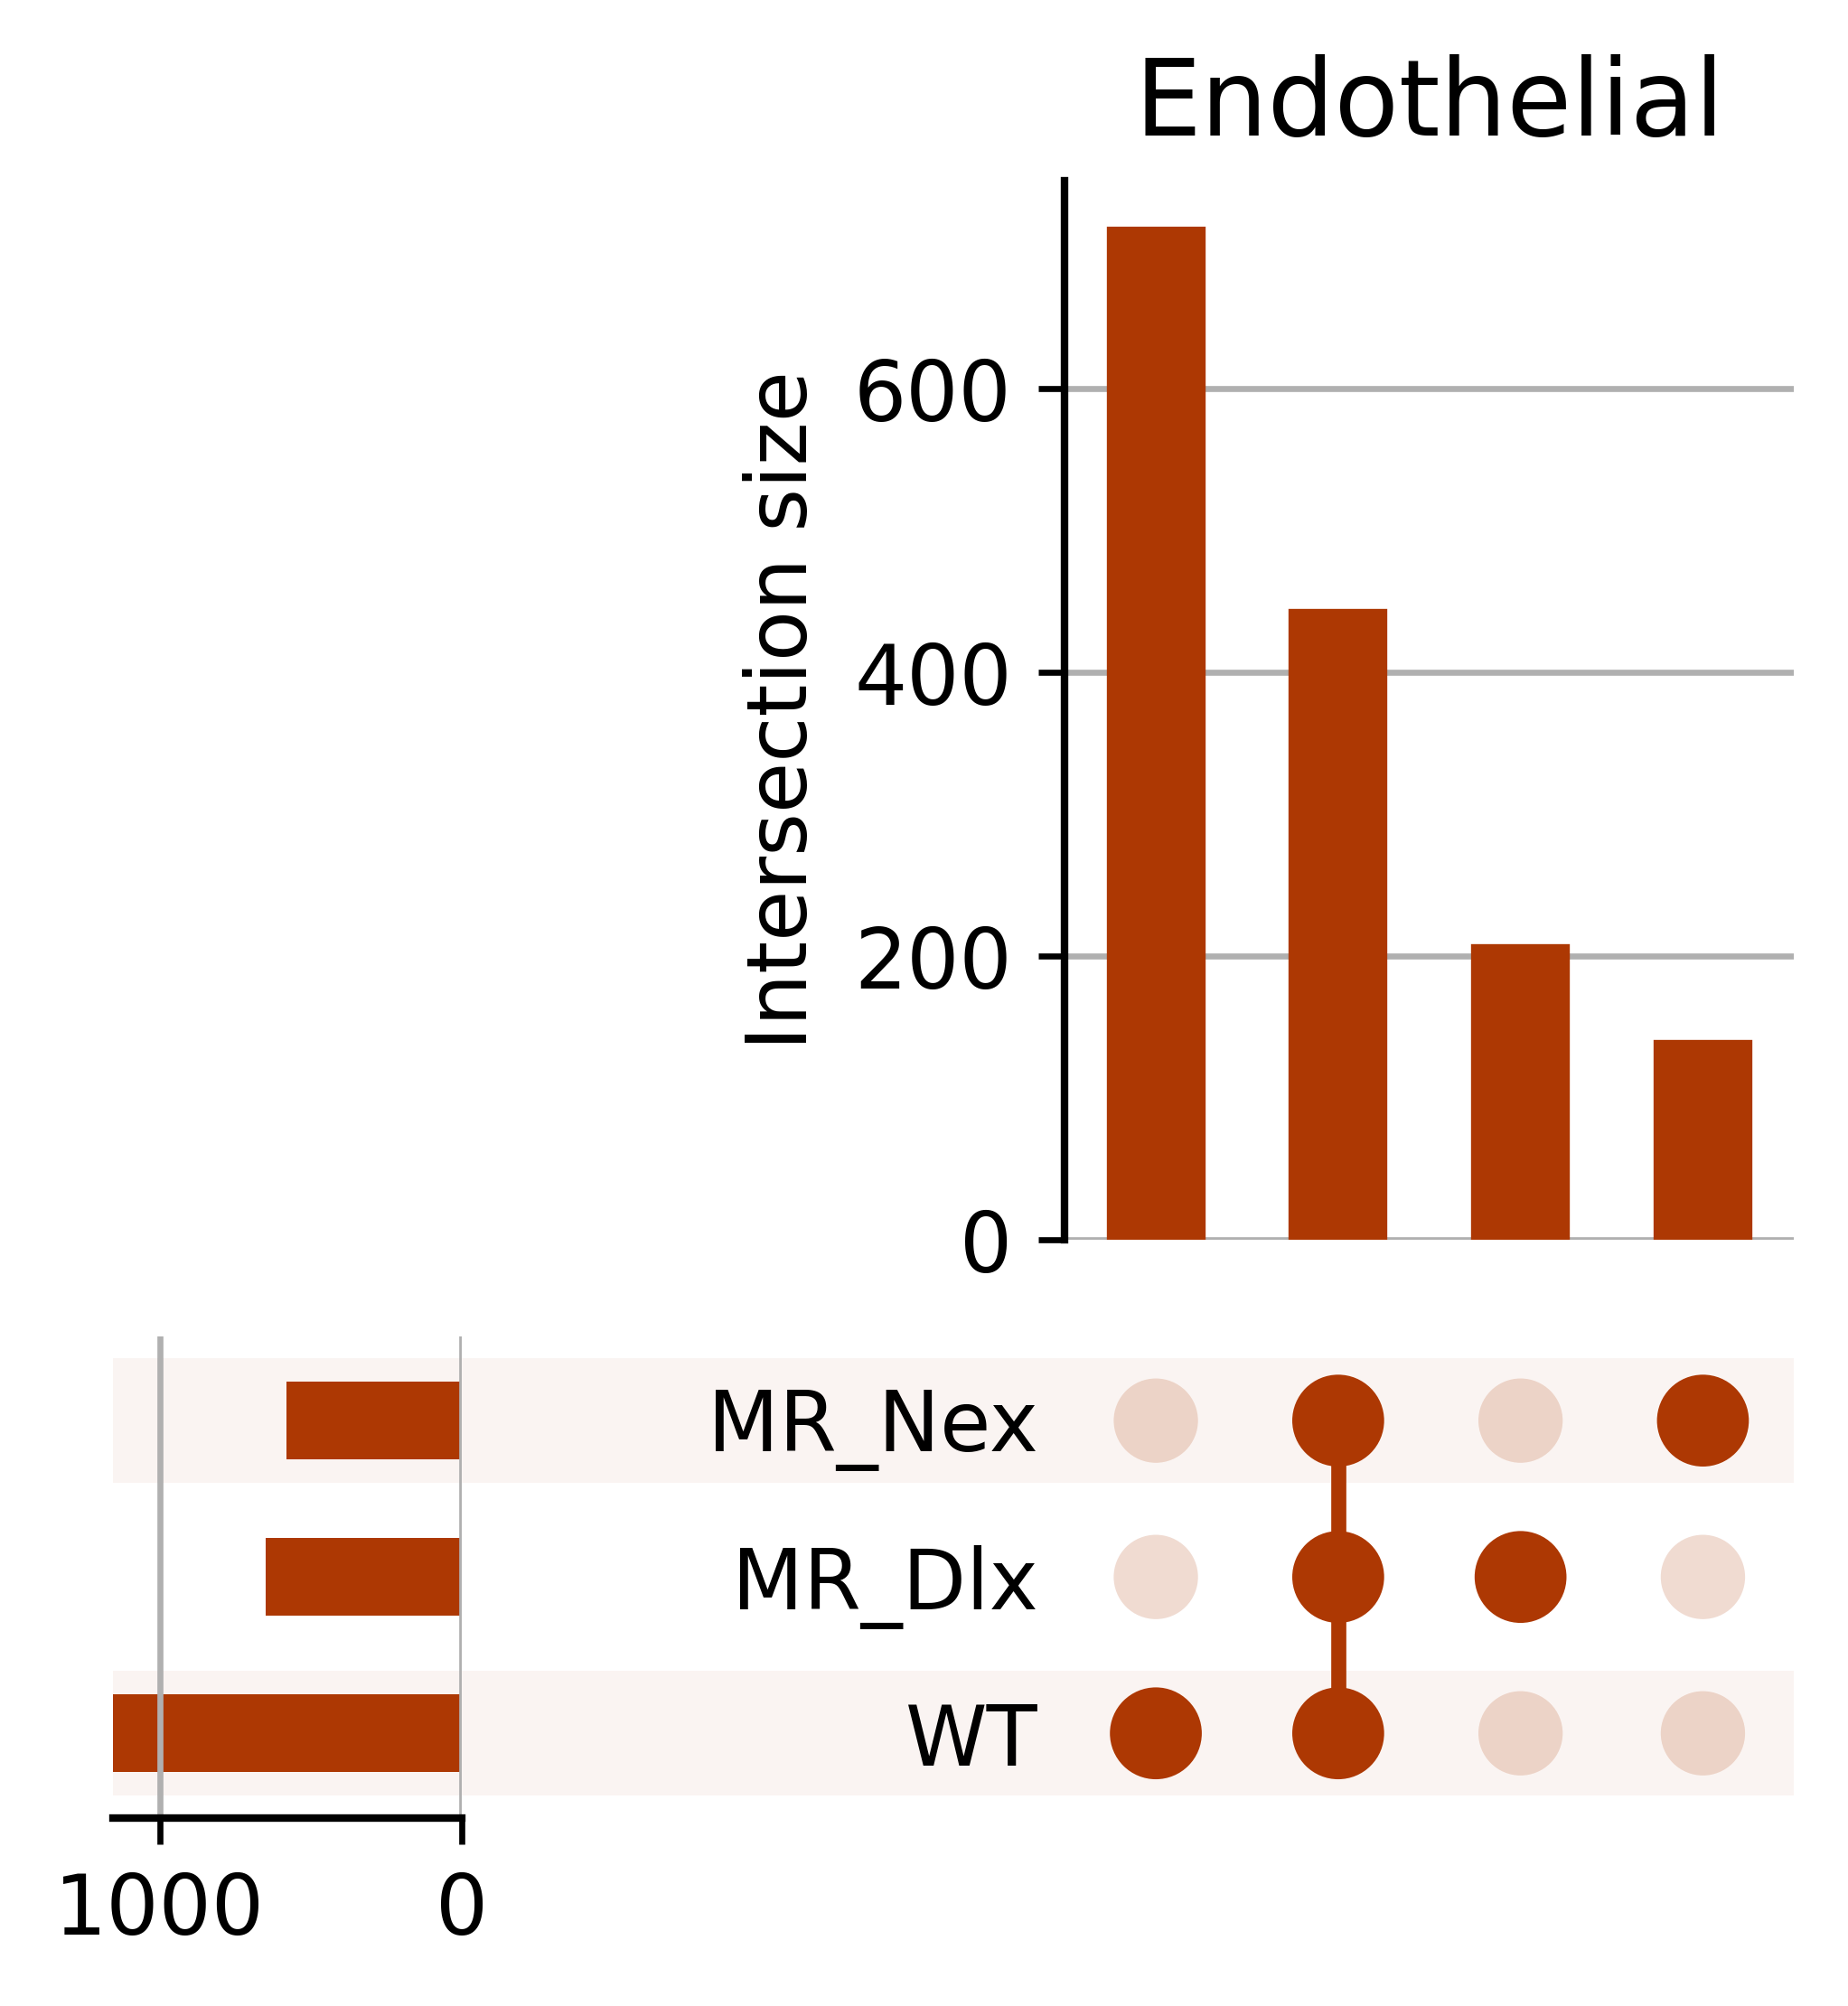

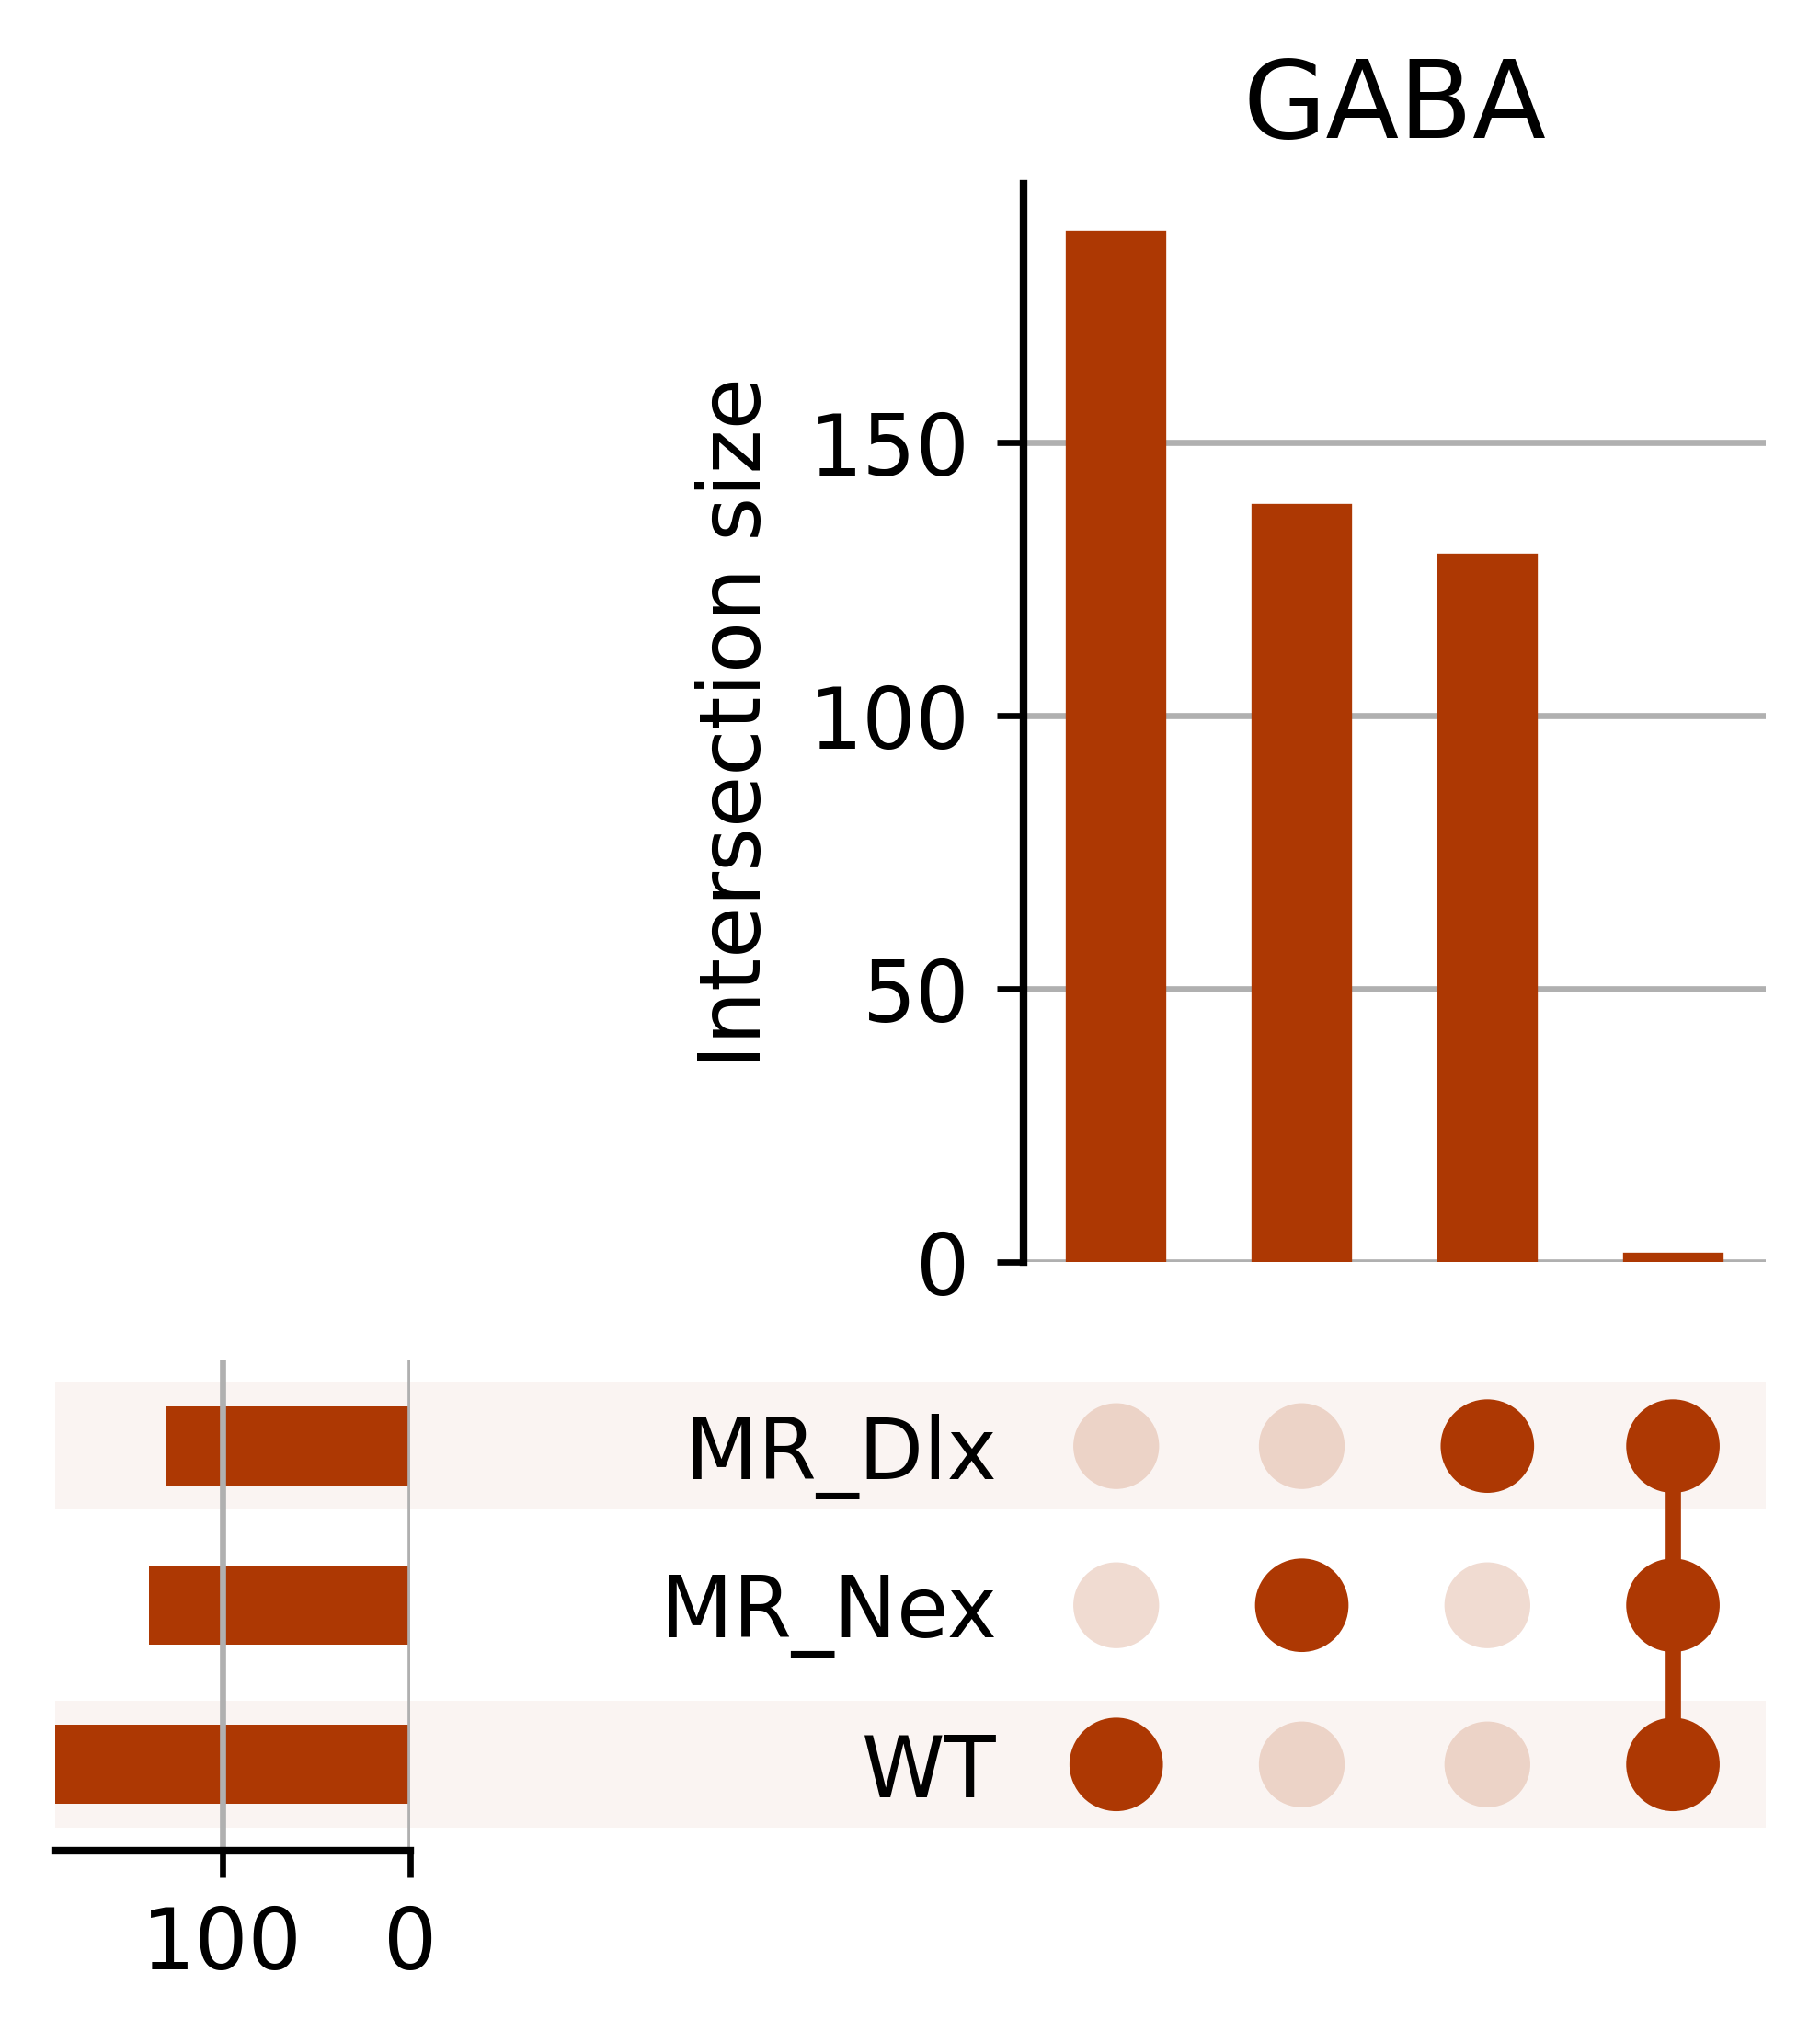

In [18]:
import upsetplot
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['figure.dpi'] = 600
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']
gene_sets = {}
tmp_df = de_genes_sign_mean[de_genes_sign_mean['test'].isin(['WT', 'MR_Nex', 'MR_Dlx'])]
min_sizes = [180, 120, 150, 150]
writer = pd.ExcelWriter('MR_upset.xlsx', engine = 'openpyxl')
for i, clust in enumerate(['CA1 Glut 2', 'CA3 Glut 2', 'DG Glut 2', 'Oligodendrocytes', "Astro 1", 'Endothelial', 'GABA']):
    print(clust)
    loop_df = tmp_df[tmp_df['clust']==clust]
    for test in loop_df.test.unique():
        gene_sets[test] = set(loop_df[loop_df.test==test].gene.tolist())
    upset_data_sub = upsetplot.from_contents(gene_sets)
    indices = [(True, False, False),
           (False, True, False),
           (False, False, True), 
           (True, True, True), 
          ]
    df_list = []
    for idx in indices:
        df_list.append(upset_data_sub.loc[idx])
    upset_data_sub = pd.concat(df_list)
    upset_data_sub.reset_index().to_excel(writer, sheet_name=clust)
    axs = upsetplot.plot(upset_data_sub, sort_by='cardinality', facecolor='#ad3803')#, min_subset_size=min_sizes[i])
    axs['intersections'].set_title(clust)
writer.close()
    #plt.savefig(base_dir + 'figures/upset_' + clust + '_up.png', dpi=600)

In [8]:
upset_data_sub

id
WT    MR_Dlx MR_Nex         
True  False  False    Vstm2a
             False   Slitrk4
             False    Pcyox1
             False      Klf6
             False     Dop1b
...                      ...
False False  True       Ilf2
             True    Dennd4a
             True     Zfp938
             True    Serinc5
True  True   True     Sdf2l1

[456 rows x 1 columns]